# 1 - Data Preparation

## 1.1. - Loading baywheel 2018 data

In [160]:
# import all the necessary libraries
import pandas as pd;pd.set_option('display.max_columns', 1000); pd.set_option('display.max_rows', 1000) ; pd.set_option('display.width', 1000)
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette("tab10")
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [161]:
# read the 2018 baywheels data
baywheels_df = pd.read_csv('baywheels_2018', low_memory=False, index_col=0)

## 1.2. - Exploring the data

In order to prepare our raw data for model creation, we must first understand the data.
There are some built-in methods that can provide us with quick insights into some of the issues we must address as well as provide us with a rudimentary overview of the data:
- The shape method allows us to quickly ascertain the dimensions of the data set;
- The head method provides a concise preview of the dataset's initial records;
- The info method provides us with a summary of the df information such as data types and memory usage;
- The describe method provides us with some descriptive statistics for the dataframe's variables;

In [162]:
# number of rows and columns
baywheels_df.shape

(1863731, 9)

In [163]:
# quick review and insights by checking the first 5 rows of the df
baywheels_df.head()

start_time                        end_time start_station_id start_station_lat start_station_lon end_station_id end_station_lat  end_station_lon bike_id
0  Date: 26/04/18; Time: 18:04:41  Date: 26/04/18; Time: 18:10:07             11.0          37.79728       -122.398436            6.0        37.80477      -122.403234  2530.0
1  Date: 18/05/18; Time: 19:34:12  Date: 18/05/18; Time: 19:37:57             64.0        37.7767539      -122.3990176          321.0   37.7801457035  -122.4030708524  3643.0
2  Date: 14/07/18; Time: 14:57:05  Date: 14/07/18; Time: 15:10:37             70.0     37.7733108789   -122.4442926049          109.0      37.7633158     -122.4219039  1964.0
3  Date: 11/11/18; Time: 16:35:22  Date: 11/11/18; Time: 16:45:37            160.0        37.8053183      -122.2948365          220.0      37.8113514     -122.2734217  3580.0
4  Date: 15/12/18; Time: 10:15:24  Date: 15/12/18; Time: 10:20:23             72.0         37.772406      -122.4356498          119.0      37.7610471     -122.4326417  5247.0

In [164]:
# check the types of data we have in the dataframe
baywheels_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1863731 entries, 0 to 1863730
Data columns (total 9 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   start_time         object
 1   end_time           object
 2   start_station_id   object
 3   start_station_lat  object
 4   start_station_lon  object
 5   end_station_id     object
 6   end_station_lat    object
 7   end_station_lon    object
 8   bike_id            object
dtypes: object(9)
memory usage: 142.2+ MB


In [165]:
# summary statistics of the columns in the df
baywheels_df.describe()

start_time end_time start_station_id start_station_lat start_station_lon end_station_id end_station_lat end_station_lon  bike_id
count     1863731  1863731          1851960           1863731           1863731        1851960         1863731         1863731  1863731
unique    1738468  1742057              332               370               371            332             371             372     5055
top       Failure  Failure             15.0         37.795392       -122.394203           67.0      37.7766392    -122.3955263   3961.0
freq           10       10            38461             38461             38461          50000           50000           50000     1220

From this quick overview we can already see **some issues** that will need to be addressed:
- Datetypes need to be recoded to the **appropriate format**;
- The most frequent value in start_time and end_time is **"Failure"** which hints at some issues with the corresponding rows;
- There are 1863731 start_time and end_time occurances but only 1738468 unique start_times and 1742057 unique end_times. We need to check whether there are **duplicated rows** based on the times and the bike_id;
- There is a **mismatch** between the number of unique start and end stations latitude and longitude;

We also get some other information:
- there are **332 unique bike stations;**
- there are **5055 unique bike ids;**
- **station id 15** is the **most frequent station** for **starting a trip**, with **38461 trips started** at this location;
- **station id 67** is the **most frequent station** for **ending a trip**, with **50000 trips ended** at this location;
- **bike with id 3961** was the **most used**, with **1220 trips made;**

## 1.3. - Handling missing values

In order to increase the quality of the data in our dataframe, we must first address missing values. We will first attempt to fill out missing data and, when not possible, we will exclude the records from the dataframe. This will lead to:
- **Decrease in**: bias and incorrect imputations
- **Increase in**: data integrity, model performance, data quality and data visualization

In [166]:
# display the number of NaN values in the columns
for column in baywheels_df.columns:
    print(f'column {column} has {baywheels_df[column].isna().sum()} NaN values')

column start_time has 0 NaN values
column end_time has 0 NaN values
column start_station_id has 11771 NaN values
column start_station_lat has 0 NaN values
column start_station_lon has 0 NaN values
column end_station_id has 11771 NaN values
column end_station_lat has 0 NaN values
column end_station_lon has 0 NaN values
column bike_id has 0 NaN values


In [167]:
# check what is happening with the "Failure" rows in the start_time and end_time columns
baywheels_df[baywheels_df['start_time'] == 'Failure']

start_time end_time start_station_id start_station_lat start_station_lon end_station_id end_station_lat end_station_lon  bike_id
439433     Failure  Failure          Failure           Failure           Failure        Failure         Failure         Failure  Failure
481488     Failure  Failure          Failure           Failure           Failure        Failure         Failure         Failure  Failure
689379     Failure  Failure          Failure           Failure           Failure        Failure         Failure         Failure  Failure
896954     Failure  Failure          Failure           Failure           Failure        Failure         Failure         Failure  Failure
959289     Failure  Failure          Failure           Failure           Failure        Failure         Failure         Failure  Failure
1291280    Failure  Failure          Failure           Failure           Failure        Failure         Failure         Failure  Failure
1500621    Failure  Failure          Failure           Failure           Failure        Failure         Failure         Failure  Failure
1525798    Failure  Failure          Failure           Failure           Failure        Failure         Failure         Failure  Failure
1604523    Failure  Failure          Failure           Failure           Failure        Failure         Failure         Failure  Failure
1861419    Failure  Failure          Failure           Failure           Failure        Failure         Failure         Failure  Failure

### 1.3.1. - start_time and end_time 
The 10 rows with missing values in the 'start_time' column are exactly the same rows with missing values in the 'end_time' column. We will exclude these rows from the dataframe.

In [168]:
# drop the Failure rows
baywheels_df = baywheels_df[baywheels_df['start_time'] != 'Failure']

### 1.3.2. - start_station_id and end_station_id
There are 11771 rows with NaN values in both the start_station_id and the end_station_id. Let's check if the rows with NaN values in start_station_id are in the same rows as in end_station_id.

In [169]:
baywheels_df[baywheels_df['start_station_id'].isna() & baywheels_df['end_station_id'].isna()]

start_time                        end_time start_station_id start_station_lat start_station_lon end_station_id end_station_lat end_station_lon bike_id
401      Date: 17/11/18; Time: 13:41:26  Date: 17/11/18; Time: 13:44:57              NaN             37.41           -121.95            NaN           37.41         -121.94  4256.0
532      Date: 18/07/18; Time: 21:16:40  Date: 18/07/18; Time: 21:20:22              NaN             37.41           -121.95            NaN           37.42         -121.95  4205.0
674      Date: 28/09/18; Time: 09:14:06  Date: 28/09/18; Time: 09:23:57              NaN             37.41           -121.96            NaN            37.4         -121.94  4148.0
825      Date: 19/06/18; Time: 19:07:49  Date: 19/06/18; Time: 19:50:04              NaN              37.4           -121.93            NaN           37.39         -121.94  4083.0
941      Date: 21/07/18; Time: 09:21:19  Date: 21/07/18; Time: 09:30:13              NaN              37.4           -121.94            NaN            37.4         -121.93  4288.0
...                                 ...                             ...              ...               ...               ...            ...             ...             ...     ...
1863397  Date: 06/08/18; Time: 19:16:48  Date: 06/08/18; Time: 19:22:06              NaN             37.39           -121.93            NaN           37.38         -121.93  4152.0
1863454  Date: 16/07/18; Time: 19:28:52  Date: 16/07/18; Time: 19:58:28              NaN             37.41           -121.94            NaN           37.41         -121.95  4117.0
1863465  Date: 27/07/18; Time: 14:48:18  Date: 27/07/18; Time: 15:19:20              NaN             37.33           -121.91            NaN           37.35          -121.9  4097.0
1863492  Date: 16/08/18; Time: 19:27:19  Date: 16/08/18; Time: 19:42:18              NaN             37.41           -121.96            NaN            37.4         -121.93  4128.0
1863624  Date: 06/08/18; Time: 20:40:50  Date: 06/08/18; Time: 21:08:14              NaN              37.4           -121.94            NaN            37.4         -121.94  4288.0

[11771 rows x 9 columns]

We can deduce the start_station_id and end_station_id by checking the longitude and latitude. First we create a dictionary with the station's ids and the corresponding coordinates. Then we can match the coordinates on the rows with missing values for the ids by using that dictionary.

station_dict = {}

for index, row in baywheels_df.iterrows():
    start_id = row['start_station_id']
    start_lat = row['start_station_lat']
    start_lon = row['start_station_lon']
    end_id = row['end_station_id']
    end_lat = row['end_station_lat']
    end_lon = row['end_station_lon']
    
    if pd.notnull(start_id):
        station_dict[(start_lat, start_lon)] = start_id
    if pd.notnull(end_id):
        station_dict[(end_lat, end_lon)] = end_id   

def fill_station_id(row):
    lat_lon_pair = (row['start_station_lat'], row['start_station_lon'])
    if pd.isnull(row['start_station_id']):
        row['start_station_id'] = station_dict.get(lat_lon_pair, None)

    lat_lon_pair = (row['end_station_lat'], row['end_station_lon'])
    if pd.isnull(row['end_station_id']):
        row['end_station_id'] = station_dict.get(lat_lon_pair, None)

    return row

baywheels_df = baywheels_df.apply(fill_station_id, axis=1)

Let's check if there are still missing values on the start_station_id and end_station_id columns

In [170]:
baywheels_df['start_station_id'].isna().sum()

11771

In [171]:
baywheels_df['end_station_id'].isna().sum()

11771

In [172]:
nan_start_and_end_station_id_rows = baywheels_df[baywheels_df['start_station_id'].isna() & baywheels_df['end_station_id'].isna()]
nan_start_and_end_station_id_rows

start_time                        end_time start_station_id start_station_lat start_station_lon end_station_id end_station_lat end_station_lon bike_id
401      Date: 17/11/18; Time: 13:41:26  Date: 17/11/18; Time: 13:44:57              NaN             37.41           -121.95            NaN           37.41         -121.94  4256.0
532      Date: 18/07/18; Time: 21:16:40  Date: 18/07/18; Time: 21:20:22              NaN             37.41           -121.95            NaN           37.42         -121.95  4205.0
674      Date: 28/09/18; Time: 09:14:06  Date: 28/09/18; Time: 09:23:57              NaN             37.41           -121.96            NaN            37.4         -121.94  4148.0
825      Date: 19/06/18; Time: 19:07:49  Date: 19/06/18; Time: 19:50:04              NaN              37.4           -121.93            NaN           37.39         -121.94  4083.0
941      Date: 21/07/18; Time: 09:21:19  Date: 21/07/18; Time: 09:30:13              NaN              37.4           -121.94            NaN            37.4         -121.93  4288.0
...                                 ...                             ...              ...               ...               ...            ...             ...             ...     ...
1863397  Date: 06/08/18; Time: 19:16:48  Date: 06/08/18; Time: 19:22:06              NaN             37.39           -121.93            NaN           37.38         -121.93  4152.0
1863454  Date: 16/07/18; Time: 19:28:52  Date: 16/07/18; Time: 19:58:28              NaN             37.41           -121.94            NaN           37.41         -121.95  4117.0
1863465  Date: 27/07/18; Time: 14:48:18  Date: 27/07/18; Time: 15:19:20              NaN             37.33           -121.91            NaN           37.35          -121.9  4097.0
1863492  Date: 16/08/18; Time: 19:27:19  Date: 16/08/18; Time: 19:42:18              NaN             37.41           -121.96            NaN            37.4         -121.93  4128.0
1863624  Date: 06/08/18; Time: 20:40:50  Date: 06/08/18; Time: 21:08:14              NaN              37.4           -121.94            NaN            37.4         -121.94  4288.0

[11771 rows x 9 columns]

In [173]:
print(f'The ratio of rows that will be excluded from the dataframe is {round(201/11771*100)}%')

The ratio of rows that will be excluded from the dataframe is 2%


There is no correspondence between the latitude and longitude and an existing station record. This is because for the missing station_id rows the coordinates are rounded. For this reason, we will exclude this small percentage of records from the dataframe.

In [174]:
baywheels_df = baywheels_df.drop(nan_start_and_end_station_id_rows.index)

## 1.4. - Recoding object datatypes

Now that our dataframe no longer has missing values, we will convert the column data types to a more appropriate datatype. This will provide us with **memory efficiency** (specific datatypes take up less memory than object datatypes), **computational efficiency** (optimized operations and calculations) and **data integrity** (consistency and validity of the data).

In [175]:
# convert the start_time and end_time object into datetime64 objects, enabling time-based operations
baywheels_df['start_time'] = pd.to_datetime(baywheels_df['start_time'], 
                                                format="Date: %d/%m/%y; Time: %H:%M:%S", errors='coerce')
baywheels_df['end_time'] = pd.to_datetime(baywheels_df['end_time'], 
                                                format="Date: %d/%m/%y; Time: %H:%M:%S", errors='coerce')

In [176]:
# converting all other columns into numerical datetypes

baywheels_df['start_station_id'] = baywheels_df['start_station_id'].astype(float).astype(int)
baywheels_df['end_station_id'] = baywheels_df['end_station_id'].astype(float).astype(int)
baywheels_df['bike_id'] = baywheels_df['bike_id'].astype(float).astype(int)

baywheels_df['start_station_lat'] = baywheels_df['start_station_lat'].astype(float)
baywheels_df['start_station_lon'] = baywheels_df['start_station_lon'].astype(float)
baywheels_df['end_station_lat'] = baywheels_df['end_station_lat'].astype(float)
baywheels_df['end_station_lon'] = baywheels_df['end_station_lon'].astype(float)
baywheels_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1851950 entries, 0 to 1863730
Data columns (total 9 columns):
 #   Column             Dtype         
---  ------             -----         
 0   start_time         datetime64[ns]
 1   end_time           datetime64[ns]
 2   start_station_id   int64         
 3   start_station_lat  float64       
 4   start_station_lon  float64       
 5   end_station_id     int64         
 6   end_station_lat    float64       
 7   end_station_lon    float64       
 8   bike_id            int64         
dtypes: datetime64[ns](2), float64(4), int64(3)
memory usage: 141.3 MB


## 1.5. - Checking for duplicates

Duplicate entries may lead to misleading statistics, bias and inaccurate representation of the data which in turn will lead to poor model results. For this reason, we must identify and remove duplicate entries.

In [177]:
baywheels_df[baywheels_df.duplicated()]

Empty DataFrame
Columns: [start_time, end_time, start_station_id, start_station_lat, start_station_lon, end_station_id, end_station_lat, end_station_lon, bike_id]
Index: []

No duplicates were found.

## 1.6. - Data enrichment

We will be enhancing and improving the quality and usefulness of existing data by adding additional information by generating new features from the existing data.

### 1.6.1. - trip_duration
We want to display the duration of each trip to better understand the usage patterns in the bike sharing system.

In [178]:
# add a column 'trip_duration' to baywheels_df
length_of_trip = baywheels_df['end_time'] - baywheels_df['start_time']
baywheels_df['trip_duration'] = pd.DataFrame(length_of_trip)

In [179]:
baywheels_df.head()['trip_duration']

0   0 days 00:05:26
1   0 days 00:03:45
2   0 days 00:13:32
3   0 days 00:10:15
4   0 days 00:04:59
Name: trip_duration, dtype: timedelta64[ns]

In [180]:
# duration column is a time delta object
baywheels_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1851950 entries, 0 to 1863730
Data columns (total 10 columns):
 #   Column             Dtype          
---  ------             -----          
 0   start_time         datetime64[ns] 
 1   end_time           datetime64[ns] 
 2   start_station_id   int64          
 3   start_station_lat  float64        
 4   start_station_lon  float64        
 5   end_station_id     int64          
 6   end_station_lat    float64        
 7   end_station_lon    float64        
 8   bike_id            int64          
 9   trip_duration      timedelta64[ns]
dtypes: datetime64[ns](2), float64(4), int64(3), timedelta64[ns](1)
memory usage: 155.4 MB


In [181]:
# show min, max, mean values 
min = baywheels_df['trip_duration'].min()
mean = baywheels_df['trip_duration'].mean()
max = baywheels_df['trip_duration'].max()
print('min:',min)
print('max:',max)
print('mean:',mean)

min: -1 days +23:02:51
max: 0 days 23:59:26
mean: 0 days 00:14:13.493761710


There are negative trip duration values. This should not be possible. We will need to do a deeper analysis to see what went wrong.

In [182]:
# show negative duration values 
negative_values = baywheels_df[baywheels_df['trip_duration'] < pd.Timedelta(0)]
negative_values #the durations are negative because of the change between summer time and
                #winter time at Sunday 4th November

start_time            end_time  start_station_id  start_station_lat  start_station_lon  end_station_id  end_station_lat  end_station_lon  bike_id     trip_duration
223042  2018-11-04 01:48:20 2018-11-04 01:02:58                59          37.774814        -122.418954              27        37.788059      -122.391865     2331 -1 days +23:14:38
840962  2018-11-04 01:52:40 2018-11-04 01:02:27               375          37.774836        -122.446546              95        37.766219      -122.431060     3144 -1 days +23:09:47
1129000 2018-11-04 01:51:00 2018-11-04 01:06:56               183          37.808702        -122.269927             149        37.831275      -122.285633      417 -1 days +23:15:56
1131781 2018-11-04 01:59:54 2018-11-04 01:07:50                67          37.776639        -122.395526              37        37.785000      -122.395936     1497 -1 days +23:07:56
1238539 2018-11-04 01:58:47 2018-11-04 01:01:38               132          37.751819        -122.426614             134        37.752428      -122.420628     2487 -1 days +23:02:51
1511289 2018-11-04 01:59:01 2018-11-04 01:02:48                41          37.781270        -122.418740              61        37.776513      -122.411306     2136 -1 days +23:03:47

In [183]:
# add 1 hour to the affected columns
rows_to_add_1hour = [223042, 840962, 1129000, 1131781, 1238539, 1511289]
for row_index in rows_to_add_1hour:
    baywheels_df.loc[row_index, 'end_time'] += pd.Timedelta(hours=1)
    print(baywheels_df.loc[row_index, 'end_time'])

2018-11-04 02:02:58
2018-11-04 02:02:27
2018-11-04 02:06:56
2018-11-04 02:07:50
2018-11-04 02:01:38
2018-11-04 02:02:48


In [184]:
# check the minimum again
min = baywheels_df['trip_duration'].min()
min

Timedelta('-1 days +23:02:51')

In [185]:
# we also handle the situation for the time change on 11th of March were the time moved one hour forward
start_range = pd.to_datetime('2018-03-11 02:00:00')
end_range = pd.to_datetime('2018-03-11 02:00:00')
mask = (
    ((baywheels_df['start_time'].dt.date < pd.to_datetime('2018-03-11').date()) & (baywheels_df['end_time'] >= start_range)) |
    ((baywheels_df['start_time'].dt.date == pd.to_datetime('2018-03-11').date()) & (baywheels_df['start_time'] <= start_range) & (baywheels_df['end_time'] >= end_range)))


relevant_rows = baywheels_df[mask]
relevant_rows

start_time            end_time  start_station_id  start_station_lat  start_station_lon  end_station_id  end_station_lat  end_station_lon  bike_id   trip_duration
97558   2018-03-10 12:35:23 2018-03-11 10:34:17                39          37.778999        -122.436861             141        37.747998      -122.420219      273 0 days 21:58:54
299340  2018-03-10 15:56:52 2018-03-11 13:50:21               114          37.764478        -122.402570             114        37.764478      -122.402570     2076 0 days 21:53:29
393290  2018-03-11 01:50:20 2018-03-11 03:20:13                49          37.780760        -122.394989             133        37.755213      -122.420975     3247 0 days 01:29:53
585208  2018-03-11 01:10:13 2018-03-11 03:10:33               133          37.755213        -122.420975             122        37.760299      -122.418892      324 0 days 02:00:20
697617  2018-03-10 17:58:27 2018-03-11 14:19:11                23          37.791464        -122.391034              97        37.768265      -122.420110      610 0 days 20:20:44
1096396 2018-03-10 12:34:57 2018-03-11 10:34:39                39          37.778999        -122.436861             141        37.747998      -122.420219     2766 0 days 21:59:42
1326635 2018-03-11 00:19:40 2018-03-11 13:44:10               245          37.870348        -122.267764             240        37.866043      -122.258804     2092 0 days 13:24:30
1571430 2018-03-10 12:34:13 2018-03-11 10:34:17                39          37.778999        -122.436861             141        37.747998      -122.420219     3398 0 days 22:00:04

In [186]:
#subtract one hour from the end_time value
for row_index in relevant_rows.index:
    baywheels_df.loc[row_index, 'end_time'] -= pd.Timedelta(hours=1)
    print(baywheels_df.loc[row_index, 'end_time'])


2018-03-11 09:34:17
2018-03-11 12:50:21
2018-03-11 02:20:13
2018-03-11 02:10:33
2018-03-11 13:19:11
2018-03-11 09:34:39
2018-03-11 12:44:10
2018-03-11 09:34:17


In [187]:
# update the duration column
length_of_trip = baywheels_df['end_time'] - baywheels_df['start_time']
baywheels_df['trip_duration'] = pd.DataFrame(length_of_trip)

### 1.6.2. - Weather data

In [188]:
# import the csv file
weather_df_full = pd.read_csv('SanFrancisco')
weather_df_full.head()

city            timestamp  temperature  cloud_cover cloud_cover_description  pressure  windspeed  precipitation  felt_temperature
0  San Francisco  2015-01-01 08:56:00          7.0         33.0                    Fair   1018.26        6.0            0.0               7.0
1  San Francisco  2015-01-01 09:56:00          4.0         33.0                    Fair   1018.60        6.0            0.0               4.0
2  San Francisco  2015-01-01 10:56:00         10.0         33.0                    Fair   1018.60       28.0            0.0              10.0
3  San Francisco  2015-01-01 11:56:00          9.0         33.0                    Fair   1018.60       19.0            0.0               7.0
4  San Francisco  2015-01-01 12:56:00          9.0         33.0                    Fair   1018.60       20.0            0.0               6.0

In [189]:
# check what values are in city columns
weather_df_full['city'].unique()

array(['San Francisco'], dtype=object)

In [190]:
# we can drop the city column because there is just value: San Francisco
weather_df_full.drop(labels='city', axis=1, inplace=True)

In [191]:
# filter just values from 2018 year
weather_df_full['timestamp'] = pd.to_datetime(weather_df_full['timestamp'], format='%Y-%m-%d %H:%M:%S')

start = datetime(year=2018, month=1, day=1)
end = datetime(year=2018, month=12, day=31)

weather_df = weather_df_full[(weather_df_full['timestamp'] >= start)&(weather_df_full['timestamp'] <= end)].copy()
weather_df.sort_values(by='timestamp', inplace=True)
weather_df.head()

timestamp  temperature  cloud_cover cloud_cover_description  pressure  windspeed  precipitation  felt_temperature
28787 2018-01-01 00:56:00         14.0         28.0           Mostly Cloudy   1018.60        6.0            0.0              14.0
28788 2018-01-01 01:56:00         13.0         27.0           Mostly Cloudy   1018.94        7.0            0.0              13.0
28789 2018-01-01 02:56:00         13.0         27.0           Mostly Cloudy   1019.62        7.0            0.0              13.0
28790 2018-01-01 03:56:00         12.0         27.0           Mostly Cloudy   1019.96        0.0            0.0              12.0
28791 2018-01-01 04:56:00         12.0         27.0           Mostly Cloudy   1020.63        6.0            0.0              12.0

In [192]:
# look for NaN values
for column in weather_df.columns:
    print(f'column {column} has {weather_df[column].isna().sum()} NaN values')

column timestamp has 0 NaN values
column temperature has 0 NaN values
column cloud_cover has 0 NaN values
column cloud_cover_description has 0 NaN values
column pressure has 0 NaN values
column windspeed has 1 NaN values
column precipitation has 0 NaN values
column felt_temperature has 0 NaN values


In [193]:
# analyze the windspeed collumn for the Nan value
is_null = weather_df['windspeed'].isnull()
is_null_row = weather_df[is_null]
is_na = print(weather_df['windspeed'].isnull().value_counts())

print(is_null_row)

False    9522
True        1
Name: windspeed, dtype: int64
                timestamp  temperature  cloud_cover cloud_cover_description  pressure  windspeed  precipitation  felt_temperature
29726 2018-02-04 10:56:00         14.0         33.0                    Fair    1018.6        NaN            0.0              14.0


In [194]:
# look at values in the weather_df_18 using .decribe()
weather_df.describe()

temperature  cloud_cover     pressure    windspeed  precipitation  felt_temperature
count  9523.000000  9523.000000  9523.000000  9522.000000    9523.000000       9523.000000
mean     14.365536    29.073716  1016.514507    16.373136       0.054319         14.270818
std       3.678057     4.837957     4.601758    11.116985       0.407368          3.845998
min       2.000000     4.000000   996.940000     0.000000       0.000000          1.000000
25%      12.000000    27.000000  1013.520000     7.000000       0.000000         12.000000
50%      14.000000    29.000000  1016.230000    15.000000       0.000000         14.000000
75%      17.000000    33.000000  1019.280000    24.000000       0.000000         17.000000
max      34.000000    40.000000  1031.470000    59.000000       9.650000         32.000000

In [195]:
# the row 29726 looks like an average day -> we will replace the NaN value with the mean value 
mean_windspeed = weather_df['windspeed'].mean()
weather_df['windspeed'] = weather_df['windspeed'].fillna(mean_windspeed)
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9523 entries, 28787 to 38309
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   timestamp                9523 non-null   datetime64[ns]
 1   temperature              9523 non-null   float64       
 2   cloud_cover              9523 non-null   float64       
 3   cloud_cover_description  9523 non-null   object        
 4   pressure                 9523 non-null   float64       
 5   windspeed                9523 non-null   float64       
 6   precipitation            9523 non-null   float64       
 7   felt_temperature         9523 non-null   float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 669.6+ KB


Now we merge the weather_df to the main dataframe. Our approach was to add the closest weather data to the start_time and end_time.

In [196]:
# we do not run this code due to time constraints
"""
import numpy as np
weather_df = weather_df.sort_values('timestamp')

for column in weather_df.columns[1:]:
    new_start_column_name = 'start_'+column
    new_end_column_name = 'end_'+column
    baywheels_df[new_start_column_name] = np.nan
    baywheels_df[new_end_column_name] = np.nan

    for index, row in baywheels_df.iterrows():
        start_time = row['start_time']
        end_time = row['end_time']
        nearest_start_time_timestamp = weather_df['timestamp'].sub(start_time).abs().idxmin()
        nearest_end_time_timestamp = weather_df['timestamp'].sub(end_time).abs().idxmin()
        baywheels_df.at[index, new_start_column_name] = weather_df.loc[nearest_start_time_timestamp, column]
        baywheels_df.at[index, new_end_column_name] = weather_df.loc[nearest_end_time_timestamp, column]
        
"""
print()

In [197]:
# exporting the newly created merged dataframe to shorten the time to run the whole notebook
"""
import gzip

baywheels_df.to_csv('baywheels_weather.csv.gz', index=False, compression='gzip')
"""
print()

In [198]:
# read the csv containing the merged values
baywheels_df = pd.read_csv('baywheels_weather.csv')

In [199]:
baywheels_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1851950 entries, 0 to 1851949
Data columns (total 24 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   start_time                     object 
 1   end_time                       object 
 2   start_station_id               int64  
 3   start_station_lat              float64
 4   start_station_lon              float64
 5   end_station_id                 int64  
 6   end_station_lat                float64
 7   end_station_lon                float64
 8   bike_id                        int64  
 9   trip_duration                  object 
 10  start_temperature              float64
 11  end_temperature                float64
 12  start_cloud_cover              float64
 13  end_cloud_cover                float64
 14  start_cloud_cover_description  object 
 15  end_cloud_cover_description    object 
 16  start_pressure                 float64
 17  end_pressure                   float64
 18  st

In [200]:
baywheels_df.head()

start_time             end_time  start_station_id  start_station_lat  start_station_lon  end_station_id  end_station_lat  end_station_lon  bike_id    trip_duration  start_temperature  end_temperature  start_cloud_cover  end_cloud_cover start_cloud_cover_description end_cloud_cover_description  start_pressure  end_pressure  start_windspeed  end_windspeed  start_precipitation  end_precipitation  start_felt_temperature  end_felt_temperature
0  2018-04-26 18:04:41  2018-04-26 18:10:07                11          37.797280        -122.398436               6        37.804770      -122.403234     2530  0 days 00:05:26               15.0             15.0               34.0             34.0                          Fair                        Fair         1017.59       1017.59             20.0           20.0                  0.0                0.0                    15.0                  15.0
1  2018-05-18 19:34:12  2018-05-18 19:37:57                64          37.776754        -122.399018             321        37.780146      -122.403071     3643  0 days 00:03:45               16.0             16.0               28.0             28.0                 Mostly Cloudy               Mostly Cloudy         1015.56       1015.56             19.0           19.0                  0.0                0.0                    16.0                  16.0
2  2018-07-14 14:57:05  2018-07-14 15:10:37                70          37.773311        -122.444293             109        37.763316      -122.421904     1964  0 days 00:13:32               14.0             14.0               34.0             34.0                          Fair                        Fair         1017.59       1017.59             22.0           22.0                  0.0                0.0                    14.0                  14.0
3  2018-11-11 16:35:22  2018-11-11 16:45:37               160          37.805318        -122.294837             220        37.811351      -122.273422     3580  0 days 00:10:15               17.0             17.0               34.0             34.0                          Fair                        Fair         1018.94       1018.94             19.0           19.0                  0.0                0.0                    17.0                  17.0
4  2018-12-15 10:15:24  2018-12-15 10:20:23                72          37.772406        -122.435650             119        37.761047      -122.432642     5247  0 days 00:04:59               13.0             13.0               27.0             27.0                 Mostly Cloudy               Mostly Cloudy         1018.94       1018.94              9.0            9.0                  0.0                0.0                    13.0                  13.0

Now we will recode the columns to the appropriate format.

In [201]:
baywheels_df['start_time'] = pd.to_datetime(baywheels_df['start_time'])
baywheels_df['end_time'] = pd.to_datetime(baywheels_df['end_time']) 
baywheels_df['trip_duration'] = pd.to_timedelta(baywheels_df['trip_duration'])
baywheels_df['start_cloud_cover_description'] = baywheels_df['start_cloud_cover_description'].astype(str)
baywheels_df['end_cloud_cover_description'] = baywheels_df['end_cloud_cover_description'].astype(str)

In [202]:
baywheels_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1851950 entries, 0 to 1851949
Data columns (total 24 columns):
 #   Column                         Dtype          
---  ------                         -----          
 0   start_time                     datetime64[ns] 
 1   end_time                       datetime64[ns] 
 2   start_station_id               int64          
 3   start_station_lat              float64        
 4   start_station_lon              float64        
 5   end_station_id                 int64          
 6   end_station_lat                float64        
 7   end_station_lon                float64        
 8   bike_id                        int64          
 9   trip_duration                  timedelta64[ns]
 10  start_temperature              float64        
 11  end_temperature                float64        
 12  start_cloud_cover              float64        
 13  end_cloud_cover                float64        
 14  start_cloud_cover_description  object         
 15

In [203]:
baywheels_df.columns

Index(['start_time', 'end_time', 'start_station_id', 'start_station_lat', 'start_station_lon', 'end_station_id', 'end_station_lat', 'end_station_lon', 'bike_id', 'trip_duration', 'start_temperature', 'end_temperature', 'start_cloud_cover', 'end_cloud_cover', 'start_cloud_cover_description', 'end_cloud_cover_description', 'start_pressure', 'end_pressure', 'start_windspeed', 'end_windspeed', 'start_precipitation', 'end_precipitation', 'start_felt_temperature', 'end_felt_temperature'], dtype='object')

### 1.6.3. - Computing the *idle_time* variable

For our target variable, we will compute the iddle time of each bike (i.e. the time period from when bike with bike id = x was dropped off at station y until bike with bike id = x is booked again).

In [204]:
# sort the dataframe by bike ID and start time
baywheels_df.sort_values(['bike_id', 'start_time'], inplace=True)

# initialize an empty list to store idle times
idle_times = []

# iterate over each unique bike ID
for bike_id in baywheels_df['bike_id'].unique():
    # filter the dataframe for the current bike ID
    bike_df = baywheels_df[baywheels_df['bike_id'] == bike_id].copy()
    
    # calculate the idle time within the current bike ID group
    bike_df['idle_time'] = bike_df['start_time'] - bike_df['end_time'].shift(1)
    
    # append the idle times to the list
    idle_times.append(bike_df)
    
# concatenate all the bike ID groups back into a single DataFrame
updated_df = pd.concat(idle_times)

In [205]:
baywheels_df = updated_df

In [206]:
# move the idle_time column behind the trip_duration column
columns = baywheels_df.columns.tolist()

# find the index of 'trip_duration' and 'idle_time' columns
trip_duration_index = columns.index('trip_duration')
idle_time_index = columns.index('idle_time')

# move 'idle_time' column to the desired position
columns.insert(trip_duration_index + 1, columns.pop(idle_time_index))

# reorder the dataframe columns
baywheels_df = baywheels_df[columns]

In [207]:
baywheels_df.sort_values(['bike_id', 'start_time'], inplace=True)

Check for lowest values.

In [208]:
lowest_idle_time = baywheels_df.nsmallest(10, 'idle_time')
lowest_idle_time.head()

start_time            end_time  start_station_id  start_station_lat  start_station_lon  end_station_id  end_station_lat  end_station_lon  bike_id   trip_duration         idle_time  start_temperature  end_temperature  start_cloud_cover  end_cloud_cover start_cloud_cover_description end_cloud_cover_description  start_pressure  end_pressure  start_windspeed  end_windspeed  start_precipitation  end_precipitation  start_felt_temperature  end_felt_temperature
835602  2018-11-04 01:52:40 2018-11-04 02:02:27               375          37.774836        -122.446546              95        37.766219      -122.431060     3144 0 days 00:09:47 -1 days +15:59:09               16.0             16.0               29.0             29.0                 Partly Cloudy               Partly Cloudy         1016.57       1016.57             11.0           11.0                  0.0                0.0                    16.0                  16.0
1568243 2018-11-04 01:36:53 2018-11-04 01:56:57               223          37.764765        -122.420091             119        37.761047      -122.432642     3300 0 days 00:20:04 -1 days +17:33:02               16.0             16.0               29.0             29.0                 Partly Cloudy               Partly Cloudy         1016.57       1016.57             11.0           11.0                  0.0                0.0                    16.0                  16.0
308383  2018-10-21 01:58:08 2018-10-21 02:15:18               121          37.759210        -122.421339              61        37.776513      -122.411306     4337 0 days 00:17:10   0 days 00:00:03               13.0             13.0               33.0             33.0                          Fair                        Fair         1013.19       1013.19             30.0           30.0                  0.0                0.0                    13.0                  13.0
637452  2018-04-13 18:27:54 2018-04-13 18:35:59               129          37.758862        -122.412544              97        37.768265      -122.420110      209 0 days 00:08:05   0 days 00:00:04               16.0             16.0               34.0             34.0                          Fair                        Fair         1029.77       1029.77             15.0           15.0                  0.0                0.0                    16.0                  16.0
54038   2018-08-08 18:38:33 2018-08-08 18:51:30                81          37.775880        -122.393170              22        37.789756      -122.394643     1978 0 days 00:12:57   0 days 00:00:04               18.0             18.0               34.0             34.0                          Fair                        Fair         1013.86       1013.86             22.0           22.0                  0.0                0.0                    18.0                  18.0

We have to handle to instances were the idle time is negative for bike 3144 and 3300:

In [209]:
# create a copy to fix indexes
baywheels = baywheels_df.copy()
baywheels.sort_values(['bike_id', 'start_time'], inplace=True)
baywheels.reset_index(drop=True, inplace=True)

# finding the negative values
from datetime import timedelta
negative_idle_rows = baywheels[baywheels['idle_time'] < timedelta(0)]

# review the rows with negative
negative_idle_rows.head()

start_time            end_time  start_station_id  start_station_lat  start_station_lon  end_station_id  end_station_lat  end_station_lon  bike_id   trip_duration         idle_time  start_temperature  end_temperature  start_cloud_cover  end_cloud_cover start_cloud_cover_description end_cloud_cover_description  start_pressure  end_pressure  start_windspeed  end_windspeed  start_precipitation  end_precipitation  start_felt_temperature  end_felt_temperature
1308614 2018-11-04 01:52:40 2018-11-04 02:02:27               375          37.774836        -122.446546              95        37.766219      -122.431060     3144 0 days 00:09:47 -1 days +15:59:09               16.0             16.0               29.0             29.0                 Partly Cloudy               Partly Cloudy         1016.57       1016.57             11.0           11.0                  0.0                0.0                    16.0                  16.0
1384053 2018-11-04 01:36:53 2018-11-04 01:56:57               223          37.764765        -122.420091             119        37.761047      -122.432642     3300 0 days 00:20:04 -1 days +17:33:02               16.0             16.0               29.0             29.0                 Partly Cloudy               Partly Cloudy         1016.57       1016.57             11.0           11.0                  0.0                0.0                    16.0                  16.0

In [210]:
# finding indexes of the rows
negative_idle_index = baywheels[baywheels['idle_time'] < timedelta(0)].index

# print the 5 lines
for index in negative_idle_index:
    print(baywheels.iloc[index - 2:index + 3])

                 start_time            end_time  start_station_id  start_station_lat  start_station_lon  end_station_id  end_station_lat  end_station_lon  bike_id   trip_duration         idle_time  start_temperature  end_temperature  start_cloud_cover  end_cloud_cover start_cloud_cover_description end_cloud_cover_description  start_pressure  end_pressure  start_windspeed  end_windspeed  start_precipitation  end_precipitation  start_felt_temperature  end_felt_temperature
1308612 2018-11-02 18:15:38 2018-11-02 18:26:42               114          37.764478        -122.402570             121        37.759210      -122.421339     3144 0 days 00:11:04   0 days 00:29:34               18.0             19.0               30.0             30.0                 Partly Cloudy               Partly Cloudy         1020.63       1020.63              7.0            7.0                  0.0                0.0                    18.0                  19.0
1308613 2018-11-04 01:07:25 2018-11-04 09:53:31   

It may be observed that the mixup for bike 3144 has happened in the following two rows: 1308613 and 1308614

In [211]:
mixed_rows_3144 = baywheels[(baywheels.index == 1308613) | (baywheels.index == 1308614)]
mixed_rows_3144

start_time            end_time  start_station_id  start_station_lat  start_station_lon  end_station_id  end_station_lat  end_station_lon  bike_id   trip_duration         idle_time  start_temperature  end_temperature  start_cloud_cover  end_cloud_cover start_cloud_cover_description end_cloud_cover_description  start_pressure  end_pressure  start_windspeed  end_windspeed  start_precipitation  end_precipitation  start_felt_temperature  end_felt_temperature
1308613 2018-11-04 01:07:25 2018-11-04 09:53:31                95          37.766219        -122.431060              39        37.778999      -122.436861     3144 0 days 08:46:06   1 days 06:40:43               19.0             13.0               28.0             33.0                 Mostly Cloudy                        Fair         1016.23       1016.23             20.0           17.0                  0.0                0.0                    19.0                  13.0
1308614 2018-11-04 01:52:40 2018-11-04 02:02:27               375          37.774836        -122.446546              95        37.766219      -122.431060     3144 0 days 00:09:47 -1 days +15:59:09               16.0             16.0               29.0             29.0                 Partly Cloudy               Partly Cloudy         1016.57       1016.57             11.0           11.0                  0.0                0.0                    16.0                  16.0

We now reorder the start and end time values:

In [212]:
from datetime import datetime
new_datetime = datetime(2018, 11, 4, 2, 2, 27)
baywheels.loc[1308613, 'start_time'] = new_datetime
new_datetime2 = datetime(2018, 11, 4, 1, 7, 25)
baywheels.loc[1308614, 'start_time'] = new_datetime2
new_datetime3 = datetime(2018, 11, 4, 1, 52, 40)
baywheels.loc[1308614, 'end_time'] = new_datetime3

In [213]:
# check if the order of times is now correct
mixed_rows_3144 = baywheels[(baywheels.index == 1308613) | (baywheels.index == 1308614)]
mixed_rows_3144

start_time            end_time  start_station_id  start_station_lat  start_station_lon  end_station_id  end_station_lat  end_station_lon  bike_id   trip_duration         idle_time  start_temperature  end_temperature  start_cloud_cover  end_cloud_cover start_cloud_cover_description end_cloud_cover_description  start_pressure  end_pressure  start_windspeed  end_windspeed  start_precipitation  end_precipitation  start_felt_temperature  end_felt_temperature
1308613 2018-11-04 02:02:27 2018-11-04 09:53:31                95          37.766219        -122.431060              39        37.778999      -122.436861     3144 0 days 08:46:06   1 days 06:40:43               19.0             13.0               28.0             33.0                 Mostly Cloudy                        Fair         1016.23       1016.23             20.0           17.0                  0.0                0.0                    19.0                  13.0
1308614 2018-11-04 01:07:25 2018-11-04 01:52:40               375          37.774836        -122.446546              95        37.766219      -122.431060     3144 0 days 00:09:47 -1 days +15:59:09               16.0             16.0               29.0             29.0                 Partly Cloudy               Partly Cloudy         1016.57       1016.57             11.0           11.0                  0.0                0.0                    16.0                  16.0

Now we apply the same procedure to the second bike 3300:

In [214]:
mixed_rows_3300 = baywheels[(baywheels.index == 1384052) | (baywheels.index == 1384053)]
mixed_rows_3300

start_time            end_time  start_station_id  start_station_lat  start_station_lon  end_station_id  end_station_lat  end_station_lon  bike_id   trip_duration         idle_time  start_temperature  end_temperature  start_cloud_cover  end_cloud_cover start_cloud_cover_description end_cloud_cover_description  start_pressure  end_pressure  start_windspeed  end_windspeed  start_precipitation  end_precipitation  start_felt_temperature  end_felt_temperature
1384052 2018-11-04 01:02:59 2018-11-04 08:03:51               119          37.761047        -122.432642             113        37.764555      -122.410345     3300 0 days 07:00:52   0 days 12:37:22               19.0             14.0               28.0             33.0                 Mostly Cloudy                        Fair         1016.23       1016.91             20.0            9.0                  0.0                0.0                    19.0                  14.0
1384053 2018-11-04 01:36:53 2018-11-04 01:56:57               223          37.764765        -122.420091             119        37.761047      -122.432642     3300 0 days 00:20:04 -1 days +17:33:02               16.0             16.0               29.0             29.0                 Partly Cloudy               Partly Cloudy         1016.57       1016.57             11.0           11.0                  0.0                0.0                    16.0                  16.0

In [215]:
from datetime import datetime
new_datetime = datetime(2018, 11, 4, 1, 2, 59)
baywheels.loc[1384053, 'start_time'] = new_datetime
new_datetime2 = datetime(2018, 11, 4, 1, 36, 53)
baywheels.loc[1384053, 'end_time'] = new_datetime2
new_datetime3 = datetime(2018, 11, 4, 1, 56, 57)
baywheels.loc[1384052, 'start_time'] = new_datetime3


In [216]:
mixed_rows_3300 = baywheels[(baywheels.index == 1384052) | (baywheels.index == 1384053)]
mixed_rows_3300

start_time            end_time  start_station_id  start_station_lat  start_station_lon  end_station_id  end_station_lat  end_station_lon  bike_id   trip_duration         idle_time  start_temperature  end_temperature  start_cloud_cover  end_cloud_cover start_cloud_cover_description end_cloud_cover_description  start_pressure  end_pressure  start_windspeed  end_windspeed  start_precipitation  end_precipitation  start_felt_temperature  end_felt_temperature
1384052 2018-11-04 01:56:57 2018-11-04 08:03:51               119          37.761047        -122.432642             113        37.764555      -122.410345     3300 0 days 07:00:52   0 days 12:37:22               19.0             14.0               28.0             33.0                 Mostly Cloudy                        Fair         1016.23       1016.91             20.0            9.0                  0.0                0.0                    19.0                  14.0
1384053 2018-11-04 01:02:59 2018-11-04 01:36:53               223          37.764765        -122.420091             119        37.761047      -122.432642     3300 0 days 00:20:04 -1 days +17:33:02               16.0             16.0               29.0             29.0                 Partly Cloudy               Partly Cloudy         1016.57       1016.57             11.0           11.0                  0.0                0.0                    16.0                  16.0

In [217]:
baywheels_df = baywheels

After correction of the start and end times we have to calculate the idle_time again:

In [218]:
baywheels_df.sort_values(['bike_id', 'start_time'], inplace=True)

idle_times = []

for bike_id in baywheels_df['bike_id'].unique():
    bike_df = baywheels_df[baywheels_df['bike_id'] == bike_id].copy()

    bike_df['idle_time'] = bike_df['start_time'] - bike_df['end_time'].shift(1)
    
    idle_times.append(bike_df)
    
updated_df = pd.concat(idle_times)
baywheels_df = updated_df

In [219]:
lowest_idle_time = baywheels_df.nsmallest(10, 'idle_time')
lowest_idle_time

start_time            end_time  start_station_id  start_station_lat  start_station_lon  end_station_id  end_station_lat  end_station_lon  bike_id   trip_duration       idle_time  start_temperature  end_temperature  start_cloud_cover  end_cloud_cover start_cloud_cover_description end_cloud_cover_description  start_pressure  end_pressure  start_windspeed  end_windspeed  start_precipitation  end_precipitation  start_felt_temperature  end_felt_temperature
1754863 2018-10-21 01:58:08 2018-10-21 02:15:18               121          37.759210        -122.421339              61        37.776513      -122.411306     4337 0 days 00:17:10 0 days 00:00:03               13.0             13.0               33.0             33.0                          Fair                        Fair         1013.19       1013.19             30.0           30.0                  0.0                0.0                    13.0                  13.0
75587   2018-04-13 18:27:54 2018-04-13 18:35:59               129          37.758862        -122.412544              97        37.768265      -122.420110      209 0 days 00:08:05 0 days 00:00:04               16.0             16.0               34.0             34.0                          Fair                        Fair         1029.77       1029.77             15.0           15.0                  0.0                0.0                    16.0                  16.0
772794  2018-08-08 18:38:33 2018-08-08 18:51:30                81          37.775880        -122.393170              22        37.789756      -122.394643     1978 0 days 00:12:57 0 days 00:00:04               18.0             18.0               34.0             34.0                          Fair                        Fair         1013.86       1013.86             22.0           22.0                  0.0                0.0                    18.0                  18.0
1020582 2018-09-27 20:46:54 2018-09-27 20:47:58                67          37.776639        -122.395526              67        37.776639      -122.395526     2547 0 days 00:01:04 0 days 00:00:04               18.0             18.0               28.0             28.0                 Mostly Cloudy               Mostly Cloudy         1012.17       1012.17             28.0           28.0                  0.0                0.0                    18.0                  18.0
1183168 2018-10-01 20:48:12 2018-10-01 20:49:16                67          37.776639        -122.395526              67        37.776639      -122.395526     2894 0 days 00:01:04 0 days 00:00:04               21.0             21.0               26.0             26.0                        Cloudy                      Cloudy         1009.80       1009.80              6.0            6.0                  0.0                0.0                    21.0                  21.0
1559572 2018-10-16 20:52:27 2018-10-16 20:53:47                81          37.775880        -122.393170              81        37.775880      -122.393170     3653 0 days 00:01:20 0 days 00:00:04               22.0             22.0               34.0             34.0                          Fair                        Fair         1017.25       1017.25             15.0           15.0                  0.0                0.0                    22.0                  22.0
1590604 2018-10-15 20:45:42 2018-10-15 20:46:47                67          37.776639        -122.395526              67        37.776639      -122.395526     3708 0 days 00:01:05 0 days 00:00:04               24.0             24.0               34.0             34.0                          Fair                        Fair         1019.28       1019.28              0.0            0.0                  0.0                0.0                    24.0                  24.0
21542   2018-08-10 17:25:26 2018-08-10 17:35:08                44          37.781074        -122.411738              90        37.771058      -122.402717       70 0 days 00:09:42 0 days 00:00:05               17.0             18.0   

We have successfully taken care of the negative idle_times.

In [220]:
# check for large idle times
largest_idle_time = baywheels_df.nlargest(12000, 'idle_time')
largest_idle_time

start_time            end_time  start_station_id  start_station_lat  start_station_lon  end_station_id  end_station_lat  end_station_lon  bike_id   trip_duration         idle_time  start_temperature  end_temperature  start_cloud_cover  end_cloud_cover start_cloud_cover_description end_cloud_cover_description  start_pressure  end_pressure  start_windspeed  end_windspeed  start_precipitation  end_precipitation  start_felt_temperature  end_felt_temperature
1531402 2018-12-17 09:11:14 2018-12-17 09:22:16               211          37.827757        -122.256716             186        37.801319      -122.262642     3603 0 days 00:11:02 256 days 14:44:32               12.0             12.0               11.0             11.0                    Light Rain                  Light Rain         1017.92       1017.92              7.0            7.0                 0.25               0.25                    12.0                  12.0
1358172 2018-12-25 21:11:32 2018-12-25 21:18:12               247          37.867789        -122.265896             251        37.870555      -122.279720     3244 0 days 00:06:40 253 days 13:00:50               14.0             14.0               30.0             30.0                 Partly Cloudy               Partly Cloudy         1014.88       1014.88             31.0           31.0                 0.00               0.00                    14.0                  14.0
1411142 2018-12-10 15:10:50 2018-12-10 15:27:23               190          37.830223        -122.270950             187        37.796248      -122.279352     3357 0 days 00:16:33 238 days 04:09:08                9.0              9.0               26.0             26.0                        Cloudy                      Cloudy         1023.34       1023.68              0.0            6.0                 0.51               0.00                     9.0                   9.0
132715  2018-11-15 17:49:24 2018-11-15 18:15:15               243          37.869360        -122.254337             215        37.822547      -122.266318      349 0 days 00:25:51 238 days 00:56:03               12.0             12.0               21.0             21.0                          Haze                        Haze         1021.31       1021.31              0.0            0.0                 0.00               0.00                    12.0                  12.0
1500179 2018-12-29 17:03:52 2018-12-29 17:09:17               253          37.866418        -122.253799             258        37.872355      -122.266447     3541 0 days 00:05:25 236 days 02:44:23                8.0              8.0               30.0             30.0                 Partly Cloudy               Partly Cloudy         1028.42       1028.42              6.0            6.0                 0.00               0.00                     8.0                   8.0
...                     ...                 ...               ...                ...                ...             ...              ...              ...      ...             ...               ...                ...              ...                ...              ...                           ...                         ...             ...           ...              ...            ...                  ...                ...                     ...                   ...
696144  2018-08-02 20:18:04 2018-08-02 20:31:20               280          37.337038        -121.884125             276        37.332233      -121.912516     1784 0 days 00:13:16   8 days 10:24:16               18.0             19.0               34.0             34.0                          Fair                Fair / Windy         1014.88       1014.54             28.0           33.0                 0.00               0.00                    18.0                  19.0
338063  2018-12-30 01:09:52 2018-12-30 01:13:29               243          37.869360        -122.254337             243        37.869360      -122.254337      881 0 days 00:03:37   8 days 10:23:32               12.0  

The problem with the large idle times is that some of the bikes have probably been taken for servicing and have not been rented for a large part of the year, which messes up the idle time, furthermore they may have been broken down, stolen or lost which would also explain these large idle times

In [221]:
baywheels_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1851950 entries, 0 to 1851949
Data columns (total 25 columns):
 #   Column                         Dtype          
---  ------                         -----          
 0   start_time                     datetime64[ns] 
 1   end_time                       datetime64[ns] 
 2   start_station_id               int64          
 3   start_station_lat              float64        
 4   start_station_lon              float64        
 5   end_station_id                 int64          
 6   end_station_lat                float64        
 7   end_station_lon                float64        
 8   bike_id                        int64          
 9   trip_duration                  timedelta64[ns]
 10  idle_time                      timedelta64[ns]
 11  start_temperature              float64        
 12  end_temperature                float64        
 13  start_cloud_cover              float64        
 14  end_cloud_cover                float64        
 15

### 1.6.4. - Weekday and Is_Weekend
We are interested in the differences between the usage on different days of the week and also the different trends between weekdays and workdays.

In [222]:
baywheels_df['Weekday'] = baywheels_df['start_time'].apply(lambda dt: dt.weekday())
baywheels_df['Is_Weekend'] = baywheels_df['Weekday'].apply(lambda x: 1 if x > 4 else 0)
baywheels_df.head()

start_time            end_time  start_station_id  start_station_lat  start_station_lon  end_station_id  end_station_lat  end_station_lon  bike_id   trip_duration       idle_time  start_temperature  end_temperature  start_cloud_cover  end_cloud_cover start_cloud_cover_description end_cloud_cover_description  start_pressure  end_pressure  start_windspeed  end_windspeed  start_precipitation  end_precipitation  start_felt_temperature  end_felt_temperature  Weekday  Is_Weekend
0 2018-01-07 08:05:33 2018-01-07 08:11:35               219          37.809824        -122.280192             232        37.806163      -122.276040       11 0 days 00:06:02             NaT                9.0              9.0               29.0             29.0                 Partly Cloudy               Partly Cloudy         1021.31       1021.31              0.0            0.0                  0.0                0.0                     9.0                   9.0        6           1
1 2018-01-12 14:06:46 2018-01-12 14:12:42               202          37.800754        -122.274894             182        37.809013      -122.268247       11 0 days 00:05:56 5 days 05:55:11               12.0             12.0               26.0             26.0                        Cloudy                      Cloudy         1027.74       1027.74              0.0            0.0                  0.0                0.0                    12.0                  12.0        4           0
2 2018-01-12 15:57:16 2018-01-12 16:05:17               182          37.809013        -122.268247             178        37.819381      -122.261928       11 0 days 00:08:01 0 days 01:44:34               12.0             12.0               28.0             28.0                 Mostly Cloudy               Mostly Cloudy         1028.08       1028.08             11.0           11.0                  0.0                0.0                    12.0                  12.0        4           0
3 2018-01-14 11:02:47 2018-01-14 11:08:04               178          37.819381        -122.261928             195        37.812314      -122.260779       11 0 days 00:05:17 1 days 18:57:30               11.0             10.0               33.0             33.0                          Fair                        Fair         1020.97       1020.63              9.0            6.0                  0.0                0.0                    11.0                  10.0        6           1
4 2018-01-14 11:48:48 2018-01-14 11:57:23               195          37.812314        -122.260779             215        37.822547      -122.266318       11 0 days 00:08:35 0 days 00:40:44               10.0             10.0               26.0             26.0                        Cloudy                      Cloudy         1020.29       1020.29              9.0            9.0                  0.0                0.0                    10.0                  10.0        6           1

### 1.6.5. - temperature_dif

It will be curious to see if the increase and decrease in temperature from when the bike was picked up to when it was dropped off will have any influence in the iddle time. We are not using absolute value as perhaps whether the temperature increases or decreases will also have an influence.

In [223]:
# Creating temperature difference column
baywheels_df['temperature_dif'] = baywheels_df['start_temperature']-baywheels_df['end_temperature']

grouped_temp_dif_count = baywheels_df.groupby('temperature_dif').size().reset_index(name='Count')

grouped_temp_dif_count

temperature_dif    Count
0             -16.0       96
1             -15.0        4
2             -14.0        1
3             -13.0        7
4             -12.0       12
5             -11.0       29
6             -10.0       26
7              -9.0       38
8              -8.0       96
9              -7.0      346
10             -6.0      523
11             -5.0     1461
12             -4.0     2494
13             -3.0    11280
14             -2.0    37866
15             -1.0   101227
16              0.0  1630523
17              1.0    50675
18              2.0    10691
19              3.0     2616
20              4.0      911
21              5.0      378
22              6.0      195
23              7.0      107
24              8.0       86
25              9.0       75
26             10.0       32
27             11.0       14
28             12.0        2
29             13.0        4
30             14.0      130
31             15.0        4
32             16.0        1

### 1.6.6. - temperature_dif_cat variable
Let's create another column based on the temperature_dif where:
- 0 - means that the temperature_dif was <-10
- 1 - means that the temperature_dif was -10 to -6
- 2 - means that the temperature_dif was -5 to -1
- 3 - means that the temperature_dif was 0
- 4 - means that the temperature_dif was 1 to 5
- 5 - means that the temperature_dif was 6 to 10
- 6 - means that the temperature_dif was >10

In [224]:
conditions = [baywheels_df['temperature_dif'] < -10,
              (baywheels_df['temperature_dif'] >= -10) & (baywheels_df['temperature_dif'] <= -6),
              (baywheels_df['temperature_dif'] >= -5) & (baywheels_df['temperature_dif'] <= -1),
              baywheels_df['temperature_dif'] == 0,
              (baywheels_df['temperature_dif'] >= 1) & (baywheels_df['temperature_dif'] <= 5),
              (baywheels_df['temperature_dif'] >= 6) & (baywheels_df['temperature_dif'] <= 10),
              baywheels_df['temperature_dif'] > 10
             ]

values = [0, 1, 2, 3, 4, 5, 6]

baywheels_df['temperature_dif_category'] = np.select(conditions, values)
baywheels_df.groupby('temperature_dif_category').size().reset_index(name='Count')

temperature_dif_category    Count
0                         0      149
1                         1     1029
2                         2   154328
3                         3  1630523
4                         4    65271
5                         5      495
6                         6      155

### 1.6.7. - rain_start variable
We theorize that where it starts raining from the moment the bike is picked up will have an effect in the iddle time as the bike could be dropped off sooner. The column rain_start will reflect this with boolean values:
- 0 - means it did not start raining since the bike was picked up (there was no rain at the moment of dropoff or there was rain both at the time of pick up and drop off
- 1 - means that at the moment of pick up there was no rain and at the moment of dropoff there was rain

In [225]:
# Initialize column with 0 default value
baywheels_df['rain_start'] = 0
# Change the column value to 1 if start_precipitation is equal to 0 and end_precipitation is higher than 0
baywheels_df.loc[(baywheels_df['start_precipitation'] == 0) & (baywheels_df['end_precipitation'] > 0), 'rain_start'] = 1

In [226]:
# check distribution of values
baywheels_df['rain_start'].value_counts()

0    1849199
1       2751
Name: rain_start, dtype: int64

### 1.6.8. - station_distance
We are interested if the distance between the start and end station of a trip has any influence on the idle time, under the assumption that long air distances between the stations could lead to longer idle times as the may be left at a station that is at the edge of the service area, hence the probability of it not rented as soon as in the center is higher. 

In [227]:
# calculate the distance between the start and end station of a trip
"""
from geopy.distance import geodesic
def calculate_distance(row):
    start_coords = (row['start_station_lat'], row['start_station_lon'])
    end_coords = (row['end_station_lat'], row['end_station_lon'])
    return geodesic(start_coords, end_coords).kilometers

baywheels_df['station_distance'] = baywheels_df.apply(calculate_distance, axis=1)
"""
print()

In [228]:
#baywheels_df.to_csv('baywheels_station_distance.csv.gz', index=False, compression='gzip')

In [229]:
baywheels_df = pd.read_csv('baywheels_station_distance.csv', low_memory=False)
baywheels_df.head()

start_time             end_time  start_station_id  start_station_lat  start_station_lon  end_station_id  end_station_lat  end_station_lon  bike_id    trip_duration        idle_time  start_temperature  end_temperature  start_cloud_cover  end_cloud_cover start_cloud_cover_description end_cloud_cover_description  start_pressure  end_pressure  start_windspeed  end_windspeed  start_precipitation  end_precipitation  start_felt_temperature  end_felt_temperature  Weekday  Is_Weekend  temperature_dif  temperature_dif_category  rain_start  station_distance
0  2018-01-07 08:05:33  2018-01-07 08:11:35               219          37.809824        -122.280192             232        37.806163      -122.276040       11  0 days 00:06:02              NaN                9.0              9.0               29.0             29.0                 Partly Cloudy               Partly Cloudy         1021.31       1021.31              0.0            0.0                  0.0                0.0                     9.0                   9.0        6           1              0.0                         3           0          0.546616
1  2018-01-12 14:06:46  2018-01-12 14:12:42               202          37.800754        -122.274894             182        37.809013      -122.268247       11  0 days 00:05:56  5 days 05:55:11               12.0             12.0               26.0             26.0                        Cloudy                      Cloudy         1027.74       1027.74              0.0            0.0                  0.0                0.0                    12.0                  12.0        4           0              0.0                         3           0          1.087571
2  2018-01-12 15:57:16  2018-01-12 16:05:17               182          37.809013        -122.268247             178        37.819381      -122.261928       11  0 days 00:08:01  0 days 01:44:34               12.0             12.0               28.0             28.0                 Mostly Cloudy               Mostly Cloudy         1028.08       1028.08             11.0           11.0                  0.0                0.0                    12.0                  12.0        4           0              0.0                         3           0          1.278308
3  2018-01-14 11:02:47  2018-01-14 11:08:04               178          37.819381        -122.261928             195        37.812314      -122.260779       11  0 days 00:05:17  1 days 18:57:30               11.0             10.0               33.0             33.0                          Fair                        Fair         1020.97       1020.63              9.0            6.0                  0.0                0.0                    11.0                  10.0        6           1              1.0                         4           0          0.790929
4  2018-01-14 11:48:48  2018-01-14 11:57:23               195          37.812314        -122.260779             215        37.822547      -122.266318       11  0 days 00:08:35  0 days 00:40:44               10.0             10.0               26.0             26.0                        Cloudy                      Cloudy         1020.29       1020.29              9.0            9.0                  0.0                0.0                    10.0                  10.0        6           1              0.0                         3           0          1.236129

In [230]:
baywheels_df['start_time'] = pd.to_datetime(baywheels_df['start_time'])
baywheels_df['end_time'] = pd.to_datetime(baywheels_df['end_time']) 
                                                
baywheels_df['trip_duration'] = pd.to_timedelta(baywheels_df['trip_duration'])
baywheels_df['idle_time'] = pd.to_timedelta(baywheels_df['idle_time'])

baywheels_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1851950 entries, 0 to 1851949
Data columns (total 31 columns):
 #   Column                         Dtype          
---  ------                         -----          
 0   start_time                     datetime64[ns] 
 1   end_time                       datetime64[ns] 
 2   start_station_id               int64          
 3   start_station_lat              float64        
 4   start_station_lon              float64        
 5   end_station_id                 int64          
 6   end_station_lat                float64        
 7   end_station_lon                float64        
 8   bike_id                        int64          
 9   trip_duration                  timedelta64[ns]
 10  idle_time                      timedelta64[ns]
 11  start_temperature              float64        
 12  end_temperature                float64        
 13  start_cloud_cover              float64        
 14  end_cloud_cover                float64        
 15

### 1.6.9. - hour_of_day
We are interested in seeing the relationship between the idle time and hour of the day.

In [231]:
baywheels_df['hour_of_day'] = baywheels_df['end_time'].dt.hour
baywheels_df.head()

start_time            end_time  start_station_id  start_station_lat  start_station_lon  end_station_id  end_station_lat  end_station_lon  bike_id   trip_duration       idle_time  start_temperature  end_temperature  start_cloud_cover  end_cloud_cover start_cloud_cover_description end_cloud_cover_description  start_pressure  end_pressure  start_windspeed  end_windspeed  start_precipitation  end_precipitation  start_felt_temperature  end_felt_temperature  Weekday  Is_Weekend  temperature_dif  temperature_dif_category  rain_start  station_distance  hour_of_day
0 2018-01-07 08:05:33 2018-01-07 08:11:35               219          37.809824        -122.280192             232        37.806163      -122.276040       11 0 days 00:06:02             NaT                9.0              9.0               29.0             29.0                 Partly Cloudy               Partly Cloudy         1021.31       1021.31              0.0            0.0                  0.0                0.0                     9.0                   9.0        6           1              0.0                         3           0          0.546616            8
1 2018-01-12 14:06:46 2018-01-12 14:12:42               202          37.800754        -122.274894             182        37.809013      -122.268247       11 0 days 00:05:56 5 days 05:55:11               12.0             12.0               26.0             26.0                        Cloudy                      Cloudy         1027.74       1027.74              0.0            0.0                  0.0                0.0                    12.0                  12.0        4           0              0.0                         3           0          1.087571           14
2 2018-01-12 15:57:16 2018-01-12 16:05:17               182          37.809013        -122.268247             178        37.819381      -122.261928       11 0 days 00:08:01 0 days 01:44:34               12.0             12.0               28.0             28.0                 Mostly Cloudy               Mostly Cloudy         1028.08       1028.08             11.0           11.0                  0.0                0.0                    12.0                  12.0        4           0              0.0                         3           0          1.278308           16
3 2018-01-14 11:02:47 2018-01-14 11:08:04               178          37.819381        -122.261928             195        37.812314      -122.260779       11 0 days 00:05:17 1 days 18:57:30               11.0             10.0               33.0             33.0                          Fair                        Fair         1020.97       1020.63              9.0            6.0                  0.0                0.0                    11.0                  10.0        6           1              1.0                         4           0          0.790929           11
4 2018-01-14 11:48:48 2018-01-14 11:57:23               195          37.812314        -122.260779             215        37.822547      -122.266318       11 0 days 00:08:35 0 days 00:40:44               10.0             10.0               26.0             26.0                        Cloudy                      Cloudy         1020.29       1020.29              9.0            9.0                  0.0                0.0                    10.0                  10.0        6           1              0.0                         3           0          1.236129           11

### 1.6.10. - month
Month may also be a significant predictor of idle_time

In [232]:
baywheels_df['month'] = baywheels_df['end_time'].dt.month
baywheels_df.head()

start_time            end_time  start_station_id  start_station_lat  start_station_lon  end_station_id  end_station_lat  end_station_lon  bike_id   trip_duration       idle_time  start_temperature  end_temperature  start_cloud_cover  end_cloud_cover start_cloud_cover_description end_cloud_cover_description  start_pressure  end_pressure  start_windspeed  end_windspeed  start_precipitation  end_precipitation  start_felt_temperature  end_felt_temperature  Weekday  Is_Weekend  temperature_dif  temperature_dif_category  rain_start  station_distance  hour_of_day  month
0 2018-01-07 08:05:33 2018-01-07 08:11:35               219          37.809824        -122.280192             232        37.806163      -122.276040       11 0 days 00:06:02             NaT                9.0              9.0               29.0             29.0                 Partly Cloudy               Partly Cloudy         1021.31       1021.31              0.0            0.0                  0.0                0.0                     9.0                   9.0        6           1              0.0                         3           0          0.546616            8      1
1 2018-01-12 14:06:46 2018-01-12 14:12:42               202          37.800754        -122.274894             182        37.809013      -122.268247       11 0 days 00:05:56 5 days 05:55:11               12.0             12.0               26.0             26.0                        Cloudy                      Cloudy         1027.74       1027.74              0.0            0.0                  0.0                0.0                    12.0                  12.0        4           0              0.0                         3           0          1.087571           14      1
2 2018-01-12 15:57:16 2018-01-12 16:05:17               182          37.809013        -122.268247             178        37.819381      -122.261928       11 0 days 00:08:01 0 days 01:44:34               12.0             12.0               28.0             28.0                 Mostly Cloudy               Mostly Cloudy         1028.08       1028.08             11.0           11.0                  0.0                0.0                    12.0                  12.0        4           0              0.0                         3           0          1.278308           16      1
3 2018-01-14 11:02:47 2018-01-14 11:08:04               178          37.819381        -122.261928             195        37.812314      -122.260779       11 0 days 00:05:17 1 days 18:57:30               11.0             10.0               33.0             33.0                          Fair                        Fair         1020.97       1020.63              9.0            6.0                  0.0                0.0                    11.0                  10.0        6           1              1.0                         4           0          0.790929           11      1
4 2018-01-14 11:48:48 2018-01-14 11:57:23               195          37.812314        -122.260779             215        37.822547      -122.266318       11 0 days 00:08:35 0 days 00:40:44               10.0             10.0               26.0             26.0                        Cloudy                      Cloudy         1020.29       1020.29              9.0            9.0                  0.0                0.0                    10.0                  10.0        6           1              0.0                         3           0          1.236129           11      1

### 1.6.11. - day
We want to see if there are any trends within the months, therefore we extract the day of the month from the end time.

In [233]:
baywheels_df['day'] = baywheels_df['end_time'].dt.day
baywheels_df.head()

start_time            end_time  start_station_id  start_station_lat  start_station_lon  end_station_id  end_station_lat  end_station_lon  bike_id   trip_duration       idle_time  start_temperature  end_temperature  start_cloud_cover  end_cloud_cover start_cloud_cover_description end_cloud_cover_description  start_pressure  end_pressure  start_windspeed  end_windspeed  start_precipitation  end_precipitation  start_felt_temperature  end_felt_temperature  Weekday  Is_Weekend  temperature_dif  temperature_dif_category  rain_start  station_distance  hour_of_day  month  day
0 2018-01-07 08:05:33 2018-01-07 08:11:35               219          37.809824        -122.280192             232        37.806163      -122.276040       11 0 days 00:06:02             NaT                9.0              9.0               29.0             29.0                 Partly Cloudy               Partly Cloudy         1021.31       1021.31              0.0            0.0                  0.0                0.0                     9.0                   9.0        6           1              0.0                         3           0          0.546616            8      1    7
1 2018-01-12 14:06:46 2018-01-12 14:12:42               202          37.800754        -122.274894             182        37.809013      -122.268247       11 0 days 00:05:56 5 days 05:55:11               12.0             12.0               26.0             26.0                        Cloudy                      Cloudy         1027.74       1027.74              0.0            0.0                  0.0                0.0                    12.0                  12.0        4           0              0.0                         3           0          1.087571           14      1   12
2 2018-01-12 15:57:16 2018-01-12 16:05:17               182          37.809013        -122.268247             178        37.819381      -122.261928       11 0 days 00:08:01 0 days 01:44:34               12.0             12.0               28.0             28.0                 Mostly Cloudy               Mostly Cloudy         1028.08       1028.08             11.0           11.0                  0.0                0.0                    12.0                  12.0        4           0              0.0                         3           0          1.278308           16      1   12
3 2018-01-14 11:02:47 2018-01-14 11:08:04               178          37.819381        -122.261928             195        37.812314      -122.260779       11 0 days 00:05:17 1 days 18:57:30               11.0             10.0               33.0             33.0                          Fair                        Fair         1020.97       1020.63              9.0            6.0                  0.0                0.0                    11.0                  10.0        6           1              1.0                         4           0          0.790929           11      1   14
4 2018-01-14 11:48:48 2018-01-14 11:57:23               195          37.812314        -122.260779             215        37.822547      -122.266318       11 0 days 00:08:35 0 days 00:40:44               10.0             10.0               26.0             26.0                        Cloudy                      Cloudy         1020.29       1020.29              9.0            9.0                  0.0                0.0                    10.0                  10.0        6           1              0.0                         3           0          1.236129           11      1   14

## 1.7. - Reviewing extreme values in the dataframe

In [234]:
# define a function that will check the selected column in baywheels_df for extreme values
def check_values(column):
    """
    Takes 'column' as the feature (column) in baywheels_df that will be checked for large values
    """
    unique_values = baywheels_df[column].unique()
    largest_unique_values = sorted(unique_values, reverse=True)[:10]
    smallest_unique_values = sorted(unique_values)[:10]
    print(f"largest values in {column}: {largest_unique_values}")
    print(f"smallest values in {column}:{smallest_unique_values}")

In [235]:
check_values('bike_id')

largest values in bike_id: [6234, 6147, 5577, 5576, 5575, 5574, 5573, 5572, 5571, 5570]
smallest values in bike_id:[11, 12, 13, 14, 15, 17, 18, 20, 21, 22]


In [236]:
check_values('start_station_id')

largest values in start_station_id: [381, 380, 378, 377, 375, 374, 373, 372, 371, 370]
smallest values in start_station_id:[3, 4, 5, 6, 7, 8, 9, 10, 11, 13]


In [237]:
check_values('end_station_id')

largest values in end_station_id: [381, 380, 378, 377, 375, 374, 373, 372, 371, 370]
smallest values in end_station_id:[3, 4, 5, 6, 7, 8, 9, 10, 11, 13]


In [238]:
check_values('start_station_lat')

largest values in start_station_lat: [37.8802224459, 37.8765725491, 37.8751116929, 37.8740141, 37.8737917, 37.8737482009, 37.8736762146, 37.873558, 37.8723555, 37.8717192]
smallest values in start_station_lat:[37.26331, 37.3128540429, 37.3172979, 37.3184498, 37.3221246254, 37.3229796, 37.3236779, 37.3259984, 37.32673, 37.327581]


In [239]:
check_values('start_station_lon')

largest values in start_station_lon: [-121.833332, -121.8741186, -121.8759263, -121.8766132, -121.87712, -121.877349, -121.8807965, -121.8810904026, -121.8817663193, -121.881821]
smallest values in start_station_lon:[-122.473658, -122.4537044764, -122.4472913146, -122.4465456605, -122.4442926049, -122.4418376, -122.4394458532, -122.4390777, -122.4377775, -122.4369431]


In [240]:
check_values('end_station_lat')

largest values in end_station_lat: [37.8802224459, 37.8765725491, 37.8751116929, 37.8740141, 37.8737917, 37.8737482009, 37.8736762146, 37.873558, 37.8723555, 37.8717192]
smallest values in end_station_lat:[37.26331, 37.3128540429, 37.3172979, 37.3184498, 37.3221246254, 37.3229796, 37.3236779, 37.3259984, 37.32673, 37.327581]


In [241]:
check_values('end_station_lon')

largest values in end_station_lon: [-121.833332, -121.8741186, -121.8759263, -121.8766132, -121.87712, -121.877349, -121.8807965, -121.8810904026, -121.8817663193, -121.881821]
smallest values in end_station_lon:[-122.473658, -122.4537044764, -122.4472913146, -122.4465456605, -122.4442926049, -122.4418376, -122.4394458532, -122.4390777, -122.4377775, -122.4369431]


In [242]:
lowest_trip_durations = baywheels_df.nsmallest(10, 'trip_duration')
lowest_trip_durations.head()

start_time            end_time  start_station_id  start_station_lat  start_station_lon  end_station_id  end_station_lat  end_station_lon  bike_id   trip_duration       idle_time  start_temperature  end_temperature  start_cloud_cover  end_cloud_cover start_cloud_cover_description end_cloud_cover_description  start_pressure  end_pressure  start_windspeed  end_windspeed  start_precipitation  end_precipitation  start_felt_temperature  end_felt_temperature  Weekday  Is_Weekend  temperature_dif  temperature_dif_category  rain_start  station_distance  hour_of_day  month  day
6085  2018-01-12 10:02:05 2018-01-12 10:03:06               243          37.869360        -122.254337             239        37.868813      -122.258764       30 0 days 00:01:01 0 days 03:09:12               12.0             12.0               20.0             20.0                          Mist                        Mist         1027.06       1027.06              6.0            6.0                  0.0                0.0                    12.0                  12.0        4           0              0.0                         3           0          0.394205           10      1   12
9419  2018-11-03 21:52:58 2018-11-03 21:53:59                34          37.783988        -122.412408              34        37.783988      -122.412408       38 0 days 00:01:01 0 days 00:13:27               26.0             26.0               28.0             28.0                 Mostly Cloudy               Mostly Cloudy         1017.25       1017.25             20.0           20.0                  0.0                0.0                    26.0                  26.0        5           1              0.0                         3           0          0.000000           21     11    3
9969  2018-08-02 19:24:56 2018-08-02 19:25:57               120          37.761420        -122.426435             120        37.761420      -122.426435       39 0 days 00:01:01 2 days 23:02:59               19.0             19.0               34.0             34.0                          Fair                        Fair         1015.22       1015.22             22.0           22.0                  0.0                0.0                    19.0                  19.0        3           0              0.0                         3           0          0.000000           19      8    2
18614 2018-06-13 08:30:27 2018-06-13 08:31:28               266          37.862464        -122.264791             266        37.862464      -122.264791       64 0 days 00:01:01 0 days 13:44:04               14.0             14.0               33.0             33.0                          Fair                        Fair         1009.46       1009.46             20.0           20.0                  0.0                0.0                    14.0                  14.0        2           0              0.0                         3           0          0.000000            8      6   13
19791 2018-01-01 14:44:37 2018-01-01 14:45:38               126          37.761634        -122.390648             126        37.761634      -122.390648       68 0 days 00:01:01             NaT                7.0              7.0               30.0             30.0                 Partly Cloudy               Partly Cloudy         1023.34       1023.34              6.0            6.0                  0.0                0.0                     7.0                   7.0        0           0              0.0                         3           0          0.000000           14      1    1

In [243]:
largest_trip_durations = baywheels_df.nlargest(10, 'trip_duration')
largest_trip_durations.head()

start_time            end_time  start_station_id  start_station_lat  start_station_lon  end_station_id  end_station_lat  end_station_lon  bike_id   trip_duration       idle_time  start_temperature  end_temperature  start_cloud_cover  end_cloud_cover start_cloud_cover_description end_cloud_cover_description  start_pressure  end_pressure  start_windspeed  end_windspeed  start_precipitation  end_precipitation  start_felt_temperature  end_felt_temperature  Weekday  Is_Weekend  temperature_dif  temperature_dif_category  rain_start  station_distance  hour_of_day  month  day
566902  2018-02-03 17:32:04 2018-02-04 17:31:30               197          37.808848        -122.249680             197        37.808848      -122.249680     1486 0 days 23:59:26 0 days 04:27:15               19.0             15.0               34.0             26.0                          Fair                      Cloudy         1021.31       1020.29             15.0            6.0                  0.0                0.0                    19.0                  15.0        5           1              4.0                         4           0          0.000000           17      2    4
864156  2018-09-15 13:10:50 2018-09-16 13:08:52               147          37.744067        -122.421472             134        37.752428      -122.420628     2175 0 days 23:58:02 0 days 17:23:23               13.0             13.0               29.0             33.0         Partly Cloudy / Windy                        Fair         1011.83       1014.54             33.0            9.0                  0.0                0.0                    13.0                  13.0        5           1              0.0                         3           0          0.930992           13      9   16
651015  2018-05-27 13:23:34 2018-05-28 13:20:23               147          37.744067        -122.421472              74        37.776435      -122.426244     1673 0 days 23:56:49 0 days 00:00:48               12.0             13.0               34.0             34.0                          Fair                        Fair         1015.22       1013.52              7.0           11.0                  0.0                0.0                    12.0                  13.0        6           1             -1.0                         2           0          3.617124           13      5   28
604990  2018-10-30 17:24:11 2018-10-31 17:20:56               276          37.332233        -121.912516             277        37.333658      -121.908586     1570 0 days 23:56:45 0 days 03:01:41               17.0             16.0               34.0             28.0                          Fair               Mostly Cloudy         1019.96       1020.63              0.0            6.0                  0.0                0.0                    17.0                  16.0        1           0              1.0                         4           0          0.382564           17     10   31
1334176 2018-04-30 16:07:13 2018-05-01 16:02:56                41          37.781270        -122.418740              67        37.776639      -122.395526     3191 0 days 23:55:43 0 days 01:41:34               14.0             13.0               28.0             28.0                 Mostly Cloudy               Mostly Cloudy         1017.25       1012.51             26.0            7.0                  0.0                0.0                    14.0                  13.0        0           0              1.0                         4           0          2.108623           16      5    1

The outliers for the most important columns were checked and there were no outliers found.

## 1.8. - Distance calculations from POIs

We will make use of the Point of Interest dataset to display various points of interests that may be afterwards used for distance calculations from the stations.

In [244]:
# importing the necessary modules
import folium
from folium import plugins
from folium.plugins import HeatMap
import geopandas as gpd
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import seaborn as sns
sns.set()
sns.set_style("white")
sns.set_palette("tab10")

In [245]:
# importing POI data
north_cali_loc = pd.read_csv('NorthernCalifornia_POIs', low_memory=False)
pois_df = gpd.GeoDataFrame(north_cali_loc, geometry=gpd.points_from_xy(north_cali_loc['lon'], north_cali_loc['lat']))

In [246]:
pois_df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 206875 entries, 0 to 206874
Columns: 114 entries, Unnamed: 0 to tyres
dtypes: float64(3), geometry(1), int64(3), object(107)
memory usage: 179.9+ MB


In [247]:
# drop useless columns in pois_df
columns_to_drop = ['Unnamed: 0','tags', 'operator', 'phone', 'ref', 'url', 'website', 'addr:city', 'addr:country', 'addr:full','addr:housenumber', 'addr:housename', 'addr:postcode', 'addr:place', 'addr:street', 'email']
pois_df = pois_df.drop(columns_to_drop,axis=1)

### 1.8.1. - Location data to fix the viewed map area

In [248]:
center_map = [37.6, -122.1] # center of our coordinates
city_bounds = {'min_lat': 37.2, 'max_lat': 37.9, 'min_lon': -130, 'max_lon': -121.7}

### 1.8.2. - Bus station POIs
We can display various points of interest on out map for exploring of possible correaltions with the locations of bike stations to these POIs, such as bus stations.

<Axes: >

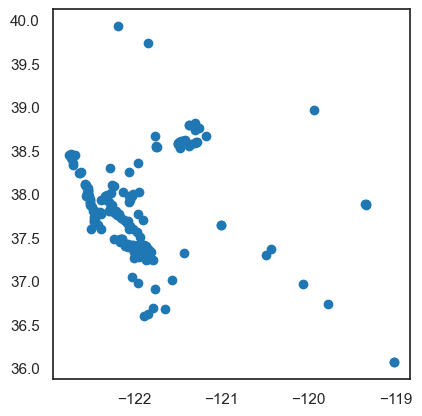

In [249]:
# a quick plot of the stations
bus_stations = pois_df[pois_df['amenity'] == 'bus_station']
bus_stations.plot()

In [250]:
# displaying the bus stations with actual map layers 
POI = bus_stations.copy()
POI = POI[(POI["lat"] >= city_bounds["min_lat"]) & (POI["lat"] <= city_bounds["max_lat"]) &
        (POI["lon"] >= city_bounds["min_lon"]) &
        (POI["lon"] <= city_bounds["max_lon"])]
POI["Coordinates"] = list(zip(POI["lat"].round(4), POI["lon"].round(4)))
POI_map = folium.Map(location=center_map, tiles='OpenStreetMap', zoom_start=10, control_scale=True, max_zoom=20)
positions = list(POI['Coordinates'].unique())

for position in positions:
    name = POI.loc[POI['Coordinates'] == position, 'name'].values[0]
   
    marker = folium.Marker(location=position, popup=f'{name}')
    marker.add_to(POI_map)

display(POI_map)

### 1.8.3. - Displaying the location of stations
Displaying the location of the stations on the map will enable us to investigate closely the area of operations of the baywheels bike sharing system, providing us with valuable insights that we would not uncover by just looking at the latitude and longitude coordinates.

In [251]:
# make a stations_df to use for displaying locations 
columns = ['start_station_id','start_station_lat','start_station_lon']
stations_df = baywheels_df[columns]
stations_df = stations_df.drop_duplicates(subset=['start_station_id'])
stations_df.head()


start_station_id  start_station_lat  start_station_lon
0               219          37.809824        -122.280192
1               202          37.800754        -122.274894
2               182          37.809013        -122.268247
3               178          37.819381        -122.261928
4               195          37.812314        -122.260779

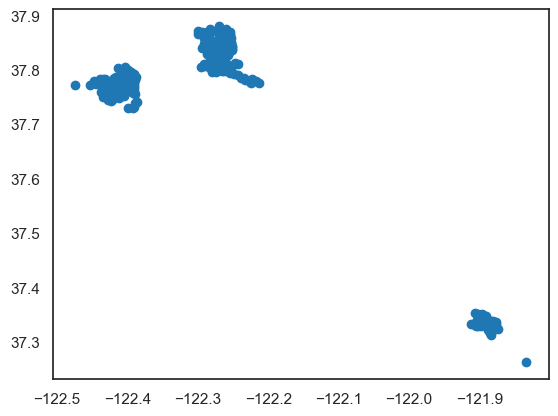

In [252]:
# display the station on a quick scatter plot
x = stations_df['start_station_lat']
y = stations_df['start_station_lon']
plt.scatter(y,x)

In [253]:
# displaying the all the stations on OpenStreetMap
center_map = [37.6, -122.1] #center of our coordinates
stations_map = folium.Map(location=center_map,tiles='OpenStreetMap',zoom_start=10, control_scale=True, max_zoom=20)

for index, row in stations_df.iterrows():
    station_id = row['start_station_id']
    latitude = row['start_station_lat']
    longitude = row['start_station_lon']
    
    # Create a marker for each station
    marker = folium.Marker([latitude, longitude], popup=f'Station ID: {station_id}')
    marker.add_to(stations_map)

stations_map

We can see that there are three operational areas in the Baywheels bike sharing system.

In [254]:
# try to cluster the stations in three groups
from sklearn.cluster import KMeans

X = stations_df[['start_station_lat','start_station_lon']]

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# get the cluster labels for each station
stations_df['area_label'] = kmeans.labels_
stations_df.head()

start_station_id  start_station_lat  start_station_lon  area_label
0               219          37.809824        -122.280192           0
1               202          37.800754        -122.274894           0
2               182          37.809013        -122.268247           0
3               178          37.819381        -122.261928           0
4               195          37.812314        -122.260779           0

In [255]:
# show the clustered stations
center_map = [37.6, -122.1]
stations_map = folium.Map(location=center_map,tiles='OpenStreetMap',zoom_start=10, control_scale=True, max_zoom=20)

for index, row in stations_df.iterrows():
    station_id = row['start_station_id']
    latitude = row['start_station_lat']
    longitude = row['start_station_lon']
    cluster_label = row['area_label']
    
    # create a marker for each station with cluster-specific colors
    if cluster_label == 0:
        marker = folium.Marker([latitude, longitude], popup=f'Station ID: {station_id}', icon=folium.Icon(color='red'))
    elif cluster_label == 1:
        marker = folium.Marker([latitude, longitude], popup=f'Station ID: {station_id}', icon=folium.Icon(color='blue'))
    else:
        marker = folium.Marker([latitude, longitude], popup=f'Station ID: {station_id}', icon=folium.Icon(color='green'))
    
    marker.add_to(stations_map)

display(stations_map)

In [256]:
# merge the new area labels in stations_df to the baywheels_df
baywheels_df = baywheels_df.merge(stations_df[['start_station_id', 'area_label']], on='start_station_id', how='left')
baywheels_df

start_time            end_time  start_station_id  start_station_lat  start_station_lon  end_station_id  end_station_lat  end_station_lon  bike_id   trip_duration       idle_time  start_temperature  end_temperature  start_cloud_cover  end_cloud_cover start_cloud_cover_description end_cloud_cover_description  start_pressure  end_pressure  start_windspeed  end_windspeed  start_precipitation  end_precipitation  start_felt_temperature  end_felt_temperature  Weekday  Is_Weekend  temperature_dif  temperature_dif_category  rain_start  station_distance  hour_of_day  month  day  area_label
0       2018-01-07 08:05:33 2018-01-07 08:11:35               219          37.809824        -122.280192             232        37.806163      -122.276040       11 0 days 00:06:02             NaT                9.0              9.0               29.0             29.0                 Partly Cloudy               Partly Cloudy         1021.31       1021.31              0.0            0.0                  0.0                0.0                     9.0                   9.0        6           1              0.0                         3           0          0.546616            8      1    7           0
1       2018-01-12 14:06:46 2018-01-12 14:12:42               202          37.800754        -122.274894             182        37.809013      -122.268247       11 0 days 00:05:56 5 days 05:55:11               12.0             12.0               26.0             26.0                        Cloudy                      Cloudy         1027.74       1027.74              0.0            0.0                  0.0                0.0                    12.0                  12.0        4           0              0.0                         3           0          1.087571           14      1   12           0
2       2018-01-12 15:57:16 2018-01-12 16:05:17               182          37.809013        -122.268247             178        37.819381      -122.261928       11 0 days 00:08:01 0 days 01:44:34               12.0             12.0               28.0             28.0                 Mostly Cloudy               Mostly Cloudy         1028.08       1028.08             11.0           11.0                  0.0                0.0                    12.0                  12.0        4           0              0.0                         3           0          1.278308           16      1   12           0
3       2018-01-14 11:02:47 2018-01-14 11:08:04               178          37.819381        -122.261928             195        37.812314      -122.260779       11 0 days 00:05:17 1 days 18:57:30               11.0             10.0               33.0             33.0                          Fair                        Fair         1020.97       1020.63              9.0            6.0                  0.0                0.0                    11.0                  10.0        6           1              1.0                         4           0          0.790929           11      1   14           0
4       2018-01-14 11:48:48 2018-01-14 11:57:23               195          37.812314        -122.260779             215        37.822547      -122.266318       11 0 days 00:08:35 0 days 00:40:44               10.0             10.0               26.0             26.0                        Cloudy                      Cloudy         1020.29       1020.29              9.0            9.0                  0.0                0.0                    10.0                  10.0        6           1              0.0                         3           0          1.236129           11      1   14           0
...                     ...                 ...               ...                ...                ...             ...              ...              ...      ...             ...             ...                ...              ...                ...              ...                           ...                         ...             ...           ...              ...            ...       

In [257]:
# make a seperate dataframe for each area for showing locations of stations
san_jose_df_points = stations_df[stations_df['area_label'] == 1]

san_fran_df_points = stations_df[stations_df['area_label'] == 2]

oakland_df_points = stations_df[stations_df['area_label'] == 0]

In [258]:
# make a separate dataframe for each area with all columns
san_jose_df_full = baywheels_df[baywheels_df['area_label'] == 1]

san_fran_df_full = baywheels_df[baywheels_df['area_label'] == 2]

oakland_df_full = baywheels_df[baywheels_df['area_label'] == 0]
oakland_df_full.head()

start_time            end_time  start_station_id  start_station_lat  start_station_lon  end_station_id  end_station_lat  end_station_lon  bike_id   trip_duration       idle_time  start_temperature  end_temperature  start_cloud_cover  end_cloud_cover start_cloud_cover_description end_cloud_cover_description  start_pressure  end_pressure  start_windspeed  end_windspeed  start_precipitation  end_precipitation  start_felt_temperature  end_felt_temperature  Weekday  Is_Weekend  temperature_dif  temperature_dif_category  rain_start  station_distance  hour_of_day  month  day  area_label
0 2018-01-07 08:05:33 2018-01-07 08:11:35               219          37.809824        -122.280192             232        37.806163      -122.276040       11 0 days 00:06:02             NaT                9.0              9.0               29.0             29.0                 Partly Cloudy               Partly Cloudy         1021.31       1021.31              0.0            0.0                  0.0                0.0                     9.0                   9.0        6           1              0.0                         3           0          0.546616            8      1    7           0
1 2018-01-12 14:06:46 2018-01-12 14:12:42               202          37.800754        -122.274894             182        37.809013      -122.268247       11 0 days 00:05:56 5 days 05:55:11               12.0             12.0               26.0             26.0                        Cloudy                      Cloudy         1027.74       1027.74              0.0            0.0                  0.0                0.0                    12.0                  12.0        4           0              0.0                         3           0          1.087571           14      1   12           0
2 2018-01-12 15:57:16 2018-01-12 16:05:17               182          37.809013        -122.268247             178        37.819381      -122.261928       11 0 days 00:08:01 0 days 01:44:34               12.0             12.0               28.0             28.0                 Mostly Cloudy               Mostly Cloudy         1028.08       1028.08             11.0           11.0                  0.0                0.0                    12.0                  12.0        4           0              0.0                         3           0          1.278308           16      1   12           0
3 2018-01-14 11:02:47 2018-01-14 11:08:04               178          37.819381        -122.261928             195        37.812314      -122.260779       11 0 days 00:05:17 1 days 18:57:30               11.0             10.0               33.0             33.0                          Fair                        Fair         1020.97       1020.63              9.0            6.0                  0.0                0.0                    11.0                  10.0        6           1              1.0                         4           0          0.790929           11      1   14           0
4 2018-01-14 11:48:48 2018-01-14 11:57:23               195          37.812314        -122.260779             215        37.822547      -122.266318       11 0 days 00:08:35 0 days 00:40:44               10.0             10.0               26.0             26.0                        Cloudy                      Cloudy         1020.29       1020.29              9.0            9.0                  0.0                0.0                    10.0                  10.0        6           1              0.0                         3           0          1.236129           11      1   14           0

In [259]:
# show just the stations in the San Francisco area
center_map = [37.737, -122.43]
san_fran_map = folium.Map(location=center_map,tiles='OpenStreetMap',zoom_start=12, control_scale=True, max_zoom=20)

for index, row in san_fran_df_points.iterrows():
    station_id = row['start_station_id']
    latitude = row['start_station_lat']
    longitude = row['start_station_lon']
    
    marker = folium.Marker([latitude, longitude], popup=f'Station ID: {station_id}', icon=folium.Icon(color='green'))
    marker.add_to(san_fran_map)

san_fran_map

In [260]:
# show just the stations in the San Jose area
center_map = [37.300964,-121.882016]
san_jose_map = folium.Map(location=center_map,tiles='OpenStreetMap',zoom_start=12.3, control_scale=True, max_zoom=20)

for index, row in san_jose_df_points.iterrows():
    station_id = row['start_station_id']
    latitude = row['start_station_lat']
    longitude = row['start_station_lon']
    
    marker = folium.Marker([latitude, longitude], popup=f'Station ID: {station_id}', icon=folium.Icon(color='blue'))
    marker.add_to(san_jose_map)

san_jose_map

In [261]:
# show just the stations in the Oakland area
center_map = [37.830824, -122.2801920]
oakland_map = folium.Map(location=center_map,tiles='OpenStreetMap',zoom_start=12.3, control_scale=True, max_zoom=20)

for index, row in oakland_df_points.iterrows():
    station_id = row['start_station_id']
    latitude = row['start_station_lat']
    longitude = row['start_station_lon']
    
    marker = folium.Marker([latitude, longitude], popup=f'Station ID: {station_id}', icon=folium.Icon(color='red'))
    marker.add_to(oakland_map)

oakland_map

In [262]:
# display list of all stations in the corresponding areas
oakland_list = oakland_df_points['start_station_id'].tolist()
san_jose_list = san_jose_df_points['start_station_id'].tolist()
san_fran_list = san_fran_df_points['start_station_id'].tolist()

print('In Oakland are the following stations:', oakland_list)
print('\nIn San Francisco are the following stations:', san_fran_list)
print('\nIn San Jose are the following stations:', san_jose_list)

In Oakland are the following stations: [219, 202, 182, 178, 195, 215, 162, 163, 167, 212, 233, 201, 186, 194, 181, 196, 7, 337, 197, 183, 180, 164, 189, 153, 150, 187, 203, 200, 239, 245, 247, 250, 251, 259, 256, 176, 211, 198, 160, 231, 234, 227, 174, 188, 230, 266, 252, 270, 340, 274, 157, 241, 169, 193, 158, 168, 269, 272, 220, 338, 159, 265, 248, 254, 253, 249, 171, 205, 246, 18, 240, 243, 315, 151, 166, 267, 242, 273, 268, 214, 191, 232, 190, 218, 155, 372, 46, 339, 222, 237, 210, 213, 179, 175, 235, 238, 244, 206, 177, 172, 149, 209, 204, 207, 173, 221, 154, 236, 148, 216, 263, 192, 255, 258, 152, 351, 262, 170, 225, 228, 156, 271, 217, 257, 229, 226, 224]

In San Francisco are the following stations: [60, 324, 37, 53, 5, 25, 66, 74, 21, 49, 133, 137, 36, 28, 16, 17, 27, 24, 30, 44, 81, 93, 285, 34, 19, 6, 323, 22, 107, 129, 119, 89, 122, 26, 90, 114, 80, 130, 141, 97, 3, 42, 41, 116, 72, 15, 14, 58, 78, 43, 98, 105, 120, 75, 79, 13, 95, 33, 67, 4, 86, 23, 342, 20, 29, 59, 125, 1

### 1.8.4. - Focusing on San Francisco area
We will further on just focus on the **San Francisco** area, because: 
- The San Francisco area contains 1 362 601 entries out of 1 851 949 in the whole year
- The terrain of the areas differs therefore we assume that the usage patterns could differ
- The movement of bikes between the areas was not possible in 2018, the bikes that are in SF area stay in SF area
- The weather data gives information only about San Francisco, due to the Oakland area beeing 65 kilometers from SF we assume that the weather is there different therefore we cannost apply the weather data to that area Furthermore SF is known for having a distinctive weather climate in comparison with inland california due to it being surrounded by the ocean.

In [263]:
baywheels_df.head()

start_time            end_time  start_station_id  start_station_lat  start_station_lon  end_station_id  end_station_lat  end_station_lon  bike_id   trip_duration       idle_time  start_temperature  end_temperature  start_cloud_cover  end_cloud_cover start_cloud_cover_description end_cloud_cover_description  start_pressure  end_pressure  start_windspeed  end_windspeed  start_precipitation  end_precipitation  start_felt_temperature  end_felt_temperature  Weekday  Is_Weekend  temperature_dif  temperature_dif_category  rain_start  station_distance  hour_of_day  month  day  area_label
0 2018-01-07 08:05:33 2018-01-07 08:11:35               219          37.809824        -122.280192             232        37.806163      -122.276040       11 0 days 00:06:02             NaT                9.0              9.0               29.0             29.0                 Partly Cloudy               Partly Cloudy         1021.31       1021.31              0.0            0.0                  0.0                0.0                     9.0                   9.0        6           1              0.0                         3           0          0.546616            8      1    7           0
1 2018-01-12 14:06:46 2018-01-12 14:12:42               202          37.800754        -122.274894             182        37.809013      -122.268247       11 0 days 00:05:56 5 days 05:55:11               12.0             12.0               26.0             26.0                        Cloudy                      Cloudy         1027.74       1027.74              0.0            0.0                  0.0                0.0                    12.0                  12.0        4           0              0.0                         3           0          1.087571           14      1   12           0
2 2018-01-12 15:57:16 2018-01-12 16:05:17               182          37.809013        -122.268247             178        37.819381      -122.261928       11 0 days 00:08:01 0 days 01:44:34               12.0             12.0               28.0             28.0                 Mostly Cloudy               Mostly Cloudy         1028.08       1028.08             11.0           11.0                  0.0                0.0                    12.0                  12.0        4           0              0.0                         3           0          1.278308           16      1   12           0
3 2018-01-14 11:02:47 2018-01-14 11:08:04               178          37.819381        -122.261928             195        37.812314      -122.260779       11 0 days 00:05:17 1 days 18:57:30               11.0             10.0               33.0             33.0                          Fair                        Fair         1020.97       1020.63              9.0            6.0                  0.0                0.0                    11.0                  10.0        6           1              1.0                         4           0          0.790929           11      1   14           0
4 2018-01-14 11:48:48 2018-01-14 11:57:23               195          37.812314        -122.260779             215        37.822547      -122.266318       11 0 days 00:08:35 0 days 00:40:44               10.0             10.0               26.0             26.0                        Cloudy                      Cloudy         1020.29       1020.29              9.0            9.0                  0.0                0.0                    10.0                  10.0        6           1              0.0                         3           0          1.236129           11      1   14           0

In [264]:
san_fran_df = baywheels_df[baywheels_df['area_label'] == 2]

In [265]:
san_fran_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1362601 entries, 1435 to 1851949
Data columns (total 35 columns):
 #   Column                         Non-Null Count    Dtype          
---  ------                         --------------    -----          
 0   start_time                     1362601 non-null  datetime64[ns] 
 1   end_time                       1362601 non-null  datetime64[ns] 
 2   start_station_id               1362601 non-null  int64          
 3   start_station_lat              1362601 non-null  float64        
 4   start_station_lon              1362601 non-null  float64        
 5   end_station_id                 1362601 non-null  int64          
 6   end_station_lat                1362601 non-null  float64        
 7   end_station_lon                1362601 non-null  float64        
 8   bike_id                        1362601 non-null  int64          
 9   trip_duration                  1362601 non-null  timedelta64[ns]
 10  idle_time                      1359902 

We have to check if all trips in the san_fran_df have been started and ended in the San Fransisco area.

In [266]:
check_values('station_distance')

largest values in station_distance: [65.30812497359086, 19.23617238109388, 16.554505913816673, 16.368890964414334, 15.453959256313478, 15.275321274557731, 15.267686544328146, 14.817883140943849, 14.56289495133352, 14.526817788634384]
smallest values in station_distance:[0.0, 0.0133070687183611, 0.0220028336614077, 0.0775642916346313, 0.1218838620614592, 0.123870438265081, 0.1414923513217342, 0.1518846929790127, 0.1526957161289509, 0.1596110645456167]


We can see that there are some really big distances between the stations, suggesting that there have been a few trips made from San Francisco to Oakland or San Jose areas.

In [267]:
# make a end_stations_df to use for displaying locations 
columns = ['end_station_id','end_station_lat','end_station_lon']
end_stations_df = san_fran_df[columns]
end_stations_df = end_stations_df.drop_duplicates(subset=['end_station_id'])

end_stations_df.head()

end_station_id  end_station_lat  end_station_lon
1435             324        37.788300      -122.408531
1436              37        37.785000      -122.395936
1437              21        37.789625      -122.400811
1438               5        37.783899      -122.408445
1439              25        37.787522      -122.397405

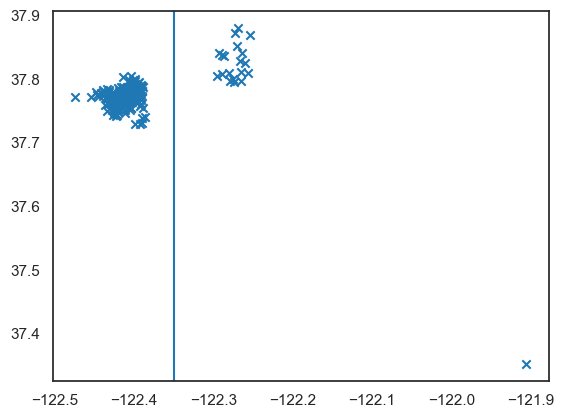

In [268]:
# plot the end_stations locations to see the outliers
x = end_stations_df['end_station_lat']
y = end_stations_df['end_station_lon']
plt.scatter(y,x, marker='x')
plt.axvline(x=-122.35) #we find a latitude value that clearly separates San Francisco from the other areas.
plt.show()

We can indeed see that there there are some trips that have been started in San Francisco area but were ended in a different area such as San Jose or Oakland. 

We will drop the rows where the bikes have left the San Francisco area, because our model only predicts on the data from San Francisco area.

In [269]:
# rows that we will drop from the san_fran_df
rows_to_drop = san_fran_df[san_fran_df['end_station_lon'] > -122.35]
rows_to_drop.head()

start_time            end_time  start_station_id  start_station_lat  start_station_lon  end_station_id  end_station_lat  end_station_lon  bike_id   trip_duration       idle_time  start_temperature  end_temperature  start_cloud_cover  end_cloud_cover start_cloud_cover_description end_cloud_cover_description  start_pressure  end_pressure  start_windspeed  end_windspeed  start_precipitation  end_precipitation  start_felt_temperature  end_felt_temperature  Weekday  Is_Weekend  temperature_dif  temperature_dif_category  rain_start  station_distance  hour_of_day  month  day  area_label
58916  2018-08-15 17:06:54 2018-08-15 22:44:21                 9          37.798572        -122.400869             151        37.836182      -122.287180      166 0 days 05:37:27 0 days 08:16:02               18.0             21.0               26.0             34.0                        Cloudy                Fair / Windy         1014.88       1013.86             15.0           35.0                  0.0                0.0                    18.0                  21.0        2           0             -3.0                         2           0         10.845829           22      8   15           2
121027 2018-03-29 14:25:47 2018-03-29 20:29:44                16          37.794130        -122.394430             303        37.352601      -121.905733      319 0 days 06:03:57 0 days 02:21:02               13.0             24.0               30.0             30.0                 Partly Cloudy               Partly Cloudy         1018.26       1018.26              6.0            0.0                  0.0                0.0                    13.0                  24.0        3           0            -11.0                         0           0         65.308125           20      3   29           2
125517 2018-06-06 21:26:16 2018-06-06 22:10:49                41          37.781270        -122.418740             156        37.838443      -122.288665      327 0 days 00:44:33 1 days 01:01:57               17.0             17.0               28.0             28.0                 Mostly Cloudy               Mostly Cloudy         1013.52       1013.52             30.0           30.0                  0.0                0.0                    17.0                  17.0        2           0              0.0                         3           0         13.094658           22      6    6           2
159106 2018-02-15 19:49:36 2018-02-15 21:13:04                93          37.770407        -122.391198             219        37.809824      -122.280192      418 0 days 01:23:28 0 days 00:33:57               14.0             16.0               34.0             34.0                          Fair                        Fair         1025.71       1024.70              0.0           11.0                  0.0                0.0                    14.0                  16.0        3           0             -2.0                         2           0         10.711788           21      2   15           2
294413 2018-07-14 17:41:41 2018-07-14 22:16:50                10          37.795393        -122.404770             202        37.800754      -122.274894      755 0 days 04:35:09 0 days 00:05:29               19.0             19.0               34.0             30.0                          Fair       Partly Cloudy / Windy         1017.59       1015.89             24.0           33.0                  0.0                0.0                    19.0                  19.0        5           1              0.0                         3           0         11.454000           22      7   14           2

In [270]:
# drop the rows
san_fran_df.drop(rows_to_drop.index, inplace=True)

In [271]:
san_fran_df.head()

start_time            end_time  start_station_id  start_station_lat  start_station_lon  end_station_id  end_station_lat  end_station_lon  bike_id   trip_duration       idle_time  start_temperature  end_temperature  start_cloud_cover  end_cloud_cover start_cloud_cover_description end_cloud_cover_description  start_pressure  end_pressure  start_windspeed  end_windspeed  start_precipitation  end_precipitation  start_felt_temperature  end_felt_temperature  Weekday  Is_Weekend  temperature_dif  temperature_dif_category  rain_start  station_distance  hour_of_day  month  day  area_label
1435 2018-01-02 07:32:44 2018-01-02 07:44:36                60          37.774520        -122.409449             324        37.788300      -122.408531       17 0 days 00:11:52             NaT               12.0             12.0               26.0             26.0                        Cloudy                      Cloudy         1021.65       1021.65              6.0            6.0                  0.0                0.0                    12.0                  12.0        1           0              0.0                         3           0          1.531567            7      1    2           2
1436 2018-01-02 09:17:14 2018-01-02 09:23:41               324          37.788300        -122.408531              37        37.785000      -122.395936       17 0 days 00:06:27 0 days 01:32:38               12.0             12.0               26.0             26.0                        Cloudy                      Cloudy         1021.31       1021.31              6.0            6.0                  0.0                0.0                    12.0                  12.0        1           0              0.0                         3           0          1.168362            9      1    2           2
1437 2018-01-03 05:13:20 2018-01-03 05:15:55                37          37.785000        -122.395936              21        37.789625      -122.400811       17 0 days 00:02:35 0 days 19:49:39               14.0             14.0               26.0             26.0                        Cloudy                      Cloudy         1018.60       1018.60              6.0            6.0                  0.0                0.0                    14.0                  14.0        2           0              0.0                         3           0          0.669345            5      1    3           2
1438 2018-01-03 12:49:30 2018-01-03 13:11:05                53          37.775946        -122.437777               5        37.783899      -122.408445       17 0 days 00:21:35 0 days 07:33:35               12.0             12.0               27.0             27.0                 Mostly Cloudy               Mostly Cloudy         1016.57       1016.57              6.0            6.0                  0.0                0.0                    12.0                  12.0        2           0              0.0                         3           0          2.730661           13      1    3           2
1439 2018-01-03 16:21:24 2018-01-03 16:26:19                 5          37.783899        -122.408445              25        37.787522      -122.397405       17 0 days 00:04:55 0 days 03:10:19               11.0             12.0               28.0             26.0                 Mostly Cloudy                      Cloudy         1016.23       1016.57              0.0            7.0                  0.0                0.0                    11.0                  12.0        2           0             -1.0                         2           0          1.052319           16      1    3           2

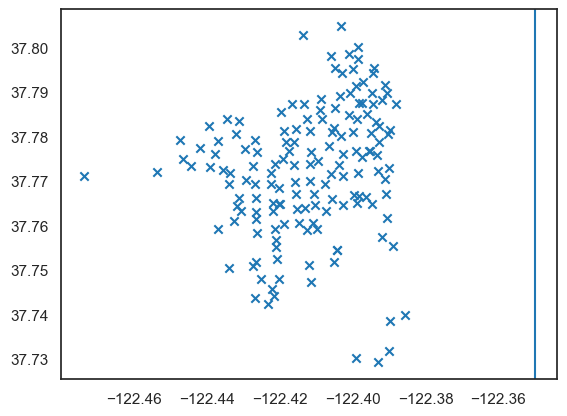

In [272]:
# check if the drop worked by ploting the end station locations 
columns = ['end_station_id','end_station_lat','end_station_lon']
end_stations_df = san_fran_df[columns]
end_stations_df = end_stations_df.drop_duplicates(subset=['end_station_id'])
x = end_stations_df['end_station_lat']
y = end_stations_df['end_station_lon']
plt.scatter(y,x, marker='x')
plt.axvline(x=-122.35)

### 1.8.5. - POI features
The process that brought us to choose the following points of interest has been driven by the visual analysis made on the usage volume of Bike Stations located in a radius of 400m from our POI.
#### 1.8.5.1 - King street central station
King street central station is one of our first potential POIs that we could use for predicting the idle_time.

Located just south of Market Street, this station represents one of the most relevant points for bikes drop off and pick up, displaying all the point of interest in this area we found the Tahoe Convoy bus station that can be considered as our POI for summing up the bike sharing volume of this area of the city.
Supporting this POI decision is the presence of three of the most used Bike Stations in all of San Francisco, station 81 and station 30 and station 67.


We use the coordinates of the Tahoe Convoy bus station as a placeholder of the coordinates for the King street station:

In [273]:
central_station = pois_df[pois_df['name'] == 'Tahoe Convoy']
central_station

version   timestamp  changeset          id        lat        lon          name opening_hours      amenity  atm bank bicycle_parking bicycle_rental  bar building building:levels cafe car_wash drinking_water fast_food fountain fuel gambling ice_cream internet_access kindergarten landuse library office parking police school social_facility source start_date theatre university wikipedia agrarian alcohol bakery bicycle books  car clothes coffee collector computer cosmetics craft dry_cleaning fireplace furniture  gas hairdresser kiosk kitchen lottery massage medical_supply model motorcycle music musical_instrument organic outdoor  pet religion second_hand shoes shop  ski supermarket trade video water wholesale wine attraction camp_site guest_house information museum tourism viewpoint  zoo                     geometry osm_type  bbq restaurant social_centre caravan deli golf laundry swimming_pool trailer tyres
79303        2  1617944594        0.0  8418786287  37.775352 -122.39713  Tahoe Convoy           NaN  bus_station  NaN  NaN             NaN            NaN  NaN      NaN             NaN  NaN      NaN            NaN       NaN      NaN  NaN      NaN       NaN             NaN          NaN     NaN     NaN    NaN     NaN    NaN    NaN             NaN    NaN        NaN     NaN        NaN       NaN      NaN     NaN    NaN     NaN   NaN  NaN     NaN    NaN       NaN      NaN       NaN   NaN          NaN       NaN       NaN  NaN         NaN   NaN     NaN     NaN     NaN            NaN   NaN        NaN   NaN                NaN     NaN     NaN  NaN      NaN         NaN   NaN  NaN  NaN         NaN   NaN   NaN   NaN       NaN  NaN        NaN       NaN         NaN         NaN    NaN     NaN       NaN  NaN  POINT (-122.39713 37.77535)     node  NaN        NaN           NaN     NaN  NaN  NaN     NaN           NaN     NaN   NaN

We define a new function that will calculate the distance of the a station in kilometers from the chosen POI. 

In [274]:
def calculate_distance(row, lat, lon, central_station):
    location = (row[lat], row[lon])
    target_location = (central_station['lat'], central_station['lon'])
    return geodesic(location, target_location).kilometers

central_station = {'lat': 37.775352, 'lon': -122.39713}
#we will not let this run due to time constraints
"""
san_fran_df['end_station_central_station_dist'] = san_fran_df.apply(lambda row: calculate_distance(row, 'end_station_lat', 'end_station_lon', central_station), axis=1)
"""
print()

In [275]:
san_fran_df

start_time            end_time  start_station_id  start_station_lat  start_station_lon  end_station_id  end_station_lat  end_station_lon  bike_id   trip_duration       idle_time  start_temperature  end_temperature  start_cloud_cover  end_cloud_cover start_cloud_cover_description end_cloud_cover_description  start_pressure  end_pressure  start_windspeed  end_windspeed  start_precipitation  end_precipitation  start_felt_temperature  end_felt_temperature  Weekday  Is_Weekend  temperature_dif  temperature_dif_category  rain_start  station_distance  hour_of_day  month  day  area_label
1435    2018-01-02 07:32:44 2018-01-02 07:44:36                60          37.774520        -122.409449             324        37.788300      -122.408531       17 0 days 00:11:52             NaT               12.0             12.0               26.0             26.0                        Cloudy                      Cloudy         1021.65       1021.65              6.0            6.0                  0.0                0.0                    12.0                  12.0        1           0              0.0                         3           0          1.531567            7      1    2           2
1436    2018-01-02 09:17:14 2018-01-02 09:23:41               324          37.788300        -122.408531              37        37.785000      -122.395936       17 0 days 00:06:27 0 days 01:32:38               12.0             12.0               26.0             26.0                        Cloudy                      Cloudy         1021.31       1021.31              6.0            6.0                  0.0                0.0                    12.0                  12.0        1           0              0.0                         3           0          1.168362            9      1    2           2
1437    2018-01-03 05:13:20 2018-01-03 05:15:55                37          37.785000        -122.395936              21        37.789625      -122.400811       17 0 days 00:02:35 0 days 19:49:39               14.0             14.0               26.0             26.0                        Cloudy                      Cloudy         1018.60       1018.60              6.0            6.0                  0.0                0.0                    14.0                  14.0        2           0              0.0                         3           0          0.669345            5      1    3           2
1438    2018-01-03 12:49:30 2018-01-03 13:11:05                53          37.775946        -122.437777               5        37.783899      -122.408445       17 0 days 00:21:35 0 days 07:33:35               12.0             12.0               27.0             27.0                 Mostly Cloudy               Mostly Cloudy         1016.57       1016.57              6.0            6.0                  0.0                0.0                    12.0                  12.0        2           0              0.0                         3           0          2.730661           13      1    3           2
1439    2018-01-03 16:21:24 2018-01-03 16:26:19                 5          37.783899        -122.408445              25        37.787522      -122.397405       17 0 days 00:04:55 0 days 03:10:19               11.0             12.0               28.0             26.0                 Mostly Cloudy                      Cloudy         1016.23       1016.57              0.0            7.0                  0.0                0.0                    11.0                  12.0        2           0             -1.0                         2           0          1.052319           16      1    3           2
...                     ...                 ...               ...                ...                ...             ...              ...              ...      ...             ...             ...                ...              ...                ...              ...                           ...                         ...             ...           ...              ...            ...       

We are interested in the distance of the end_station from a chosen POI. The assumptions is that the idle_time will be influenced by/dependent on the how far the station is located from a point of interest.

#### 1.8.5.2. - Twitter HQ
For comparison we will also choose more random point from the map where there also was a lot of rentals (only at one station), such as a place in the vicinity of the Twitter HQ.

In [276]:
twitter_HQ = {"lat": 37.7767414, "lon": -122.4165504}
#we will not let this run due to time constraints
"""
san_fran_df['end_station_twitter_HQ_dist'] = san_fran_df.apply(lambda row: calculate_distance(row, 'end_station_lat', 'end_station_lon', twitter_HQ), axis=1)
"""
print()

In [277]:
#check if a new column has been added
san_fran_df.head()

start_time            end_time  start_station_id  start_station_lat  start_station_lon  end_station_id  end_station_lat  end_station_lon  bike_id   trip_duration       idle_time  start_temperature  end_temperature  start_cloud_cover  end_cloud_cover start_cloud_cover_description end_cloud_cover_description  start_pressure  end_pressure  start_windspeed  end_windspeed  start_precipitation  end_precipitation  start_felt_temperature  end_felt_temperature  Weekday  Is_Weekend  temperature_dif  temperature_dif_category  rain_start  station_distance  hour_of_day  month  day  area_label
1435 2018-01-02 07:32:44 2018-01-02 07:44:36                60          37.774520        -122.409449             324        37.788300      -122.408531       17 0 days 00:11:52             NaT               12.0             12.0               26.0             26.0                        Cloudy                      Cloudy         1021.65       1021.65              6.0            6.0                  0.0                0.0                    12.0                  12.0        1           0              0.0                         3           0          1.531567            7      1    2           2
1436 2018-01-02 09:17:14 2018-01-02 09:23:41               324          37.788300        -122.408531              37        37.785000      -122.395936       17 0 days 00:06:27 0 days 01:32:38               12.0             12.0               26.0             26.0                        Cloudy                      Cloudy         1021.31       1021.31              6.0            6.0                  0.0                0.0                    12.0                  12.0        1           0              0.0                         3           0          1.168362            9      1    2           2
1437 2018-01-03 05:13:20 2018-01-03 05:15:55                37          37.785000        -122.395936              21        37.789625      -122.400811       17 0 days 00:02:35 0 days 19:49:39               14.0             14.0               26.0             26.0                        Cloudy                      Cloudy         1018.60       1018.60              6.0            6.0                  0.0                0.0                    14.0                  14.0        2           0              0.0                         3           0          0.669345            5      1    3           2
1438 2018-01-03 12:49:30 2018-01-03 13:11:05                53          37.775946        -122.437777               5        37.783899      -122.408445       17 0 days 00:21:35 0 days 07:33:35               12.0             12.0               27.0             27.0                 Mostly Cloudy               Mostly Cloudy         1016.57       1016.57              6.0            6.0                  0.0                0.0                    12.0                  12.0        2           0              0.0                         3           0          2.730661           13      1    3           2
1439 2018-01-03 16:21:24 2018-01-03 16:26:19                 5          37.783899        -122.408445              25        37.787522      -122.397405       17 0 days 00:04:55 0 days 03:10:19               11.0             12.0               28.0             26.0                 Mostly Cloudy                      Cloudy         1016.23       1016.57              0.0            7.0                  0.0                0.0                    11.0                  12.0        2           0             -1.0                         2           0          1.052319           16      1    3           2

#### 1.8.5.3. San Francisco Ferry Building
The San Francisco Ferry Building is the second significatn POI we have discovered with our visual analysis.

Located in the dock area of San Francisco that connects the city with the other side of the bay is a relevant spot for people that are used to prefer bikes to cars for moving through the whole bay area.
The area of the dock is also one of the few hoods in the city without hills which makes it attractive for bike rides, validating this observation is the fact that the bike station with the highest interaction in all the bay is located in this area with more than 85 thousand interactions during the whole year.


In [278]:
ferry_building = pois_df[pois_df['name'] == 'San Francisco Ferry Building']
ferry_building

version   timestamp  changeset         id  lat  lon                          name                                      opening_hours         amenity  atm bank bicycle_parking bicycle_rental  bar  building building:levels cafe car_wash drinking_water fast_food fountain fuel gambling ice_cream internet_access kindergarten landuse library office parking police school social_facility         source start_date theatre university wikipedia agrarian alcohol bakery bicycle books  car clothes coffee collector computer cosmetics craft dry_cleaning fireplace furniture  gas hairdresser kiosk kitchen lottery massage medical_supply model motorcycle music musical_instrument organic outdoor  pet religion second_hand shoes  shop  ski supermarket trade video water wholesale wine attraction camp_site guest_house information museum     tourism viewpoint  zoo     geometry osm_type  bbq restaurant social_centre caravan deli golf laundry swimming_pool trailer tyres
154410       12  1681335904        NaN  558731934  NaN  NaN  San Francisco Ferry Building  Mo-Fr 07:00-22:00; Sa 07:00-22:00; Su 07:00-22:00  ferry_terminal  NaN  NaN             NaN            NaN  NaN  terminal             NaN  NaN      NaN            NaN       NaN      NaN  NaN      NaN       NaN             NaN          NaN     NaN     NaN    NaN     NaN    NaN    NaN             NaN  USGS Geonames        NaN     NaN        NaN       NaN      NaN     NaN    NaN     NaN   NaN  NaN     NaN    NaN       NaN      NaN       NaN   NaN          NaN       NaN       NaN  NaN         NaN   NaN     NaN     NaN     NaN            NaN   NaN        NaN   NaN                NaN     NaN     NaN  NaN      NaN         NaN   NaN  mall  NaN         NaN   NaN   NaN   NaN       NaN  NaN        NaN       NaN         NaN         NaN    NaN  attraction       NaN  NaN  POINT EMPTY      way  NaN        NaN           NaN     NaN  NaN  NaN     NaN           NaN     NaN   NaN

Because the San Francisco Ferry Building is mission coordinates we will use the coordinates of station_id 16 that is located directly infront of the building

In [279]:
station_16 = san_fran_df[san_fran_df['start_station_id'] == 16.0][['start_station_lat','start_station_lon']]
station_16

start_station_lat  start_station_lon
1450              37.79413         -122.39443
1503              37.79413         -122.39443
1670              37.79413         -122.39443
1717              37.79413         -122.39443
1725              37.79413         -122.39443
...                    ...                ...
1851609           37.79413         -122.39443
1851681           37.79413         -122.39443
1851763           37.79413         -122.39443
1851820           37.79413         -122.39443
1851880           37.79413         -122.39443

[28366 rows x 2 columns]

In [280]:
ferry_building = {'lat': 37.79413, 'lon': -122.39443}
#we will not let this run due to time constraints
"""
san_fran_df['end_station_ferry_building_dist'] = san_fran_df.apply(lambda row: calculate_distance(row, 'end_station_lat', 'end_station_lon', ferry_building), axis=1)
"""
san_fran_df.head()

start_time            end_time  start_station_id  start_station_lat  start_station_lon  end_station_id  end_station_lat  end_station_lon  bike_id   trip_duration       idle_time  start_temperature  end_temperature  start_cloud_cover  end_cloud_cover start_cloud_cover_description end_cloud_cover_description  start_pressure  end_pressure  start_windspeed  end_windspeed  start_precipitation  end_precipitation  start_felt_temperature  end_felt_temperature  Weekday  Is_Weekend  temperature_dif  temperature_dif_category  rain_start  station_distance  hour_of_day  month  day  area_label
1435 2018-01-02 07:32:44 2018-01-02 07:44:36                60          37.774520        -122.409449             324        37.788300      -122.408531       17 0 days 00:11:52             NaT               12.0             12.0               26.0             26.0                        Cloudy                      Cloudy         1021.65       1021.65              6.0            6.0                  0.0                0.0                    12.0                  12.0        1           0              0.0                         3           0          1.531567            7      1    2           2
1436 2018-01-02 09:17:14 2018-01-02 09:23:41               324          37.788300        -122.408531              37        37.785000      -122.395936       17 0 days 00:06:27 0 days 01:32:38               12.0             12.0               26.0             26.0                        Cloudy                      Cloudy         1021.31       1021.31              6.0            6.0                  0.0                0.0                    12.0                  12.0        1           0              0.0                         3           0          1.168362            9      1    2           2
1437 2018-01-03 05:13:20 2018-01-03 05:15:55                37          37.785000        -122.395936              21        37.789625      -122.400811       17 0 days 00:02:35 0 days 19:49:39               14.0             14.0               26.0             26.0                        Cloudy                      Cloudy         1018.60       1018.60              6.0            6.0                  0.0                0.0                    14.0                  14.0        2           0              0.0                         3           0          0.669345            5      1    3           2
1438 2018-01-03 12:49:30 2018-01-03 13:11:05                53          37.775946        -122.437777               5        37.783899      -122.408445       17 0 days 00:21:35 0 days 07:33:35               12.0             12.0               27.0             27.0                 Mostly Cloudy               Mostly Cloudy         1016.57       1016.57              6.0            6.0                  0.0                0.0                    12.0                  12.0        2           0              0.0                         3           0          2.730661           13      1    3           2
1439 2018-01-03 16:21:24 2018-01-03 16:26:19                 5          37.783899        -122.408445              25        37.787522      -122.397405       17 0 days 00:04:55 0 days 03:10:19               11.0             12.0               28.0             26.0                 Mostly Cloudy                      Cloudy         1016.23       1016.57              0.0            7.0                  0.0                0.0                    11.0                  12.0        2           0             -1.0                         2           0          1.052319           16      1    3           2

We export the dataframe with the calculated distances into a csv file in order to support faster loading of the notebook. The calculation of distances otherwise takes a long time.  

In [281]:
# san_fran_df.to_csv('san_fran_with_distance.csv.gz', compression='gzip')

In [282]:
#reading a csv file that already has all the distances to POIs 
san_fran_df = pd.read_csv('san_fran_with_distance.csv', low_memory=False, index_col=0) 
#make sure that you have downloaded the latest csv file form the google drive!
san_fran_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1362573 entries, 1435 to 1851949
Data columns (total 38 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   start_time                        1362573 non-null  object 
 1   end_time                          1362573 non-null  object 
 2   start_station_id                  1362573 non-null  int64  
 3   start_station_lat                 1362573 non-null  float64
 4   start_station_lon                 1362573 non-null  float64
 5   end_station_id                    1362573 non-null  int64  
 6   end_station_lat                   1362573 non-null  float64
 7   end_station_lon                   1362573 non-null  float64
 8   bike_id                           1362573 non-null  int64  
 9   trip_duration                     1362573 non-null  object 
 10  idle_time                         1359874 non-null  object 
 11  start_temperature                 

In [283]:
# convert the columns containing time values to their correct datatype
san_fran_df['start_time'] = pd.to_datetime(san_fran_df['start_time'])
san_fran_df['end_time'] = pd.to_datetime(san_fran_df['end_time']) 
                                                
san_fran_df['trip_duration'] = pd.to_timedelta(san_fran_df['trip_duration'])
san_fran_df['idle_time'] = pd.to_timedelta(san_fran_df['idle_time'])

# 2. - Descriptive analytics

## 2.1. - Overall System Performance


We will provide relevant insights for the marketing deparment for launching a new social media campaign featuring the success of the city's bikesharing system.

In [284]:
# focus on San Francisco
san_fran_df

start_time            end_time  start_station_id  start_station_lat  start_station_lon  end_station_id  end_station_lat  end_station_lon  bike_id   trip_duration       idle_time  start_temperature  end_temperature  start_cloud_cover  end_cloud_cover start_cloud_cover_description end_cloud_cover_description  start_pressure  end_pressure  start_windspeed  end_windspeed  start_precipitation  end_precipitation  start_felt_temperature  end_felt_temperature  Weekday  Is_Weekend  temperature_dif  temperature_dif_category  rain_start  station_distance  hour_of_day  month  day  area_label  end_station_central_station_dist  end_station_twitter_HQ_dist  end_station_ferry_building_dist
1435    2018-01-02 07:32:44 2018-01-02 07:44:36                60          37.774520        -122.409449             324        37.788300      -122.408531       17 0 days 00:11:52             NaT               12.0             12.0               26.0             26.0                        Cloudy                      Cloudy         1021.65       1021.65              6.0            6.0                  0.0                0.0                    12.0                  12.0        1           0              0.0                         3           0          1.531567            7      1    2           2                          1.753276                     1.464568                         1.400463
1436    2018-01-02 09:17:14 2018-01-02 09:23:41               324          37.788300        -122.408531              37        37.785000      -122.395936       17 0 days 00:06:27 0 days 01:32:38               12.0             12.0               26.0             26.0                        Cloudy                      Cloudy         1021.31       1021.31              6.0            6.0                  0.0                0.0                    12.0                  12.0        1           0              0.0                         3           0          1.168362            9      1    2           2                          1.075981                     2.034235                         1.022033
1437    2018-01-03 05:13:20 2018-01-03 05:15:55                37          37.785000        -122.395936              21        37.789625      -122.400811       17 0 days 00:02:35 0 days 19:49:39               14.0             14.0               26.0             26.0                        Cloudy                      Cloudy         1018.60       1018.60              6.0            6.0                  0.0                0.0                    14.0                  14.0        2           0              0.0                         3           0          0.669345            5      1    3           2                          1.617083                     1.991816                         0.752240
1438    2018-01-03 12:49:30 2018-01-03 13:11:05                53          37.775946        -122.437777               5        37.783899      -122.408445       17 0 days 00:21:35 0 days 07:33:35               12.0             12.0               27.0             27.0                 Mostly Cloudy               Mostly Cloudy         1016.57       1016.57              6.0            6.0                  0.0                0.0                    12.0                  12.0        2           0              0.0                         3           0          2.730661           13      1    3           2                          1.376076                     1.068203                         1.677306
1439    2018-01-03 16:21:24 2018-01-03 16:26:19                 5          37.783899        -122.408445              25        37.787522      -122.397405       17 0 days 00:04:55 0 days 03:10:19               11.0             12.0               28.0             26.0                 Mostly Cloudy                      Cloudy         1016.23       1016.57              0.0            7.0                  0.0                0.0                    11.0                  12.0        2           0             -1.0       

In [285]:
san_fran_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1362573 entries, 1435 to 1851949
Data columns (total 38 columns):
 #   Column                            Non-Null Count    Dtype          
---  ------                            --------------    -----          
 0   start_time                        1362573 non-null  datetime64[ns] 
 1   end_time                          1362573 non-null  datetime64[ns] 
 2   start_station_id                  1362573 non-null  int64          
 3   start_station_lat                 1362573 non-null  float64        
 4   start_station_lon                 1362573 non-null  float64        
 5   end_station_id                    1362573 non-null  int64          
 6   end_station_lat                   1362573 non-null  float64        
 7   end_station_lon                   1362573 non-null  float64        
 8   bike_id                           1362573 non-null  int64          
 9   trip_duration                     1362573 non-null  timedelta64[ns]
 10  idl

In [286]:
# total number of trips by counting number of rows
trips=len(san_fran_df.index)
trips

1362573

We can see that there was made a total of 1362573 trips in the San Francisco area in the year 2018, which already is a very powerful statistics which can be used for the marketing campaign.  

In [287]:
# average trips per day
trips_per_day=trips/365
trips_per_month=trips/12
print("Trips per day:", int(trips_per_day),"\nTrips per month:", int(trips_per_month))

Trips per day: 3733 
Trips per month: 113547


Furthermore it can be observed that 3733 trips were made on average every day, with 113547 bike trips per month respectively. 

Assuming that the trips are made directly from the starting station to the end one, we are able to reach the total kilometers made by the users. We are interested in seeing the total distance covered with the bikes.

In [288]:
# distance covered by the bycicles 
# assumption that trips are made directly from station to station so the estimatimation is undervalued
distance_total=san_fran_df["station_distance"].sum()
round(distance_total)

2264330

On total the users have ridden at least 2264735 kilometers on the bikes, however this estimation is highly undervalued as we are using the shortest air distance between the start and end stations.

With an assumption of an average emission of 120.1 g/km of CO2 per car, we are able to calculate the total emissions saved throughout the whole year if these users were to choose to drive a car instead of cycling with Bay Wheels.

In [289]:
# emissions times the total distance covered by the bikes
emissions=120.1
emissions_saved=distance_total*emissions
round(emissions_saved)

271946043

The users have saved by using the bike sharing system a total of 271994.7 kilograms of CO2. 

With an average of 21700 kilometers driven per car per year, we can get the number of cars the company has enabledd to stay of the streets of San Francisco.

In [290]:
# distance covered by the bikes divided by the average distance made by a car per year
avg_kms_per_car= 21700
cars_saved=distance_total/avg_kms_per_car
round(cars_saved)

104

The company has virtually achieved to reduce the yearly usage of 104 cars that did not have to drive in the streets the whole year. 

### 2.1.1. - Rush hour average number of trips per day

The rush hour in San Francisco is between 7am-9am and 4pm-7pm on week days. If we calulate the number of trips made throughout that time span, we can approximately get the number of commuters that have escape congested car traffic.

In [291]:
# set the specific hour (in 24-hour format)
morning_hour_start = 7
morning_hour_end = 9
afternoon_hour_start = 16
afternoon_hour_end = 19

# convert the 'time' column to datetime format
san_fran_df['start_time'] = pd.to_datetime(san_fran_df['start_time'], format='%Y-%m-%d %H:%M:%S')

# extract the hour from the 'start_time' column
san_fran_df['hour'] = san_fran_df['start_time'].dt.hour

# filter rows after the specific hours and on weekdays
rush_san_fran_df = san_fran_df.loc[
    (((san_fran_df['hour'] >= morning_hour_start) & (san_fran_df['hour'] < morning_hour_end)) |
     ((san_fran_df['hour'] >= afternoon_hour_start) & (san_fran_df['hour'] < afternoon_hour_end))) &
    (san_fran_df['Is_Weekend'] == 0)
].copy()

# print the filtered DataFrame
rush_san_fran_df

start_time            end_time  start_station_id  start_station_lat  start_station_lon  end_station_id  end_station_lat  end_station_lon  bike_id   trip_duration       idle_time  start_temperature  end_temperature  start_cloud_cover  end_cloud_cover start_cloud_cover_description end_cloud_cover_description  start_pressure  end_pressure  start_windspeed  end_windspeed  start_precipitation  end_precipitation  start_felt_temperature  end_felt_temperature  Weekday  Is_Weekend  temperature_dif  temperature_dif_category  rain_start  station_distance  hour_of_day  month  day  area_label  end_station_central_station_dist  end_station_twitter_HQ_dist  end_station_ferry_building_dist  hour
1435    2018-01-02 07:32:44 2018-01-02 07:44:36                60          37.774520        -122.409449             324        37.788300      -122.408531       17 0 days 00:11:52             NaT               12.0             12.0               26.0             26.0                        Cloudy                      Cloudy         1021.65       1021.65              6.0            6.0                  0.0                0.0                    12.0                  12.0        1           0              0.0                         3           0          1.531567            7      1    2           2                          1.753276                     1.464568                         1.400463     7
1439    2018-01-03 16:21:24 2018-01-03 16:26:19                 5          37.783899        -122.408445              25        37.787522      -122.397405       17 0 days 00:04:55 0 days 03:10:19               11.0             12.0               28.0             26.0                 Mostly Cloudy                      Cloudy         1016.23       1016.57              0.0            7.0                  0.0                0.0                    11.0                  12.0        2           0             -1.0                         2           0          1.052319           16      1    3           2                          1.350970                     2.067894                         0.778864    16
1440    2018-01-03 16:38:29 2018-01-03 16:46:13                25          37.787522        -122.397405              30        37.776598      -122.395282       17 0 days 00:07:44 0 days 00:12:10               12.0             12.0               26.0             26.0                        Cloudy                      Cloudy         1016.57       1016.57              7.0            7.0                  0.0                0.0                    12.0                  12.0        2           0              0.0                         3           0          1.226794           16      1    3           2                          0.213616                     1.873774                         1.947366    16
1442    2018-01-04 07:54:10 2018-01-04 08:07:51                74          37.776435        -122.426244              21        37.789625      -122.400811       17 0 days 00:13:41 0 days 12:26:37               12.0             12.0               27.0             27.0                 Mostly Cloudy               Mostly Cloudy         1015.89       1015.89              9.0            9.0                  0.0                0.0                    12.0                  12.0        3           0              0.0                         3           0          2.676358            8      1    4           2                          1.617083                     1.991816                         0.752240     7
1444    2018-01-04 18:06:07 2018-01-04 18:31:43                49          37.780760        -122.394989             133        37.755213      -122.420975       17 0 days 00:25:36 0 days 06:58:19               13.0             13.0               26.0             28.0                        Cloudy               Mostly Cloudy         1018.60       1018.94              9.0            7.0                  0.0                0.0                    13.0                  13.0        3      

In [292]:
rush_trips=len(rush_san_fran_df.index)
rush_trips

578213

42.3% of all trips have been made in the rush hours traffic.

In [293]:
# Assumption rush hour 7-9, 16-19
rush_trips_per_day=rush_trips/365
print("Rush trips per day:", int(rush_trips_per_day))

Rush trips per day: 1584


All these trips facilitated the commutes of numerous San Francisco residents or workers, reaching on average 1584 trips per day during rush hours. This has allowed more people to escape congested car traffic and has enabled a better functioning public transportation by decreasing its demand.

All together the marketing team can present the bike sharing system as a service that is eco-friendly and which offers a very convenient alternative to slow conventional means of transport such as cars or public transport. 

## 2.2. - Station level insights

### 2.2.1. - Finding most unused stations

In [294]:
san_fran_df.head()

start_time            end_time  start_station_id  start_station_lat  start_station_lon  end_station_id  end_station_lat  end_station_lon  bike_id   trip_duration       idle_time  start_temperature  end_temperature  start_cloud_cover  end_cloud_cover start_cloud_cover_description end_cloud_cover_description  start_pressure  end_pressure  start_windspeed  end_windspeed  start_precipitation  end_precipitation  start_felt_temperature  end_felt_temperature  Weekday  Is_Weekend  temperature_dif  temperature_dif_category  rain_start  station_distance  hour_of_day  month  day  area_label  end_station_central_station_dist  end_station_twitter_HQ_dist  end_station_ferry_building_dist  hour
1435 2018-01-02 07:32:44 2018-01-02 07:44:36                60          37.774520        -122.409449             324        37.788300      -122.408531       17 0 days 00:11:52             NaT               12.0             12.0               26.0             26.0                        Cloudy                      Cloudy         1021.65       1021.65              6.0            6.0                  0.0                0.0                    12.0                  12.0        1           0              0.0                         3           0          1.531567            7      1    2           2                          1.753276                     1.464568                         1.400463     7
1436 2018-01-02 09:17:14 2018-01-02 09:23:41               324          37.788300        -122.408531              37        37.785000      -122.395936       17 0 days 00:06:27 0 days 01:32:38               12.0             12.0               26.0             26.0                        Cloudy                      Cloudy         1021.31       1021.31              6.0            6.0                  0.0                0.0                    12.0                  12.0        1           0              0.0                         3           0          1.168362            9      1    2           2                          1.075981                     2.034235                         1.022033     9
1437 2018-01-03 05:13:20 2018-01-03 05:15:55                37          37.785000        -122.395936              21        37.789625      -122.400811       17 0 days 00:02:35 0 days 19:49:39               14.0             14.0               26.0             26.0                        Cloudy                      Cloudy         1018.60       1018.60              6.0            6.0                  0.0                0.0                    14.0                  14.0        2           0              0.0                         3           0          0.669345            5      1    3           2                          1.617083                     1.991816                         0.752240     5
1438 2018-01-03 12:49:30 2018-01-03 13:11:05                53          37.775946        -122.437777               5        37.783899      -122.408445       17 0 days 00:21:35 0 days 07:33:35               12.0             12.0               27.0             27.0                 Mostly Cloudy               Mostly Cloudy         1016.57       1016.57              6.0            6.0                  0.0                0.0                    12.0                  12.0        2           0              0.0                         3           0          2.730661           13      1    3           2                          1.376076                     1.068203                         1.677306    12
1439 2018-01-03 16:21:24 2018-01-03 16:26:19                 5          37.783899        -122.408445              25        37.787522      -122.397405       17 0 days 00:04:55 0 days 03:10:19               11.0             12.0               28.0             26.0                 Mostly Cloudy                      Cloudy         1016.23       1016.57              0.0            7.0                  0.0                0.0                    11.0                  12.0        2           0         

First, we'll start with finding the number of 'interactions' for each station -  number of pick-ups, returns, and total. <br><br>The information we found will be merged into data frame named: station_utilization.

In [295]:
# make sure that all the stations will appear:
start_sta = sorted(list(set(san_fran_df['start_station_id'].tolist())))
end_sta = sorted(list(set(san_fran_df['end_station_id'].tolist())))

if len(start_sta) == len(end_sta):
    print("all stations are here")
else:
    print("problem!")
    if len(start_sta) > len(end_sta):
        print("more starting stations")
    else:
        print("more ending stations")

all stations are here


In [296]:
# counting how many times the station number appeared in order to find number of rentals and returns
start_station_counts = san_fran_df['start_station_id'].value_counts()
end_station_counts = san_fran_df['end_station_id'].value_counts()

# checking no missing values
print(start_station_counts.isna().sum())
print(start_station_counts.isna().sum())

0
0


In [297]:
# change the series into dataframe and merge both
start_station_counts_df = start_station_counts.reset_index().rename(columns={'index': 'station_id', 'start_station_id': 'pick-ups'})
end_station_counts_df = end_station_counts.reset_index().rename(columns={'index': 'station_id', 'end_station_id': 'drops'})

station_utilization = start_station_counts_df.merge(end_station_counts_df, how='outer', on='station_id')
station_utilization['total'] = station_utilization['pick-ups'] + station_utilization['drops']
station_utilization = station_utilization.sort_values(by='station_id')

station_utilization.head(20)

station_id  pick-ups  drops  total
7            3     31656  33083  64739
89           4      6058   6041  12099
10           5     25005  25998  51003
5            6     33390  39218  72608
37           8     11322  12046  23368
45           9      9986   9265  19251
64          10      7814   8419  16233
46          11      9731  10539  20270
57          13      8677   8642  17319
33          14     11549  12219  23768
0           15     38458  44103  82561
8           16     28366  28591  56957
11          17     21882  20067  41949
19          19     15611  16744  32355
23          20     12678  12883  25561
6           21     32130  35952  68082
9           22     26534  23918  50452
18          23     15906  15323  31229
24          24     12644  13148  25792
47          25      9694   9548  19242

In [298]:
# make a stations_df to use for displaying locations 
columns = ['start_station_id','start_station_lat','start_station_lon']
stations_df = san_fran_df[columns]
stations_df = stations_df.drop_duplicates(subset=['start_station_id'])
stations_df.head()

start_station_id  start_station_lat  start_station_lon
1435                60          37.774520        -122.409449
1436               324          37.788300        -122.408531
1437                37          37.785000        -122.395936
1438                53          37.775946        -122.437777
1439                 5          37.783899        -122.408445

In [299]:
station_99 = stations_df[stations_df['start_station_id']==99.0]

In [300]:
station_99

start_station_id  start_station_lat  start_station_lon
1550                99          37.767037        -122.415442

### 2.2.1.1. - Display stations on map
We have color divided the dataset depending on the number of total interactions with the station:
* red: less then 365 rentals -  it means less than 1 rental a day in this year

* orange: number of rentals between 365 and the median 

* green: others

In [301]:
import folium
# define center of the map
center_map = [37.76, -122.41]
# create a map object
stations_map = folium.Map(location=center_map,tiles='OpenStreetMap',zoom_start=12.1, control_scale=True, max_zoom=20)

# iterate over each row in stations_df
for index, row in stations_df.iterrows():
    station_id = row['start_station_id']
    latitude = row['start_station_lat']
    longitude = row['start_station_lon']

    # find the corresponding usage data for the current station_id
    row = station_utilization.loc[station_utilization['station_id'] == station_id]
    if not row.empty:
        usage_value = row.iloc[0]['total']

        # determine the marker color based on the usage value
        if usage_value < 365:
            color = 'red'
        elif usage_value <= np.median(station_utilization['total']):
            color = 'orange'
        else:
            color = 'green'

        # create a marker with the determined color
        marker = folium.Marker([latitude, longitude], popup=f'Station ID: {station_id} \nInteractions: {usage_value}', icon=folium.Icon(color=color))
        marker.add_to(stations_map)

# display the updated map
stations_map



From the map above, we can see some stations with less than 365 rentals in 2018 (red mark).
We think the operation manager should consider closing these stations and invest the resources in the more active areas.

For example: station number 48 has less than 50 interactions in the whole year. Since there are more stations close by, it might be a good idea to stop operating this station.




#### 2.2.1.2. - Checking stations activity by hour

Another way to find helpful information about the usage of the bikes, is to see in what times the stations are most used.
For start we will plot the information of the rentals in the different hours:

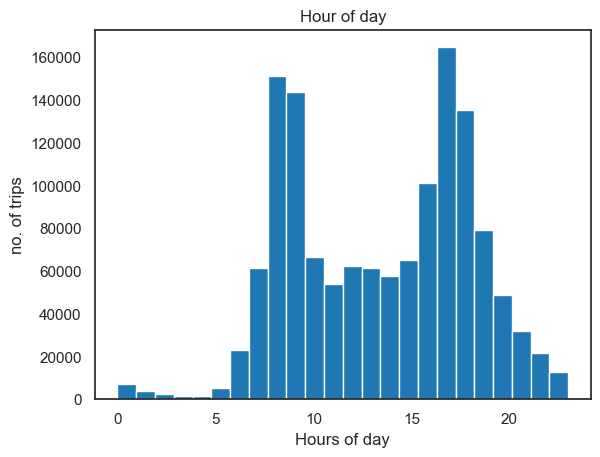

In [302]:
# amount of rentals by hour per day 
x=san_fran_df['hour_of_day']
plt.hist(x, bins=24)
plt.xlabel('Hours of day')
plt.ylabel('no. of trips')
plt.title('Hour of day')
plt.show()

According to this graph, we can see that the most active hours are around 8 - 10 in the morning, and 16 - 19 in the evening. 

We can also see that during the night, and especially between 3-4 AM, the stations are barely used. 
So first insight we can make, is that the most suitable time to hold periodic checks and repairs for bikes and stations, will be between 3-4 AM, since in these hours we have the least amount of rentals. 

To examine the stations in the active hours, we will check the most used stations between the hours 8 - 10 AM and 16 - 18.
For start we will add a new column to our data which represents the part of the day when the bikes were dropped off.
Since we care only about 2 time slots, we divide the dataset like this:


* 0 : 08:00-10:00
* 1 : 16:00-18:00
* 2 : all the other times

In [303]:
# defining a new function that shows the desired parts of the day
def get_part_of_day(dt):
    hour = dt.hour

    if 0 <= hour < 8:
        return 2
    elif  8 <= hour < 10:
        return 0
    elif 10 <= hour < 16:
        return 2
    elif 16 <= hour < 18:
        return 1
    else:
        return 2
    

san_fran_df_copy = san_fran_df.copy()
san_fran_df_copy['part_of_day_start'] = san_fran_df['start_time'].apply(lambda x: get_part_of_day(x))
san_fran_df_copy['part_of_day_end'] = san_fran_df['end_time'].apply(lambda x: get_part_of_day(x))


san_fran_df_copy.head(20)

start_time            end_time  start_station_id  start_station_lat  start_station_lon  end_station_id  end_station_lat  end_station_lon  bike_id   trip_duration       idle_time  start_temperature  end_temperature  start_cloud_cover  end_cloud_cover start_cloud_cover_description end_cloud_cover_description  start_pressure  end_pressure  start_windspeed  end_windspeed  start_precipitation  end_precipitation  start_felt_temperature  end_felt_temperature  Weekday  Is_Weekend  temperature_dif  temperature_dif_category  rain_start  station_distance  hour_of_day  month  day  area_label  end_station_central_station_dist  end_station_twitter_HQ_dist  end_station_ferry_building_dist  hour  part_of_day_start  part_of_day_end
1435 2018-01-02 07:32:44 2018-01-02 07:44:36                60          37.774520        -122.409449             324        37.788300      -122.408531       17 0 days 00:11:52             NaT               12.0             12.0               26.0             26.0                        Cloudy                      Cloudy         1021.65       1021.65              6.0            6.0                 0.00               0.00                    12.0                  12.0        1           0              0.0                         3           0          1.531567            7      1    2           2                          1.753276                     1.464568                         1.400463     7                  2                2
1436 2018-01-02 09:17:14 2018-01-02 09:23:41               324          37.788300        -122.408531              37        37.785000      -122.395936       17 0 days 00:06:27 0 days 01:32:38               12.0             12.0               26.0             26.0                        Cloudy                      Cloudy         1021.31       1021.31              6.0            6.0                 0.00               0.00                    12.0                  12.0        1           0              0.0                         3           0          1.168362            9      1    2           2                          1.075981                     2.034235                         1.022033     9                  0                0
1437 2018-01-03 05:13:20 2018-01-03 05:15:55                37          37.785000        -122.395936              21        37.789625      -122.400811       17 0 days 00:02:35 0 days 19:49:39               14.0             14.0               26.0             26.0                        Cloudy                      Cloudy         1018.60       1018.60              6.0            6.0                 0.00               0.00                    14.0                  14.0        2           0              0.0                         3           0          0.669345            5      1    3           2                          1.617083                     1.991816                         0.752240     5                  2                2
1438 2018-01-03 12:49:30 2018-01-03 13:11:05                53          37.775946        -122.437777               5        37.783899      -122.408445       17 0 days 00:21:35 0 days 07:33:35               12.0             12.0               27.0             27.0                 Mostly Cloudy               Mostly Cloudy         1016.57       1016.57              6.0            6.0                 0.00               0.00                    12.0                  12.0        2           0              0.0                         3           0          2.730661           13      1    3           2                          1.376076                     1.068203                         1.677306    12                  2                2
1439 2018-01-03 16:21:24 2018-01-03 16:26:19                 5          37.783899        -122.408445              25        37.787522      -122.397405       17 0 days 00:04:55 0 days 03:10:19               11.0             12.0               28.0             26.0                 Mostly Cloudy                      Clou

In [304]:
# calculating the number of rentals and returnes by the hour
pick_ups = san_fran_df_copy.groupby(['start_station_id', 'part_of_day_start']).size().reset_index(name='count')
drops = san_fran_df_copy.groupby(['end_station_id', 'part_of_day_end']).size().reset_index(name='count')


In [305]:
# creating 2 tables with the collected data
drops_table = pd.pivot_table(
    drops,
    values='count',
    index='end_station_id',
    columns='part_of_day_end',
    fill_value=0
)

pick_ups_table = pd.pivot_table(
    pick_ups,
    values='count',
    index='start_station_id',
    columns='part_of_day_start',
    fill_value=0
)

In [306]:
print(pick_ups_table)

part_of_day_start      0     1      2
start_station_id                     
3                   4798  6579  20279
4                   1173   800   4085
5                   3978  4989  16038
6                   4231  9514  19645
8                    630  3841   6851
9                   1371  3536   5079
10                  1022  1385   5407
11                  1158  2726   5847
13                   809  2971   4897
14                  1086  3926   6537
15                 10776  6772  20910
16                  8323  5926  14117
17                  5945  4510  11427
19                  1735  4684   9192
20                  1775  4021   6882
21                  5902  8603  17625
22                  9002  5839  11693
23                  3437  4632   7837
24                  2430  3321   6893
25                  1751  3365   4578
26                  1417  1210   4210
27                  4399  3892   9487
28                  2507  2366   7245
29                   971   672   2476
30          

In [307]:
print(drops_table)

part_of_day_end      0      1      2
end_station_id                      
3                 8070   5300  19713
4                  673   1004   4364
5                 3963   6007  16028
6                 9120   6694  23404
8                 3639   1485   6922
9                 3505    974   4786
10                1212   1381   5826
11                3540   1235   5764
13                3189    829   4624
14                4535   1401   6283
15                6078  15974  22051
16                6248   7984  14359
17                5612   3593  10862
19                6370   1954   8420
20                4502   1791   6590
21               11125   6611  18216
22                8752   5182   9984
23                5516   2493   7314
24                4249   1917   6982
25                3888    988   4672
26                1258   1411   4284
27                3775   5444   9221
28                1974   2477   7038
29                 335    611   2367
30                4962  19077  18931
3

From these tables, we can extract the stations with the most/the least pick-ups and returns in the different times of the day.  
For example:

In [308]:
# renaming and organizing the tables
new_columns_drops = {
    0: '08:00-10:00',
    1: '16:00-18:00',
    2: 'other'
}
drops_table = drops_table.rename(columns=new_columns_drops)
drops_table = drops_table.rename_axis('Station ID')
drops_table = drops_table.rename_axis('Part of Day', axis='columns')

new_columns_pick_ups = {
    0: '08:00-10:00',
    1: '16:00-18:00',
    2: 'other'
}
pick_ups_table = pick_ups_table.rename(columns=new_columns_pick_ups)
pick_ups_table = pick_ups_table.rename_axis('Station ID')
pick_ups_table = pick_ups_table.rename_axis('Part of Day', axis='columns')

# choosing the top 10 stations
morning_pickups = pick_ups_table.nlargest(10, pick_ups_table.columns[0])
morning_drops = drops_table.nlargest(10, drops_table.columns[0])
evening_drops = drops_table.nlargest(10, drops_table.columns[1])
evening_pickups = pick_ups_table.nlargest(10, pick_ups_table.columns[1])


In [309]:
print("stations with the most pickups between 08:00-10:00: \n\n ", morning_pickups, " \n\n ---------------------------------------------------------\n\n stations with the most dropoffs between 08:00-10:00: \n\n ",morning_drops)

stations with the most pickups between 08:00-10:00: 

  Part of Day  08:00-10:00  16:00-18:00  other
Station ID                                  
67                 16433         4218  16966
30                 12015         6001  17076
15                 10776         6772  20910
22                  9002         5839  11693
81                  8962         7752  17002
16                  8323         5926  14117
58                  7043         6698  21176
17                  5945         4510  11427
21                  5902         8603  17625
66                  5303         4453  11893  

 ---------------------------------------------------------

 stations with the most dropoffs between 08:00-10:00: 

  Part of Day  08:00-10:00  16:00-18:00  other
Station ID                                  
21                 11125         6611  18216
81                 11108         5220  16458
6                   9120         6694  23404
58                  8883         4876  20606
22           

In [310]:
print("\n\n stations with the most pickups between 16:00-18:00:  \n\n ",evening_pickups , " \n\n --------------------------------------------------------- \n\n stations with the most dropoffs between 16:00-18:00:  \n\n " , evening_drops)



 stations with the most pickups between 16:00-18:00:  

  Part of Day  08:00-10:00  16:00-18:00  other
Station ID                                  
6                   4231         9514  19645
21                  5902         8603  17625
81                  8962         7752  17002
15                 10776         6772  20910
58                  7043         6698  21176
3                   4798         6579  20279
30                 12015         6001  17076
16                  8323         5926  14117
22                  9002         5839  11693
90                  2779         5418  10019  

 --------------------------------------------------------- 

 stations with the most dropoffs between 16:00-18:00:  

  Part of Day  08:00-10:00  16:00-18:00  other
Station ID                                  
67                  8362        20038  21600
30                  4962        19077  18931
15                  6078        15974  22051
16                  6248         7984  14359
6      

From these tables, we can see in which stations we have the most drops or pick-ups, in the active parts of the day.
In order to understand better this information, we can plot those stations on a map, and check if those stations are close to different POIs around the city.

In [311]:
# create a new map
selected_stations_map = folium.Map(location=center_map, tiles='OpenStreetMap', zoom_start=12.4, control_scale=True, max_zoom=20)

# define the selected station numbers
selected_station_numbers = [67,30,15,22,81,16,58,17,21,66,6,3,90,19,5,27]

# iterate over each row in stations_df
for index, row in stations_df.iterrows():
    station_id = row['start_station_id']
    latitude = row['start_station_lat']
    longitude = row['start_station_lon']

    # check if the station_id is in the list of selected station numbers
    if station_id in selected_station_numbers:
        # find the corresponding usage data for the current station_id
        row = station_utilization.loc[station_utilization['station_id'] == station_id]
        if not row.empty:
            usage_value = row.iloc[0]['total']

            # determine the marker color based on the usage value
            if usage_value < 365:
                color = 'red'
            elif usage_value <= np.median(station_utilization['total']): 
                color = 'orange'
            else:
                color = 'green'

            # create a marker with the determined color
            marker = folium.Marker([latitude, longitude], popup=f'Station ID: {station_id} \nInteractions: {usage_value}', icon=folium.Icon(color=color))
            marker.add_to(selected_stations_map)

# display the updated map
display(selected_stations_map)


The first thing we can notice from the map, is that the most used stations are next to main roads. Furthermore, we can see that stations number: 81, 67 and 30 are next to the main train station, and station number 15 is next to the ferry.

According to what we have found, we can recommend to the operation manager to place more stations next to the main roads and the main public transportation stations. <br>
Another thing we can notice is that the number of drops in the stations 67, 30 and 15 between 16 - 18 PM is very high, also when referring to other stations. Also in the morning hours, the number of pick-ups from these stations is the highest, so we can recommend to increase the number of parking places in these stations to facilitate more people to make trips from these stations and to increase the drop-off capacity of the stations.

### 2.2.2. - Examining the trip duration
Now we will try to find some insights by looking at the average trip duration of each station.<br>
We will look at the average trip durations of the bikes that were returned to stations.


In [312]:
import pandas as pd
from datetime import timedelta

stations_trip_duration_end = san_fran_df.groupby('end_station_id')['trip_duration'].describe()

# calculate the mean of the means in minutes, filtering out NaN values
mean_duration_mean = stations_trip_duration_end['mean']
mean_duration_mean_minutes = mean_duration_mean.apply(lambda x: x.total_seconds() / 60)
mean_duration_mean_minutes = mean_duration_mean_minutes.dropna()

# calculate the overall mean of the means (excluding NaNs)
if mean_duration_mean_minutes.any():
    overall_mean_minutes = mean_duration_mean_minutes.mean()
else:
    overall_mean_minutes = 0

# iterate over each row in stations_df
for index, row in stations_df.iterrows():
    station_id = row['start_station_id']
    latitude = row['start_station_lat']
    longitude = row['start_station_lon']

    # find the corresponding trip duration statistics for the current station_id
    if station_id in stations_trip_duration_end.index:
        trip_stats = stations_trip_duration_end.loc[station_id]
        mean_duration = trip_stats['mean']
        max_duration = trip_stats['max']
        min_duration = trip_stats['min']

        # convert timedelta values to minutes
        mean_duration_minutes = mean_duration.total_seconds() / 60
        max_duration_minutes = max_duration.total_seconds() / 60
        min_duration_minutes = min_duration.total_seconds() / 60

        # determine the marker color based on the trip duration statistics
        if mean_duration < timedelta(minutes=10):
            color = 'blue'
        elif mean_duration <= timedelta(minutes=overall_mean_minutes):
            color = 'green'
        elif mean_duration <= timedelta(minutes=20):
            color = 'orange'
        else:
            color = 'red'

        # create a marker with the determined color and tooltip showing trip duration statistics
        tooltip = f'Station ID: {station_id}\nMean Duration: {mean_duration_minutes:.2f} minutes\nMax Duration: {max_duration_minutes:.2f} minutes\nMin Duration: {min_duration_minutes:.2f} minutes'
        marker = folium.Marker([latitude, longitude], popup=tooltip, icon=folium.Icon(color=color))
        marker.add_to(stations_map)

# display the updated map
stations_map


In the map above we can see the stations colored according to the average trip duration of the bikes taken from the stations.
* The blue ones represent average time of less than 10 minutes
* The green ones represent trip duration of more than 10 minutes but less than the average time of all the stations 
* The orange stations represent stations with trip duration between the average and 20 minutes 
* Red ones represent trip duration of more than 20 minutes

We can observe that the more distant stations from the center have a higher trip duration, because they might come from farther places like the city center.

We can either recommend to the operations manager to increase the price for dropp off at the stations on the outskirts to cover the higher operational costs connected to them, or we also suggest considering canceling the stations to save costs on the rent and other costs that have to be payed for those stations.

The map can also help us examine problematic stations, for example a red station (i.e. station 344) which is close to a green station might indicate a problem in returning the bikes to this red station. As such the access to the station may be complicated, and therefore it takes longer time to people to find it and get there.
In this case, the operations manager should place the station in a new place that is easier to find and reach.

## 2.4. - Preparation for predictive task
We will examine more deeply the trends of idle_time in connection with various features such as distances to significant POIs, time of day, seasonal trends etc.

### 2.3.1. - Update the column idle_time
For the purpose of prediction of idle_time it makes more sense to include the idle_time of a bike in the column where the bike trip preceding the idle_time has been recorded. 

This will make it possible to directly examine the features such as weather at time of drop off, end_time or end_station_id.

In [313]:
san_fran_df['idle_time']


1435                  NaT
1436      0 days 01:32:38
1437      0 days 19:49:39
1438      0 days 07:33:35
1439      0 days 03:10:19
                ...      
1851945   0 days 01:16:38
1851946   0 days 02:15:45
1851947   0 days 01:50:53
1851948   0 days 01:43:51
1851949   0 days 01:19:27
Name: idle_time, Length: 1362573, dtype: timedelta64[ns]

In [314]:
#sort the dataframe by bike id and start time
san_fran_df.sort_values(['bike_id', 'start_time'], inplace=True)
san_fran_df

start_time            end_time  start_station_id  start_station_lat  start_station_lon  end_station_id  end_station_lat  end_station_lon  bike_id   trip_duration       idle_time  start_temperature  end_temperature  start_cloud_cover  end_cloud_cover start_cloud_cover_description end_cloud_cover_description  start_pressure  end_pressure  start_windspeed  end_windspeed  start_precipitation  end_precipitation  start_felt_temperature  end_felt_temperature  Weekday  Is_Weekend  temperature_dif  temperature_dif_category  rain_start  station_distance  hour_of_day  month  day  area_label  end_station_central_station_dist  end_station_twitter_HQ_dist  end_station_ferry_building_dist  hour
1435    2018-01-02 07:32:44 2018-01-02 07:44:36                60          37.774520        -122.409449             324        37.788300      -122.408531       17 0 days 00:11:52             NaT               12.0             12.0               26.0             26.0                        Cloudy                      Cloudy         1021.65       1021.65              6.0            6.0                  0.0                0.0                    12.0                  12.0        1           0              0.0                         3           0          1.531567            7      1    2           2                          1.753276                     1.464568                         1.400463     7
1436    2018-01-02 09:17:14 2018-01-02 09:23:41               324          37.788300        -122.408531              37        37.785000      -122.395936       17 0 days 00:06:27 0 days 01:32:38               12.0             12.0               26.0             26.0                        Cloudy                      Cloudy         1021.31       1021.31              6.0            6.0                  0.0                0.0                    12.0                  12.0        1           0              0.0                         3           0          1.168362            9      1    2           2                          1.075981                     2.034235                         1.022033     9
1437    2018-01-03 05:13:20 2018-01-03 05:15:55                37          37.785000        -122.395936              21        37.789625      -122.400811       17 0 days 00:02:35 0 days 19:49:39               14.0             14.0               26.0             26.0                        Cloudy                      Cloudy         1018.60       1018.60              6.0            6.0                  0.0                0.0                    14.0                  14.0        2           0              0.0                         3           0          0.669345            5      1    3           2                          1.617083                     1.991816                         0.752240     5
1438    2018-01-03 12:49:30 2018-01-03 13:11:05                53          37.775946        -122.437777               5        37.783899      -122.408445       17 0 days 00:21:35 0 days 07:33:35               12.0             12.0               27.0             27.0                 Mostly Cloudy               Mostly Cloudy         1016.57       1016.57              6.0            6.0                  0.0                0.0                    12.0                  12.0        2           0              0.0                         3           0          2.730661           13      1    3           2                          1.376076                     1.068203                         1.677306    12
1439    2018-01-03 16:21:24 2018-01-03 16:26:19                 5          37.783899        -122.408445              25        37.787522      -122.397405       17 0 days 00:04:55 0 days 03:10:19               11.0             12.0               28.0             26.0                 Mostly Cloudy                      Cloudy         1016.23       1016.57              0.0            7.0                  0.0                0.0                    11.0                  12.0        2      

We have a look at the first bike:

In [315]:
bike17 = san_fran_df[san_fran_df['bike_id']==17]
bike17.head()

start_time            end_time  start_station_id  start_station_lat  start_station_lon  end_station_id  end_station_lat  end_station_lon  bike_id   trip_duration       idle_time  start_temperature  end_temperature  start_cloud_cover  end_cloud_cover start_cloud_cover_description end_cloud_cover_description  start_pressure  end_pressure  start_windspeed  end_windspeed  start_precipitation  end_precipitation  start_felt_temperature  end_felt_temperature  Weekday  Is_Weekend  temperature_dif  temperature_dif_category  rain_start  station_distance  hour_of_day  month  day  area_label  end_station_central_station_dist  end_station_twitter_HQ_dist  end_station_ferry_building_dist  hour
1435 2018-01-02 07:32:44 2018-01-02 07:44:36                60          37.774520        -122.409449             324        37.788300      -122.408531       17 0 days 00:11:52             NaT               12.0             12.0               26.0             26.0                        Cloudy                      Cloudy         1021.65       1021.65              6.0            6.0                  0.0                0.0                    12.0                  12.0        1           0              0.0                         3           0          1.531567            7      1    2           2                          1.753276                     1.464568                         1.400463     7
1436 2018-01-02 09:17:14 2018-01-02 09:23:41               324          37.788300        -122.408531              37        37.785000      -122.395936       17 0 days 00:06:27 0 days 01:32:38               12.0             12.0               26.0             26.0                        Cloudy                      Cloudy         1021.31       1021.31              6.0            6.0                  0.0                0.0                    12.0                  12.0        1           0              0.0                         3           0          1.168362            9      1    2           2                          1.075981                     2.034235                         1.022033     9
1437 2018-01-03 05:13:20 2018-01-03 05:15:55                37          37.785000        -122.395936              21        37.789625      -122.400811       17 0 days 00:02:35 0 days 19:49:39               14.0             14.0               26.0             26.0                        Cloudy                      Cloudy         1018.60       1018.60              6.0            6.0                  0.0                0.0                    14.0                  14.0        2           0              0.0                         3           0          0.669345            5      1    3           2                          1.617083                     1.991816                         0.752240     5
1438 2018-01-03 12:49:30 2018-01-03 13:11:05                53          37.775946        -122.437777               5        37.783899      -122.408445       17 0 days 00:21:35 0 days 07:33:35               12.0             12.0               27.0             27.0                 Mostly Cloudy               Mostly Cloudy         1016.57       1016.57              6.0            6.0                  0.0                0.0                    12.0                  12.0        2           0              0.0                         3           0          2.730661           13      1    3           2                          1.376076                     1.068203                         1.677306    12
1439 2018-01-03 16:21:24 2018-01-03 16:26:19                 5          37.783899        -122.408445              25        37.787522      -122.397405       17 0 days 00:04:55 0 days 03:10:19               11.0             12.0               28.0             26.0                 Mostly Cloudy                      Cloudy         1016.23       1016.57              0.0            7.0                  0.0                0.0                    11.0                  12.0        2           0         

This shows us that the idle_time is in the row of the next rental, we now want to shift the row to the one were the trip has ended.

We can do this because the dataframe is grouped by bike id and sorted chronologicaly in those groups.

As a result each last rental of the year for every bike_id will have an NaN value.

In [316]:
#perform the shift
san_fran_df['idle_time'] =  san_fran_df['idle_time'].shift(-1)

In [317]:
#check that the shift has worked
bike17 = san_fran_df[san_fran_df['bike_id']==17]
bike17.head()

start_time            end_time  start_station_id  start_station_lat  start_station_lon  end_station_id  end_station_lat  end_station_lon  bike_id   trip_duration       idle_time  start_temperature  end_temperature  start_cloud_cover  end_cloud_cover start_cloud_cover_description end_cloud_cover_description  start_pressure  end_pressure  start_windspeed  end_windspeed  start_precipitation  end_precipitation  start_felt_temperature  end_felt_temperature  Weekday  Is_Weekend  temperature_dif  temperature_dif_category  rain_start  station_distance  hour_of_day  month  day  area_label  end_station_central_station_dist  end_station_twitter_HQ_dist  end_station_ferry_building_dist  hour
1435 2018-01-02 07:32:44 2018-01-02 07:44:36                60          37.774520        -122.409449             324        37.788300      -122.408531       17 0 days 00:11:52 0 days 01:32:38               12.0             12.0               26.0             26.0                        Cloudy                      Cloudy         1021.65       1021.65              6.0            6.0                  0.0                0.0                    12.0                  12.0        1           0              0.0                         3           0          1.531567            7      1    2           2                          1.753276                     1.464568                         1.400463     7
1436 2018-01-02 09:17:14 2018-01-02 09:23:41               324          37.788300        -122.408531              37        37.785000      -122.395936       17 0 days 00:06:27 0 days 19:49:39               12.0             12.0               26.0             26.0                        Cloudy                      Cloudy         1021.31       1021.31              6.0            6.0                  0.0                0.0                    12.0                  12.0        1           0              0.0                         3           0          1.168362            9      1    2           2                          1.075981                     2.034235                         1.022033     9
1437 2018-01-03 05:13:20 2018-01-03 05:15:55                37          37.785000        -122.395936              21        37.789625      -122.400811       17 0 days 00:02:35 0 days 07:33:35               14.0             14.0               26.0             26.0                        Cloudy                      Cloudy         1018.60       1018.60              6.0            6.0                  0.0                0.0                    14.0                  14.0        2           0              0.0                         3           0          0.669345            5      1    3           2                          1.617083                     1.991816                         0.752240     5
1438 2018-01-03 12:49:30 2018-01-03 13:11:05                53          37.775946        -122.437777               5        37.783899      -122.408445       17 0 days 00:21:35 0 days 03:10:19               12.0             12.0               27.0             27.0                 Mostly Cloudy               Mostly Cloudy         1016.57       1016.57              6.0            6.0                  0.0                0.0                    12.0                  12.0        2           0              0.0                         3           0          2.730661           13      1    3           2                          1.376076                     1.068203                         1.677306    12
1439 2018-01-03 16:21:24 2018-01-03 16:26:19                 5          37.783899        -122.408445              25        37.787522      -122.397405       17 0 days 00:04:55 0 days 00:12:10               11.0             12.0               28.0             26.0                 Mostly Cloudy                      Cloudy         1016.23       1016.57              0.0            7.0                  0.0                0.0                    11.0                  12.0        2           0         

In [318]:
#look at the the whole dataframe
san_fran_df

start_time            end_time  start_station_id  start_station_lat  start_station_lon  end_station_id  end_station_lat  end_station_lon  bike_id   trip_duration       idle_time  start_temperature  end_temperature  start_cloud_cover  end_cloud_cover start_cloud_cover_description end_cloud_cover_description  start_pressure  end_pressure  start_windspeed  end_windspeed  start_precipitation  end_precipitation  start_felt_temperature  end_felt_temperature  Weekday  Is_Weekend  temperature_dif  temperature_dif_category  rain_start  station_distance  hour_of_day  month  day  area_label  end_station_central_station_dist  end_station_twitter_HQ_dist  end_station_ferry_building_dist  hour
1435    2018-01-02 07:32:44 2018-01-02 07:44:36                60          37.774520        -122.409449             324        37.788300      -122.408531       17 0 days 00:11:52 0 days 01:32:38               12.0             12.0               26.0             26.0                        Cloudy                      Cloudy         1021.65       1021.65              6.0            6.0                  0.0                0.0                    12.0                  12.0        1           0              0.0                         3           0          1.531567            7      1    2           2                          1.753276                     1.464568                         1.400463     7
1436    2018-01-02 09:17:14 2018-01-02 09:23:41               324          37.788300        -122.408531              37        37.785000      -122.395936       17 0 days 00:06:27 0 days 19:49:39               12.0             12.0               26.0             26.0                        Cloudy                      Cloudy         1021.31       1021.31              6.0            6.0                  0.0                0.0                    12.0                  12.0        1           0              0.0                         3           0          1.168362            9      1    2           2                          1.075981                     2.034235                         1.022033     9
1437    2018-01-03 05:13:20 2018-01-03 05:15:55                37          37.785000        -122.395936              21        37.789625      -122.400811       17 0 days 00:02:35 0 days 07:33:35               14.0             14.0               26.0             26.0                        Cloudy                      Cloudy         1018.60       1018.60              6.0            6.0                  0.0                0.0                    14.0                  14.0        2           0              0.0                         3           0          0.669345            5      1    3           2                          1.617083                     1.991816                         0.752240     5
1438    2018-01-03 12:49:30 2018-01-03 13:11:05                53          37.775946        -122.437777               5        37.783899      -122.408445       17 0 days 00:21:35 0 days 03:10:19               12.0             12.0               27.0             27.0                 Mostly Cloudy               Mostly Cloudy         1016.57       1016.57              6.0            6.0                  0.0                0.0                    12.0                  12.0        2           0              0.0                         3           0          2.730661           13      1    3           2                          1.376076                     1.068203                         1.677306    12
1439    2018-01-03 16:21:24 2018-01-03 16:26:19                 5          37.783899        -122.408445              25        37.787522      -122.397405       17 0 days 00:04:55 0 days 00:12:10               11.0             12.0               28.0             26.0                 Mostly Cloudy                      Cloudy         1016.23       1016.57              0.0            7.0                  0.0                0.0                    11.0                  12.0        2      

We will drop the start_ columns derived from the weather dataset as the majority of the trip duration is very short and having two columns for each weather information is unnecessary.

In [319]:
san_fran_df.columns

Index(['start_time', 'end_time', 'start_station_id', 'start_station_lat', 'start_station_lon', 'end_station_id', 'end_station_lat', 'end_station_lon', 'bike_id', 'trip_duration', 'idle_time', 'start_temperature', 'end_temperature', 'start_cloud_cover', 'end_cloud_cover', 'start_cloud_cover_description', 'end_cloud_cover_description', 'start_pressure', 'end_pressure', 'start_windspeed', 'end_windspeed', 'start_precipitation', 'end_precipitation', 'start_felt_temperature', 'end_felt_temperature', 'Weekday', 'Is_Weekend', 'temperature_dif', 'temperature_dif_category', 'rain_start', 'station_distance', 'hour_of_day', 'month', 'day', 'area_label', 'end_station_central_station_dist', 'end_station_twitter_HQ_dist', 'end_station_ferry_building_dist', 'hour'], dtype='object')

In [320]:
columns_to_drop = ['start_felt_temperature', 'start_precipitation', 'start_windspeed', 'start_pressure', 'start_cloud_cover_description', 'start_cloud_cover', 'start_temperature']
san_fran_df.drop(labels=columns_to_drop, axis=1, inplace=True)

In [321]:
san_fran_df.columns

Index(['start_time', 'end_time', 'start_station_id', 'start_station_lat', 'start_station_lon', 'end_station_id', 'end_station_lat', 'end_station_lon', 'bike_id', 'trip_duration', 'idle_time', 'end_temperature', 'end_cloud_cover', 'end_cloud_cover_description', 'end_pressure', 'end_windspeed', 'end_precipitation', 'end_felt_temperature', 'Weekday', 'Is_Weekend', 'temperature_dif', 'temperature_dif_category', 'rain_start', 'station_distance', 'hour_of_day', 'month', 'day', 'area_label', 'end_station_central_station_dist', 'end_station_twitter_HQ_dist', 'end_station_ferry_building_dist', 'hour'], dtype='object')

### 2.3.3 - Descriptive analysis 
Examining the relations between various features and idle time.

In [322]:
#drop NaT values from the idle_time column (one for every unique bike ID - the last rental of the 2018 year)
san_fran_df.dropna(subset=['idle_time'], inplace=True)

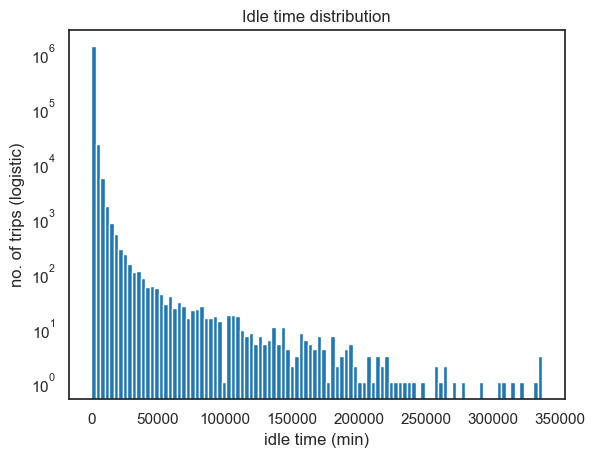

In [323]:
# plotting idle time on a histogram with logistic y-axis scale
x=san_fran_df['idle_time'].dt.total_seconds()/60.0
plt.hist(x,bins=100,log=True )
plt.xlabel('idle time (min)')
plt.ylabel('no. of trips (logistic)')
plt.title('Idle time distribution')
plt.show()

The histogram with a logistic scale shows us that there is a massive amount of short idle_times.

In [324]:
# we create a function that will show the median idle time for the values in a selected column from the san_fran_df
def calculate_median_in(column):
    unique_values = np.sort(san_fran_df[column].unique())
    for i in unique_values:
        print("The median idle time when {column} is {i}:  {median}".format(column=column, i=i, median=san_fran_df[san_fran_df[column] == i]['idle_time'].median()))  

We have chosen median before mean due to the highly imbalanced distribution of idle time, where the really large values influence the idle time heavily making it not a representable description of the values.

#### 2.3.3.1. - hour_of_day

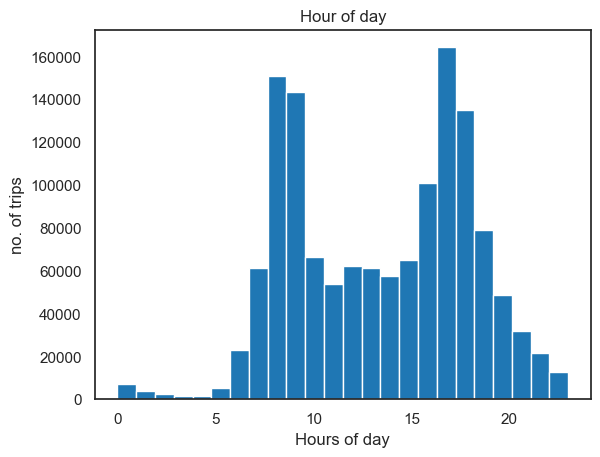

The median idle time when hour_of_day is 0:  0 days 08:14:52
The median idle time when hour_of_day is 1:  0 days 07:41:38.500000
The median idle time when hour_of_day is 2:  0 days 06:53:34
The median idle time when hour_of_day is 3:  0 days 05:12:36
The median idle time when hour_of_day is 4:  0 days 03:31:35
The median idle time when hour_of_day is 5:  0 days 02:20:29
The median idle time when hour_of_day is 6:  0 days 01:24:31
The median idle time when hour_of_day is 7:  0 days 00:53:05.500000
The median idle time when hour_of_day is 8:  0 days 00:52:27
The median idle time when hour_of_day is 9:  0 days 02:44:30
The median idle time when hour_of_day is 10:  0 days 02:45:17
The median idle time when hour_of_day is 11:  0 days 02:02:17
The median idle time when hour_of_day is 12:  0 days 02:01:12
The median idle time when hour_of_day is 13:  0 days 02:01:22
The median idle time when hour_of_day is 14:  0 days 01:46:59
The median idle time when hour_of_day is 15:  0 days 01:25:25.5000

In [325]:
x=san_fran_df['hour_of_day']
plt.hist(x, bins=24)
plt.xlabel('Hours of day')
plt.ylabel('no. of trips')
plt.title('Hour of day')
plt.show()
calculate_median_in('hour_of_day')

This histogram shows that most of the rentals are done in the morning and in the afternoon, directly corelated with transport to and from work.

The median idle times at different times of day differ strongly and some trends have emerged:
- if the bike rental has been ended in the morning hours between 6 and 8 the idle time is lower (droppping under 1 hour of idle time) due to the large probability that the bike will be rented out soon again for another trip to work. 
- the idle times are also shorter (less than 1h 20min) in the afternoon between 14 and 17 when more bikes are rented out and the probability of another rental ride is high due to higher rental traffic. 

We can also examine the weekdays and weekends separately:

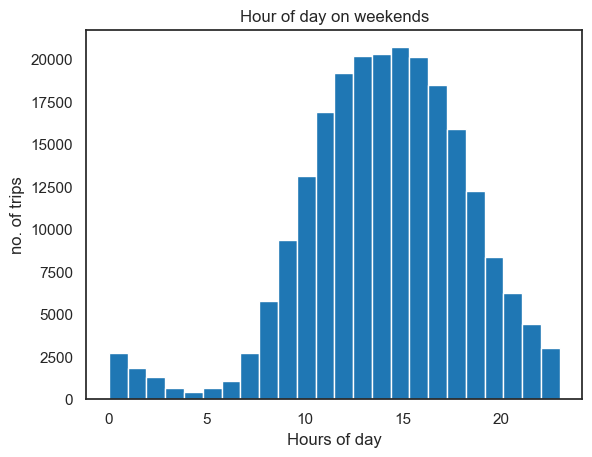

In [326]:
# amount of rentals by hour per day on weekends
x=san_fran_df[san_fran_df['Is_Weekend']==1]['hour_of_day']
plt.hist(x, bins=24)
plt.xlabel('Hours of day')
plt.ylabel('no. of trips')
plt.title('Hour of day on weekends')
plt.show()

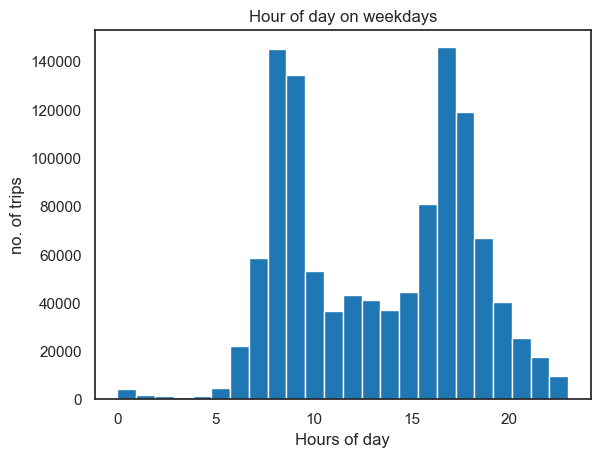

In [327]:
# amount of rentals by hour per day on weekdays
x=san_fran_df[san_fran_df['Is_Weekend']==0]['hour_of_day']
plt.hist(x, bins=24)
plt.xlabel('Hours of day')
plt.ylabel('no. of trips')
plt.title('Hour of day on weekdays')
plt.show()

We can see that the overall trend of rush hour traffic is understandably only present during the weekdays, on weekends the number of rentals grows steadily, peaking around 3 PM. 

#### 2.3.3.2. - end_time

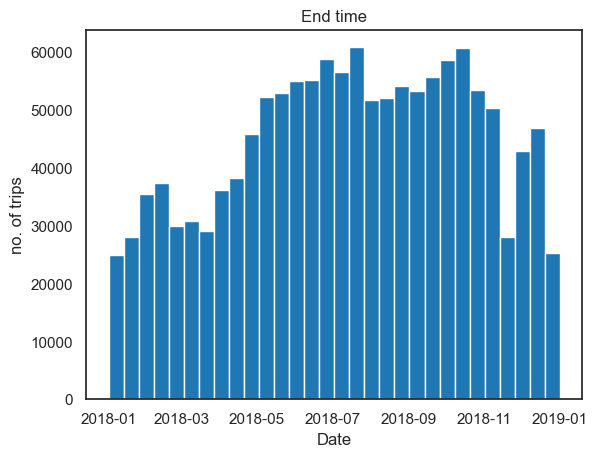

In [328]:
plt.hist(san_fran_df['end_time'], bins=30)
plt.xlabel('Date')
plt.ylabel('no. of trips')
plt.title('End time')
plt.show()

We can see that there is an increase in the usage of bikes in the summer months. We will look at the month column.

#### 2.3.3.3. - month

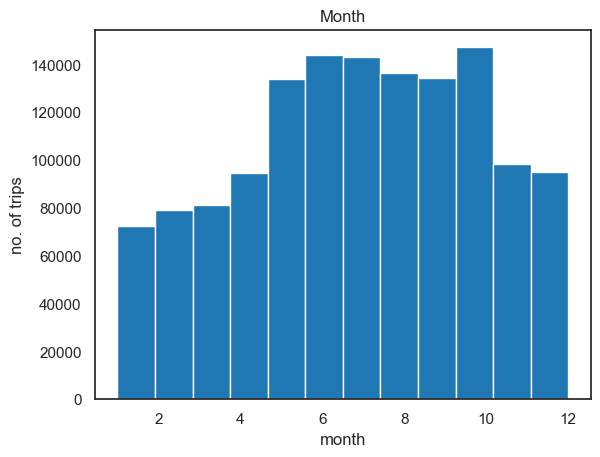

The median idle time when month is 1:  0 days 05:09:46
The median idle time when month is 2:  0 days 04:18:01
The median idle time when month is 3:  0 days 04:21:29
The median idle time when month is 4:  0 days 03:21:44.500000
The median idle time when month is 5:  0 days 01:46:21
The median idle time when month is 6:  0 days 01:27:47.500000
The median idle time when month is 7:  0 days 01:23:20
The median idle time when month is 8:  0 days 01:26:04
The median idle time when month is 9:  0 days 01:13:28
The median idle time when month is 10:  0 days 01:10:55
The median idle time when month is 11:  0 days 01:45:23
The median idle time when month is 12:  0 days 01:56:24.500000


In [329]:
plt.hist(san_fran_df['month'], bins=12)
plt.xlabel('month')
plt.ylabel('no. of trips')
plt.title('Month')
plt.show()
calculate_median_in('month')

The number of trips taken in the 2018 year shows us that the increased usage of bikes starts in May and lasts till October.

The median idle time is also significantly lower in the the warm months as can be seen above.

#### 2.3.3.4. - day

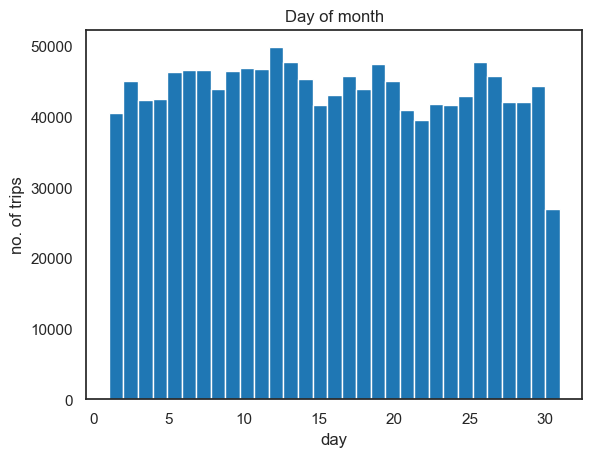

The median idle time when day is 1:  0 days 01:55:54.500000
The median idle time when day is 2:  0 days 01:57:18
The median idle time when day is 3:  0 days 01:58:57
The median idle time when day is 4:  0 days 01:58:19.500000
The median idle time when day is 5:  0 days 01:53:05
The median idle time when day is 6:  0 days 01:43:21.500000
The median idle time when day is 7:  0 days 01:47:41
The median idle time when day is 8:  0 days 01:52:49
The median idle time when day is 9:  0 days 01:56:58.500000
The median idle time when day is 10:  0 days 01:43:42
The median idle time when day is 11:  0 days 01:44:10
The median idle time when day is 12:  0 days 01:49:26
The median idle time when day is 13:  0 days 01:44:50
The median idle time when day is 14:  0 days 01:50:48
The median idle time when day is 15:  0 days 02:03:33.500000
The median idle time when day is 16:  0 days 01:59:48
The median idle time when day is 17:  0 days 01:48:33
The median idle time when day is 18:  0 days 01:45:35
Th

In [330]:
plt.hist(san_fran_df['day'], bins=31)
plt.title('Day of month')
plt.xlabel('day')
plt.ylabel('no. of trips')
plt.show()
calculate_median_in('day')

The day of the month is not a column that would have any impact on either the number of rantals or on the length of idle_time. 

#### 2.3.3.5. - station_distance

In [331]:
def round_to_nearest_025(x):
    return round(x * 4) / 4

# Apply the function to the 'station_distance' column and store the result in a new column 'distance_025'
san_fran_df['distance_025'] = san_fran_df['station_distance'].apply(round_to_nearest_025)

# Display the DataFrame to verify the new column
san_fran_df

start_time            end_time  start_station_id  start_station_lat  start_station_lon  end_station_id  end_station_lat  end_station_lon  bike_id   trip_duration       idle_time  end_temperature  end_cloud_cover end_cloud_cover_description  end_pressure  end_windspeed  end_precipitation  end_felt_temperature  Weekday  Is_Weekend  temperature_dif  temperature_dif_category  rain_start  station_distance  hour_of_day  month  day  area_label  end_station_central_station_dist  end_station_twitter_HQ_dist  end_station_ferry_building_dist  hour  distance_025
1435    2018-01-02 07:32:44 2018-01-02 07:44:36                60          37.774520        -122.409449             324        37.788300      -122.408531       17 0 days 00:11:52 0 days 01:32:38             12.0             26.0                      Cloudy       1021.65            6.0                0.0                  12.0        1           0              0.0                         3           0          1.531567            7      1    2           2                          1.753276                     1.464568                         1.400463     7          1.50
1436    2018-01-02 09:17:14 2018-01-02 09:23:41               324          37.788300        -122.408531              37        37.785000      -122.395936       17 0 days 00:06:27 0 days 19:49:39             12.0             26.0                      Cloudy       1021.31            6.0                0.0                  12.0        1           0              0.0                         3           0          1.168362            9      1    2           2                          1.075981                     2.034235                         1.022033     9          1.25
1437    2018-01-03 05:13:20 2018-01-03 05:15:55                37          37.785000        -122.395936              21        37.789625      -122.400811       17 0 days 00:02:35 0 days 07:33:35             14.0             26.0                      Cloudy       1018.60            6.0                0.0                  14.0        2           0              0.0                         3           0          0.669345            5      1    3           2                          1.617083                     1.991816                         0.752240     5          0.75
1438    2018-01-03 12:49:30 2018-01-03 13:11:05                53          37.775946        -122.437777               5        37.783899      -122.408445       17 0 days 00:21:35 0 days 03:10:19             12.0             27.0               Mostly Cloudy       1016.57            6.0                0.0                  12.0        2           0              0.0                         3           0          2.730661           13      1    3           2                          1.376076                     1.068203                         1.677306    12          2.75
1439    2018-01-03 16:21:24 2018-01-03 16:26:19                 5          37.783899        -122.408445              25        37.787522      -122.397405       17 0 days 00:04:55 0 days 00:12:10             12.0             26.0                      Cloudy       1016.57            7.0                0.0                  12.0        2           0             -1.0                         2           0          1.052319           16      1    3           2                          1.350970                     2.067894                         0.778864    16          1.00
...                     ...                 ...               ...                ...                ...             ...              ...              ...      ...             ...             ...              ...              ...                         ...           ...            ...                ...                   ...      ...         ...              ...                       ...         ...               ...          ...    ...  ...         ...                               ...                          ...                              ...   ...           ...

The median idle time when distance_025 is 0.0:  0 days 01:36:31.500000
The median idle time when distance_025 is 0.25:  0 days 01:57:44.500000
The median idle time when distance_025 is 0.5:  0 days 02:05:13.500000
The median idle time when distance_025 is 0.75:  0 days 01:57:14
The median idle time when distance_025 is 1.0:  0 days 01:56:36
The median idle time when distance_025 is 1.25:  0 days 01:48:10
The median idle time when distance_025 is 1.5:  0 days 01:36:47
The median idle time when distance_025 is 1.75:  0 days 01:41:15
The median idle time when distance_025 is 2.0:  0 days 01:37:12
The median idle time when distance_025 is 2.25:  0 days 01:39:02
The median idle time when distance_025 is 2.5:  0 days 02:01:08
The median idle time when distance_025 is 2.75:  0 days 02:02:26
The median idle time when distance_025 is 3.0:  0 days 02:10:04.500000
The median idle time when distance_025 is 3.25:  0 days 02:00:10.500000
The median idle time when distance_025 is 3.5:  0 days 02:10:3

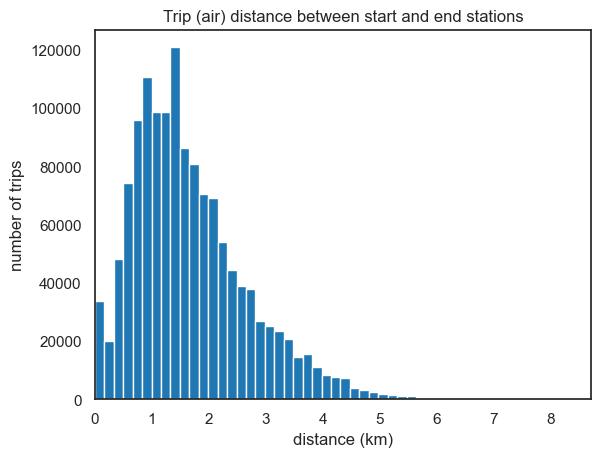

In [332]:
x = san_fran_df['station_distance']
plt.hist(x, bins=50)
plt.xlim(left=0)  # Set the lower and upper limits for the x-axis
plt.title('Trip (air) distance between start and end stations')
plt.xlabel('distance (km)')
plt.ylabel('number of trips')
calculate_median_in('distance_025')
print('The average trip length:', san_fran_df['station_distance'].mean())

We do not see any emerging patterns between idle time and station distance.

#### 2.3.3.6. - Weekday

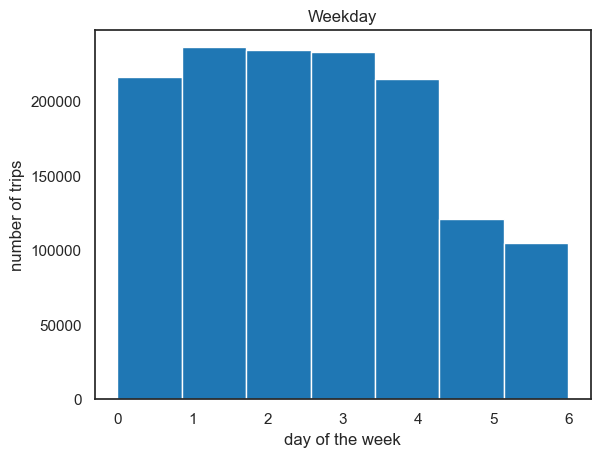

The median idle time when Weekday is 0:  0 days 01:37:46
The median idle time when Weekday is 1:  0 days 01:37:42
The median idle time when Weekday is 2:  0 days 01:36:43
The median idle time when Weekday is 3:  0 days 01:39:28
The median idle time when Weekday is 4:  0 days 01:47:47
The median idle time when Weekday is 5:  0 days 02:50:27
The median idle time when Weekday is 6:  0 days 03:12:39


In [333]:
x=san_fran_df['Weekday']
plt.hist(x, bins=7)
plt.title('Weekday')
plt.xlabel('day of the week')
plt.ylabel('number of trips')
plt.show()
calculate_median_in('Weekday')

The histogram shows us that less trips are made on the weekends.

On weekends there also is a higher idle_time, aproximately 2 times larger than during the working week.

#### 2.3.3.7. - Is_Weekend

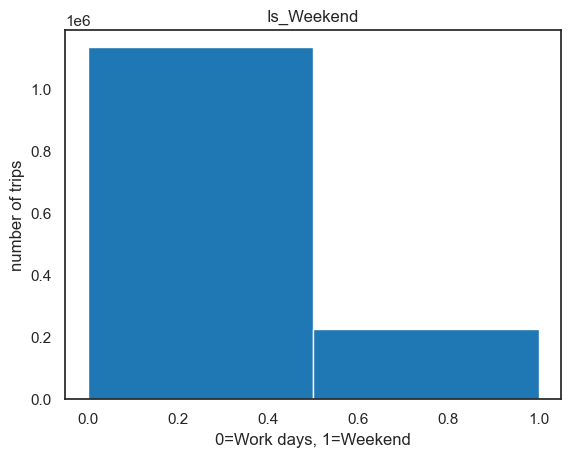

The median idle time when Is_Weekend is 0:  0 days 01:39:49
The median idle time when Is_Weekend is 1:  0 days 02:59:48


In [334]:
plt.hist(san_fran_df['Is_Weekend'], bins=2)
plt.title('Is_Weekend')
plt.xlabel('0=Work days, 1=Weekend')
plt.ylabel('number of trips')
plt.show()
calculate_median_in('Is_Weekend')

#### 2.3.3.8. - end_station_central_station_dist

In [335]:
san_fran_df['distance_central_station_025'] = san_fran_df['end_station_central_station_dist'].apply(round_to_nearest_025)

The median idle time when distance_central_station_025 is 0.0:  0 days 01:37:31
The median idle time when distance_central_station_025 is 0.25:  0 days 01:01:02
The median idle time when distance_central_station_025 is 0.5:  0 days 02:02:01
The median idle time when distance_central_station_025 is 0.75:  0 days 02:02:47.500000
The median idle time when distance_central_station_025 is 1.0:  0 days 03:24:35
The median idle time when distance_central_station_025 is 1.25:  0 days 02:20:07
The median idle time when distance_central_station_025 is 1.5:  0 days 01:24:23
The median idle time when distance_central_station_025 is 1.75:  0 days 01:14:55
The median idle time when distance_central_station_025 is 2.0:  0 days 01:13:40
The median idle time when distance_central_station_025 is 2.25:  0 days 02:09:41
The median idle time when distance_central_station_025 is 2.5:  0 days 03:42:13
The median idle time when distance_central_station_025 is 2.75:  0 days 03:10:00.500000
The median idle time

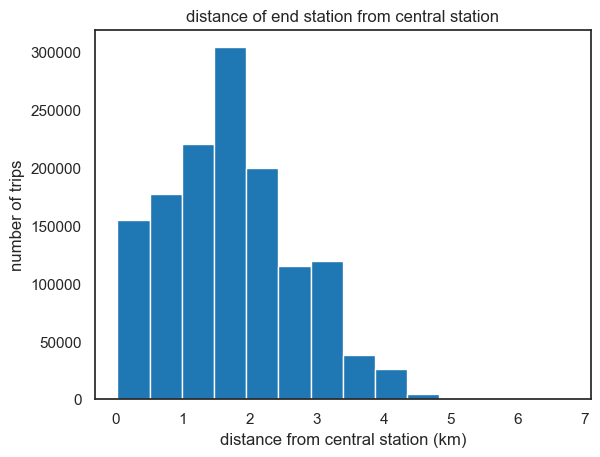

In [336]:
#check the distribution of the start_station_central_station_dist
x= san_fran_df['end_station_central_station_dist']
y= san_fran_df['idle_time'].dt.total_seconds() / 60.0
plt.hist(x, bins=14)
plt.title('distance of end station from central station')
plt.xlabel('distance from central station (km)')
plt.ylabel('number of trips')
calculate_median_in('distance_central_station_025')

There does not seem to be a big connection between the idle time and the distance from the King street cental station.

#### 2.3.3.8. - end_station_ferry_building_dist

In [337]:
san_fran_df['distance_ferry_building_025'] = san_fran_df['end_station_ferry_building_dist'].apply(round_to_nearest_025)

The median idle time when distance_ferry_building_025 is 0.0:  0 days 00:41:07
The median idle time when distance_ferry_building_025 is 0.25:  0 days 00:57:03
The median idle time when distance_ferry_building_025 is 0.5:  0 days 01:33:13.500000
The median idle time when distance_ferry_building_025 is 0.75:  0 days 01:50:40
The median idle time when distance_ferry_building_025 is 1.0:  0 days 02:50:46
The median idle time when distance_ferry_building_025 is 1.25:  0 days 02:00:19
The median idle time when distance_ferry_building_025 is 1.5:  0 days 01:40:02
The median idle time when distance_ferry_building_025 is 1.75:  0 days 01:29:28
The median idle time when distance_ferry_building_025 is 2.0:  0 days 01:13:16
The median idle time when distance_ferry_building_025 is 2.25:  0 days 03:56:54
The median idle time when distance_ferry_building_025 is 2.5:  0 days 01:38:53
The median idle time when distance_ferry_building_025 is 2.75:  0 days 01:09:04
The median idle time when distance_ferr

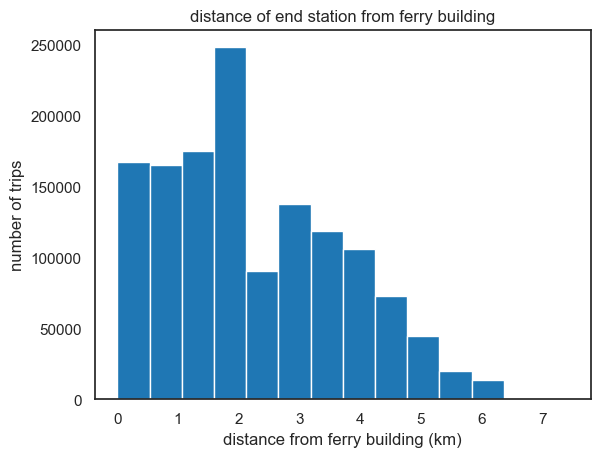

In [338]:
#check the distribution of the start_station_central_station_dist
x= san_fran_df['end_station_ferry_building_dist']
y= san_fran_df['idle_time'].dt.total_seconds() / 60.0
plt.hist(x, bins=14)
plt.title('distance of end station from ferry building')
plt.xlabel('distance from ferry building (km)')
plt.ylabel('number of trips')
calculate_median_in('distance_ferry_building_025')

There does not seem to be a big connection between the idle time and the distance from the Ferry building.

#### 2.3.3.9. - end_station_twitter_HQ_dist

In [339]:
san_fran_df['distance_twitter_025'] = san_fran_df['end_station_twitter_HQ_dist'].apply(round_to_nearest_025)

The median idle time when distance_twitter_025 is 0.0:  0 days 00:30:29
The median idle time when distance_twitter_025 is 0.25:  0 days 01:30:06
The median idle time when distance_twitter_025 is 0.5:  0 days 01:41:53
The median idle time when distance_twitter_025 is 0.75:  0 days 02:29:36
The median idle time when distance_twitter_025 is 1.0:  0 days 01:57:53
The median idle time when distance_twitter_025 is 1.25:  0 days 02:31:45.500000
The median idle time when distance_twitter_025 is 1.5:  0 days 02:22:14
The median idle time when distance_twitter_025 is 1.75:  0 days 01:56:10
The median idle time when distance_twitter_025 is 2.0:  0 days 01:52:45
The median idle time when distance_twitter_025 is 2.25:  0 days 02:36:10
The median idle time when distance_twitter_025 is 2.5:  0 days 01:18:37
The median idle time when distance_twitter_025 is 2.75:  0 days 01:19:18
The median idle time when distance_twitter_025 is 3.0:  0 days 03:48:29
The median idle time when distance_twitter_025 is 3

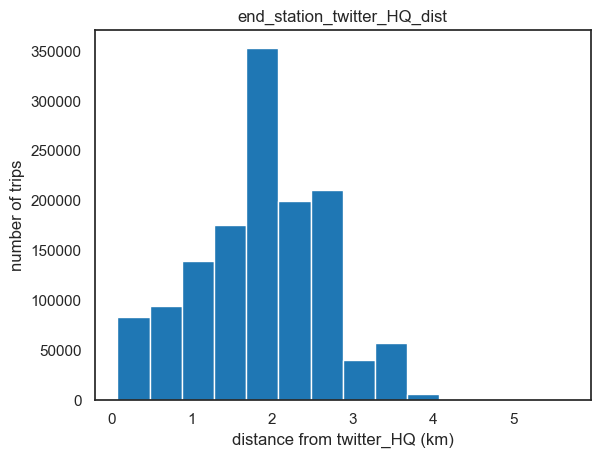

In [340]:
x= san_fran_df['end_station_twitter_HQ_dist']
plt.hist(x, bins=14)
plt.title('end_station_twitter_HQ_dist')
plt.xlabel('distance from twitter_HQ (km)')
plt.ylabel('number of trips')
calculate_median_in('distance_twitter_025')

There does not seem to be a big connection between the idle time and the distance from the Twitter building.

#### 2.3.3.9. - end_felt_temperature

The median idle time when end_felt_temperature is 1.0:  0 days 04:15:27
The median idle time when end_felt_temperature is 2.0:  0 days 04:14:48.500000
The median idle time when end_felt_temperature is 3.0:  0 days 03:49:34
The median idle time when end_felt_temperature is 4.0:  0 days 03:53:00.500000
The median idle time when end_felt_temperature is 5.0:  0 days 03:36:38
The median idle time when end_felt_temperature is 6.0:  0 days 03:36:20
The median idle time when end_felt_temperature is 7.0:  0 days 03:07:16
The median idle time when end_felt_temperature is 8.0:  0 days 02:38:21
The median idle time when end_felt_temperature is 9.0:  0 days 02:14:05
The median idle time when end_felt_temperature is 10.0:  0 days 02:13:53
The median idle time when end_felt_temperature is 11.0:  0 days 02:27:27
The median idle time when end_felt_temperature is 12.0:  0 days 02:00:35
The median idle time when end_felt_temperature is 13.0:  0 days 01:34:29
The median idle time when end_felt_temperature

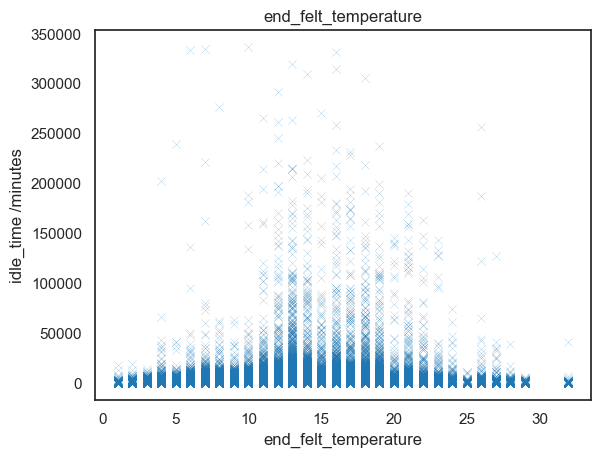

In [341]:
#plotting the end_felt_temperature and idle_time to examine the values
x= san_fran_df['end_felt_temperature']
y_1= san_fran_df['idle_time'].dt.total_seconds() / 60.0
fig,ax = plt.subplots()
ax.scatter(x,y_1, marker='x', linewidths=0.1)
ax.set_title('end_felt_temperature')
ax.set_xlabel('end_felt_temperature')
ax.set_ylabel('idle_time /minutes')
calculate_median_in('end_felt_temperature')

Although this scatter plot visually shows that there apears to be longer idle times when the temperatures are between 10 and 20 degrees Celsius, the reality is more reasonable and shows that the idle times are the shortest during the 10 to 20 degrees Celsius window.

Extremely long idle times in the 10 to 20 degrees Celsius window are rare and could be due to the customers making longer trips to the outskirts to stations that are used scarcely or just due to the higher probability that the bike will break down/get lost/get stolen, which leads to the bikes not beeing used and racking up long amounts of idle time, such as 200+ days in extreme situations. 

We check the distribution of the end_felt_temperature.

Text(0, 0.5, 'number of trips')

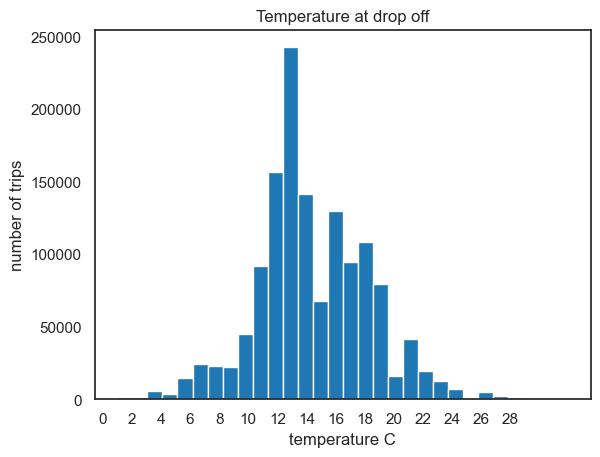

In [342]:
#check the distribution of the end_felt_temperature
x= san_fran_df['end_felt_temperature']
plt.hist(x, bins=30)
plt.xticks(np.arange(0,30,2))
plt.title('Temperature at drop off')
plt.xlabel('temperature C')
plt.ylabel('number of trips')

This shows that in the same temperature window 10-20 Celsius the number of trips made are also the largest.

In [343]:
# have a look at the values of the end_felt_temperature column
san_fran_df['end_felt_temperature'].describe()

count    1.359874e+06
mean     1.446882e+01
std      3.765577e+00
min      1.000000e+00
25%      1.200000e+01
50%      1.400000e+01
75%      1.700000e+01
max      3.200000e+01
Name: end_felt_temperature, dtype: float64

The average felt temperature is 14.4 degrees and the majority (more than half) of the values is in the (10, 14) interval, more than 75% of the all trips have been made in the  (10, 17) temperature interval.

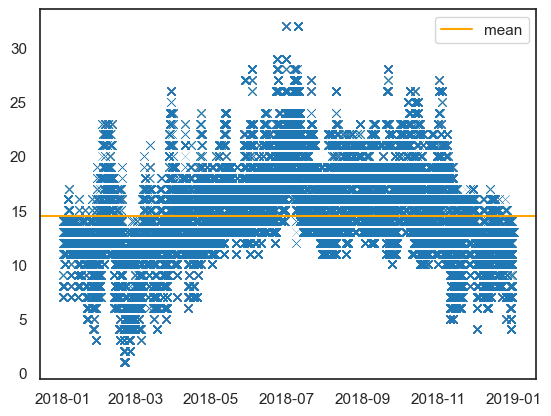

In [344]:
#look at the relation between end_time and end_felt_temperature
x_temperature=san_fran_df['end_felt_temperature']
x_time=san_fran_df['end_time']
plt.scatter(x_time,x_temperature,  marker='x', linewidths=0.1)
plt.axhline(14.44, color='orange', label='mean')
plt.legend()
plt.show()

This scatter plot shows us data goes hand in hand with the end_time trips distribution, more trips from May till October are made due to the warmer weather.

We can also have a look if the duration of trips is longer during the warmer weather:

Text(0, 0.5, 'trip_duration (min)')

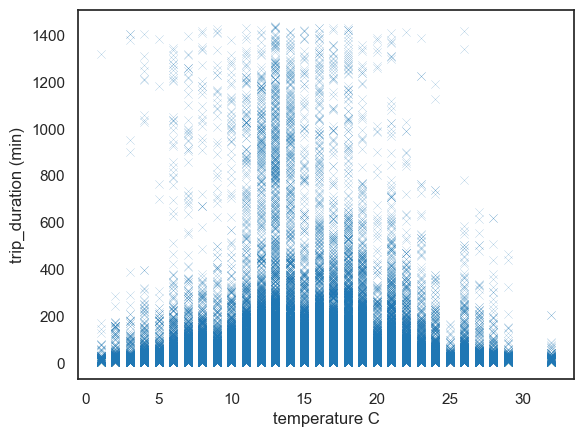

In [345]:
# we now have a look at the relationship between trip_duration and end_felt_temperature
y = san_fran_df['trip_duration'].dt.total_seconds()/60.0
x = san_fran_df['end_felt_temperature']

plt.scatter(x,y, marker='x', linewidths=0.1)
plt.xlabel('temperature C')
plt.ylabel('trip_duration (min)')


We can indeed observe that longer trips are taken during the warmer weather.

#### 2.3.3.10. - temperature_dif 

The median idle time when temperature_dif is -16.0:  0 days 01:00:14.500000
The median idle time when temperature_dif is -15.0:  0 days 17:34:49
The median idle time when temperature_dif is -14.0:  0 days 00:07:32
The median idle time when temperature_dif is -13.0:  0 days 13:06:22
The median idle time when temperature_dif is -12.0:  0 days 15:39:57.500000
The median idle time when temperature_dif is -11.0:  0 days 11:31:26
The median idle time when temperature_dif is -10.0:  0 days 01:01:36
The median idle time when temperature_dif is -9.0:  0 days 12:51:09.500000
The median idle time when temperature_dif is -8.0:  0 days 09:15:16
The median idle time when temperature_dif is -7.0:  0 days 08:27:38
The median idle time when temperature_dif is -6.0:  0 days 10:26:49
The median idle time when temperature_dif is -5.0:  0 days 03:28:45
The median idle time when temperature_dif is -4.0:  0 days 03:22:49
The median idle time when temperature_dif is -3.0:  0 days 01:59:03
The median idle time

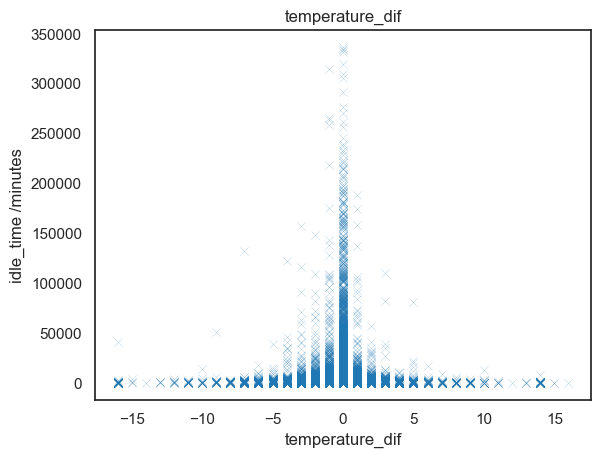

In [346]:
# plotting the temperature_dif and idle_time to examine the values
x= san_fran_df['temperature_dif']
y_1= san_fran_df['idle_time'].dt.total_seconds() / 60.0
fig,ax = plt.subplots()
ax.scatter(x,y_1, marker='x', linewidths=0.1)
ax.set_title('temperature_dif')
ax.set_xlabel('temperature_dif')
ax.set_ylabel('idle_time /minutes')
calculate_median_in('temperature_dif')

As we can see from the median idle time for each temperature difference, lower temperature differences between when the bike was picked up and dropped off are associated with lower idle times. There may be several factors contributing to this. For example, riders may prefer to ride bikes on more stable weather (lower temperature differences between bike pick-up and drop-off) which leads to increased bike usage and thus higher frequency in rentals and lower idle times. Another reason is that there is lower temperature difference on shorter rides, a day with increased number of shorter rides will have a higher frequency of pick-ups and drop-offs, leading to lower idle times.

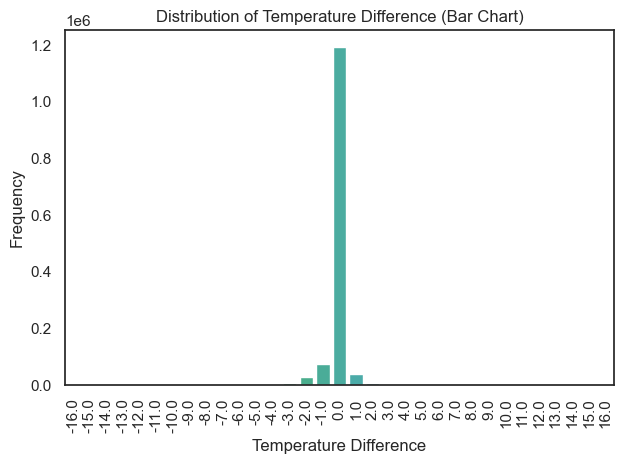

In [347]:
# let's check the distribution of the temperature_dif column
temperature_dif_counts = san_fran_df["temperature_dif"].value_counts()
sns.barplot(x=temperature_dif_counts.index, y=temperature_dif_counts.values)
plt.xlabel("Temperature Difference")
plt.ylabel("Frequency")
plt.title("Distribution of Temperature Difference (Bar Chart)")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

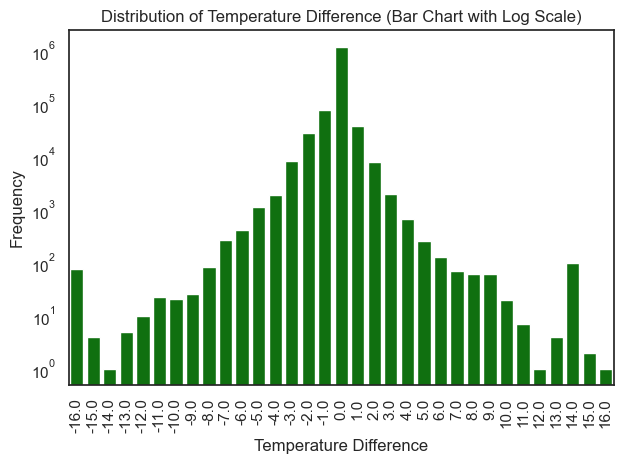

In [348]:
# let's check the log distribution instead, as most records are of lower temperature_dif
sns.barplot(x=temperature_dif_counts.index, y=temperature_dif_counts.values, color='green')
plt.xlabel("Temperature Difference")
plt.ylabel("Frequency")
plt.title("Distribution of Temperature Difference (Bar Chart with Log Scale)")
plt.xticks(rotation=90)
plt.yscale("log")
plt.tight_layout()
plt.show()

We can see that our dataset has mostly low temperature differences between pick-up and drop-off. However the log-scale distribution is not a normal distribution. We have a larger frequency of rides with extremely low or high temperature differences than expected.

#### 2.3.3.11. - temperature_dif__category

The median idle time when temperature_dif_category is 0:  0 days 02:01:01
The median idle time when temperature_dif_category is 1:  0 days 10:20:38.500000
The median idle time when temperature_dif_category is 2:  0 days 01:50:48
The median idle time when temperature_dif_category is 3:  0 days 01:49:39
The median idle time when temperature_dif_category is 4:  0 days 02:41:44
The median idle time when temperature_dif_category is 5:  0 days 02:46:33
The median idle time when temperature_dif_category is 6:  0 days 00:54:31


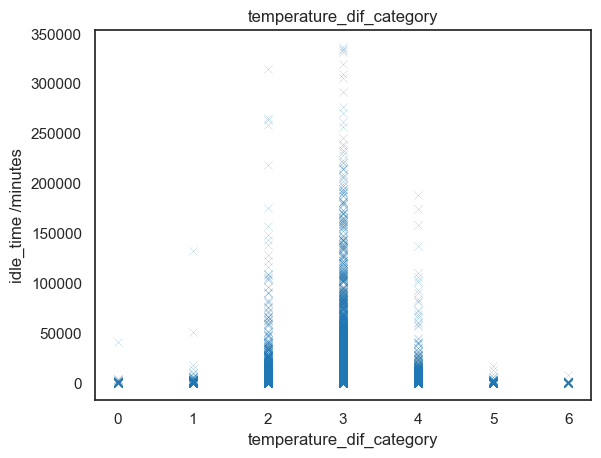

In [349]:
# plotting the temperature_dif_category and idle_time to examine the values
x= san_fran_df['temperature_dif_category']
y_1= san_fran_df['idle_time'].dt.total_seconds() / 60.0
fig,ax = plt.subplots()
ax.scatter(x,y_1, marker='x', linewidths=0.1)
ax.set_title('temperature_dif_category')
ax.set_xlabel('temperature_dif_category')
ax.set_ylabel('idle_time /minutes')
calculate_median_in('temperature_dif_category')

In [350]:
temperature_dif_counts = san_fran_df["temperature_dif_category"].value_counts()

total_data_points = temperature_dif_counts.sum()

relative_frequency = temperature_dif_counts / total_data_points

distribution_table = pd.DataFrame({'Frequency': temperature_dif_counts, 'Relative Frequency': relative_frequency})

distribution_table.index.name = 'Temperature Difference Category'

distribution_table

Frequency  Relative Frequency
Temperature Difference Category                               
3                                  1192443            0.876878
2                                   116492            0.085664
4                                    49539            0.036429
1                                      822            0.000604
5                                      343            0.000252
0                                      119            0.000088
6                                      116            0.000085

There does not seem to be a strong connection between the temperature_dif_category and the idle_time. The majority of records in our dataset have a temperature category of 3, meaning no temperature difference between time of pick-up and drop-off. The median idle time with a category of 1 is much greater than that of other categories. However, one must take into account that higher temperature differences (categories 0,1,5,6) are highly under-represented in our data with less than 0.1% representation of each of the moderate to high temperature difference categories.

#### 2.3.3.12. - rain_start

In [351]:
#converting both rain_start and idle_time to numeric and finding the linear correlation between both variables
df_copy = san_fran_df.copy()

df_copy["rain_start"] = df_copy["rain_start"].astype(int)
df_copy["idle_time_seconds"] = df_copy["idle_time"].dt.total_seconds()

correlation = df_copy["rain_start"].corr(df_copy["idle_time_seconds"], method="pearson")

print("Correlation coefficient:", correlation)

Correlation coefficient: 0.0027114701435582097


The correlation between the rain_start and idle_time variable is nearly 0, indicating no linear relationship between the two variables meaning that it seems that whether or not it starts raining during the bike rental has no influence on the iddle time. However, this correlation only correlation measures only linear relationships, there might be other type of non-linear relationship between the variables.

# 3. - Predictive analytics

## 3.1. - Reducing the biased variability of our dataset
We will investigate if reducing the sample to the rows that have an idle_time that is the result of normal usage is possible.

In [352]:
# dropping  columns that are insignificant
san_fran_df = san_fran_df.drop(['area_label', 'end_cloud_cover_description'],axis=1 )

# converting datetime and timedelta into numbers to support all models 
san_fran_df['trip_duration'] = san_fran_df['trip_duration'].dt.total_seconds().astype(int)

# define a reference date
reference_date = pd.to_datetime('1970-01-01')

# convert 'start_time' column to float (seconds since the reference date)
san_fran_df['start_time'] = (san_fran_df['start_time'] - reference_date) / pd.Timedelta(seconds=1)

# convert 'end_time' column to float (seconds since the reference date)
san_fran_df['end_time'] = (san_fran_df['end_time'] - reference_date) / pd.Timedelta(seconds=1)


In [353]:
san_fran_df['idle_time'].describe()

count                      1359874
mean     0 days 09:26:30.192548721
std      1 days 22:13:22.269105151
min                0 days 00:00:03
25%                0 days 00:23:28
50%                0 days 01:51:13
75%                0 days 09:47:52
max              233 days 22:43:15
Name: idle_time, dtype: object

In [354]:
# display the number of rows where idle_time is lower than 1 week (10080minutes)
reduced_san_fran_df_week = san_fran_df[san_fran_df['idle_time'].dt.total_seconds()/60.0 <= 10080 ]
reduced_san_fran_df_week['idle_time'].describe()

count                      1355243
mean     0 days 07:51:06.013802690
std      0 days 15:11:36.142053605
min                0 days 00:00:03
25%                0 days 00:23:20
50%                0 days 01:50:03
75%         0 days 09:39:02.500000
max                6 days 23:59:58
Name: idle_time, dtype: object

In [355]:
data = reduced_san_fran_df_week['idle_time']
mean_raw = data.mean()
mean = data.mean().total_seconds() / 60.0
reduced_centered_idle_time_week = data.dt.total_seconds() / 60.0 - mean
print("mean in timedelata dtype:",mean_raw)
print("mean in minutes:",mean)

mean in timedelata dtype: 0 days 07:51:06.013802690
mean in minutes: 471.10023003333333


We can see that the distribution is still uneven, more than 75% of all records have an idle_time lower than 10 hours. 

Only 4514 rows out of 1359347 total records have an idle_time longer than 1 week.

We will further reduce the dataset to just idle_times less or equal to one day.

In [356]:
#display the number of rows where idle_time is lower than 24 hours (1440minutes)
reduced_san_fran_df_day = san_fran_df[san_fran_df['idle_time'].dt.total_seconds()/60.0 <= 1440 ]
reduced_san_fran_df_day['idle_time'].describe()

count                      1259226
mean     0 days 04:35:02.745148210
std      0 days 05:58:26.722709925
min                0 days 00:00:03
25%                0 days 00:20:35
50%                0 days 01:28:15
75%                0 days 07:26:57
max                1 days 00:00:00
Name: idle_time, dtype: object

In [357]:
data = reduced_san_fran_df_day['idle_time']
mean_raw = data.mean()
mean_day = data.mean().total_seconds() / 60.0
reduced_centered_idle_time_day = data.dt.total_seconds() / 60.0 - mean_day

This shows that only 100000 rows out of 1359874 records (aproximately 7,36%) have an idle_time longer then 1 day.

Our goal is to focus on reliably predicting the idle_time of bikes on a daily basis to support operation managers when to schedule maintenance of bikes or moving them between stations. 

Due to the large range of times, it would be very unlikely to have a model which could be trained to estimate the idle time with acceptable accuracy.

Therefore we will drop the rows where the idle_time is longer than one day under the assumption that much longer idle_times of bikes are consequences of 'force majeure', that is when an extraordinary event or circumstance occurs(such as lost/stolen/broken bike).

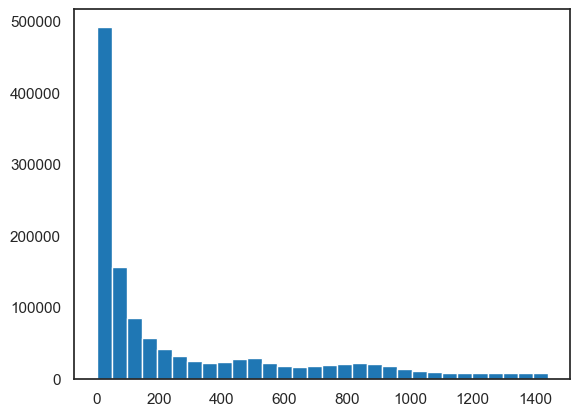

In [358]:
plt.hist(reduced_san_fran_df_day['idle_time'].dt.total_seconds()/60.0, bins=30)
plt.show()

The distribution is still highly uneven, we reduce to max 12 hours.

In [359]:
#display the number of rows where idle_time is lower than 12 hours (720minutes)
reduced_san_fran_df_12hours = san_fran_df[san_fran_df['idle_time'].dt.total_seconds()/60.0 <= 720 ]
reduced_san_fran_df_12hours['idle_time'].describe()

count                      1068057
mean     0 days 02:25:56.407571880
std      0 days 03:05:38.205627257
min                0 days 00:00:03
25%                0 days 00:15:50
50%                0 days 00:58:02
75%                0 days 03:22:57
max                0 days 12:00:00
Name: idle_time, dtype: object

In [360]:
data = reduced_san_fran_df_12hours['idle_time']
mean_raw = data.mean()
mean_12hours = data.mean().total_seconds() / 60.0
reduced_centered_idle_time_12hours = data.dt.total_seconds() / 60.0 - mean_12hours
median_raw = data.median()
median_12hours = median_raw.total_seconds()/60.0
reduced_centered_median_idle_time_12hours = data.dt.total_seconds() / 60.0 - median_12hours

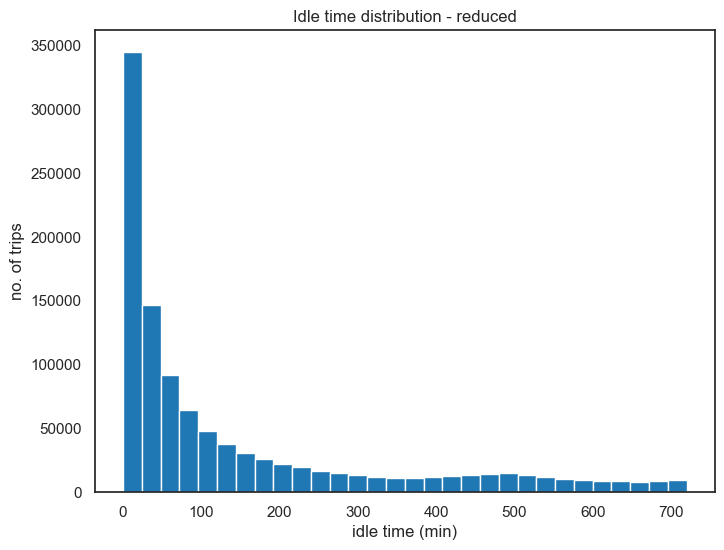

In [361]:
plt.figure(figsize=(8,6))
plt.hist(reduced_san_fran_df_12hours['idle_time'].dt.total_seconds()/60.0, bins=30, )
plt.xlabel('idle time (min)')
plt.ylabel('no. of trips')
plt.title('Idle time distribution - reduced')

plt.savefig('idle time reduced', dpi=300)
plt.show()
plt.show()

In [362]:
reduced_san_fran_df_12hours.groupby('hour_of_day')['idle_time'].median()

hour_of_day
0    0 days 07:24:29.500000
1           0 days 06:38:23
2           0 days 05:51:32
3           0 days 04:31:32
4           0 days 03:11:40
5           0 days 02:08:16
6           0 days 01:17:51
7           0 days 00:47:00
8           0 days 00:40:53
9           0 days 01:55:46
10          0 days 02:00:46
11          0 days 01:26:56
12   0 days 01:24:11.500000
13          0 days 01:25:00
14   0 days 01:12:42.500000
15          0 days 00:55:36
16          0 days 00:38:22
17          0 days 00:25:15
18          0 days 00:27:41
19          0 days 00:48:18
20   0 days 01:45:49.500000
21          0 days 08:48:48
22          0 days 08:41:33
23          0 days 08:02:18
Name: idle_time, dtype: timedelta64[ns]

We can see that the dataset reduced to max 12 hours of idle time still follows the same trends as the original san_fran_df, with short idle times in the mornings and afternoons and much longer idle times for bikes which trips were ended during the night.

## 3.1. - Feature selection using SelectKBest 
The SelectKBest class from sklearn-learn library is a feature selection technique, it operates based on statistical tests to score and rank the features based on their importance or relevance to the target variable.

We will use the the f_regression as the score function:

The **f_regression** is derived from the **r_regression**, which uses the Pearsons's r or also called the Pearson's correlation coefficient for performing F-test on selected features. **f_regression** is a scoring function used in feature selection procedure. It can be used for manualy single feature evaluations or used in `sklearn's` `SelectKBest` class. The computed cross_correlation between regressor and target is then converted to an 
*F score* and then to a *p-value*.

The *F score* is computed from the *R^2*. Bigger *R^2* values lead to higher values of *F* -> the higher the *F score* is the better.

In [ ]:
# we define a function that can be used for individual feature significance evaluation to the idle time
from sklearn.feature_selection import f_regression
def feature_selection(f):
    """ 
    Uses Pearson's correlation coefficient via f_regression
    f = feature that is examined
    """
    X = san_fran_df[f].values.reshape(-1,1)
    y = san_fran_df['idle_time'].dt.total_seconds() / 60.0
    # Apply f_regression
    f_scores, p_values = f_regression(X, y)
    # Print results
    print("F-scores:", f_scores)
    print("p-values:", p_values)
    

We use the SelectKBest class for determining the feature importance based on the F-score:

In [ ]:
#try to choose the best feature for predicting of idle_time by using the selectKBest class from sklearn
from sklearn.feature_selection import SelectKBest
x = reduced_san_fran_df_12hours[['trip_duration','bike_id', 'start_time', 'end_time','end_station_id', 'end_temperature',
                 'day', 'end_cloud_cover',
                 'month', 'end_pressure', 'end_windspeed', 
                 'end_precipitation', 'end_felt_temperature', 'Weekday', 'Is_Weekend',
                 'temperature_dif','rain_start', 'station_distance', 'end_station_central_station_dist',
                 'end_station_ferry_building_dist', 'end_station_twitter_HQ_dist', 'hour_of_day', 'end_station_lat', 'end_station_lon']]
y = reduced_san_fran_df_12hours['idle_time'].dt.total_seconds()/60.0
print("Feature data dimension:", x.shape)
select = SelectKBest(score_func=f_regression, k=10)
x_selected = select.fit_transform(x,y)
print("After selecting best 10 features:", x_selected.shape) 

In [ ]:
selected_indices = select.get_support(indices=True)

# get the names of the selected features
selected_features = [x.columns[idx] for idx in selected_indices]
selected_values = pd.DataFrame(x_selected, columns=selected_features)
selected_scores = select.scores_[selected_indices]
selected_feature_scores = pd.DataFrame({"Feature": selected_features, "Score": selected_scores})
print("Selected features with scores:")
print(selected_feature_scores)


The SelectKBest class form sklearn showed us the 10 features that should have the highest influence on idle time. 



## 3.2. - Building prediction models

In [96]:
# importing all relevant libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import PredictionErrorDisplay
from sklearn.utils import resample
from xgboost import XGBRegressor
import xgboost as xgb
from sklearn.feature_selection import RFECV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from tabulate import tabulate

### 3.2.1. - Linear regression
We will perform Linear regression with the features select by SelectKBest class.

Coefficients: [ 7.92468551e+00  1.85060956e+00  1.46205381e+01  5.27334713e-02
 -1.72693769e+00 -2.01098109e+00  2.72413587e+02 -3.86384365e-07
  5.27334712e-02 -1.64173527e-02]
Intercept: -9525.729538885826
Mean Absolute Error: 141.85953980912146 minutes
Root Mean Squared Error: 182.60235070232252 minutes
Coefficient of determination: 0.03407153845865041
Mean of idle time: 145.94012618333332


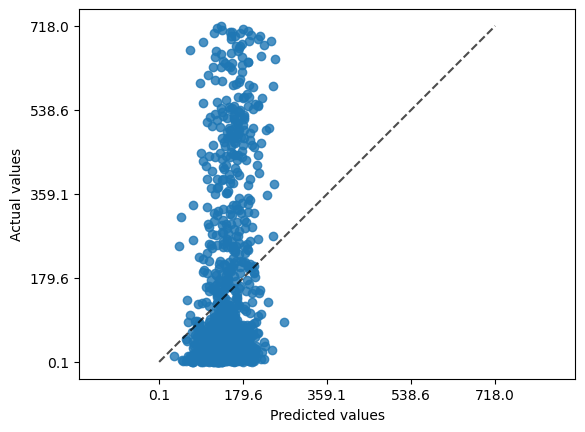

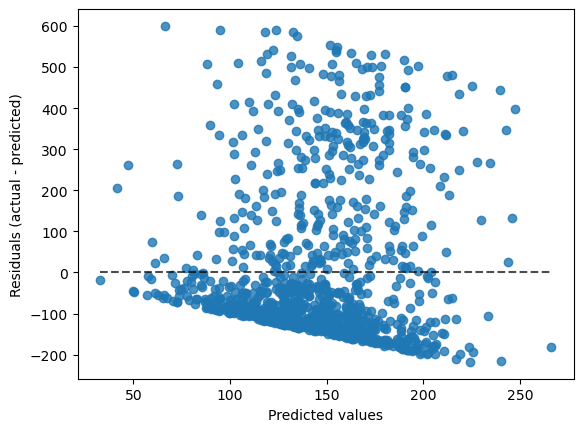

In [99]:
X = reduced_san_fran_df_12hours[['end_station_ferry_building_dist', 'end_windspeed', 'temperature_dif',
                                  'end_station_id', 'month', 'hour_of_day', 'end_station_lat',
                                  'end_time', 'end_station_id', 'bike_id']]
y = reduced_san_fran_df_12hours['idle_time'].dt.total_seconds()/60.0
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.4, random_state=8)
lr = LinearRegression()
lr.fit(X_train, y_train)
y_predicted = lr.predict(X_valid)
print("Coefficients:", lr.coef_)
print("Intercept:", lr.intercept_)
print("Mean Absolute Error:",mean_absolute_error(y_valid, y_predicted),"minutes")
print("Root Mean Squared Error:",mean_squared_error(y_valid, y_predicted)**0.5,"minutes")
print("Coefficient of determination:",r2_score(y_valid, y_predicted)) 
print("Mean of idle time:", mean_12hours)
display = PredictionErrorDisplay.from_predictions(y_true=y_valid, y_pred=y_predicted, kind='actual_vs_predicted', subsample=1000)
display.plot()
plt.show()

The Linear Regrresion model shows us that it does not predict longer idle_times well with R^2 score only 3.4%. It predicts only very short values of idle_time.
 
It is the best result out of numerous combinations of input features that we have tried.

We have concluded that the linear regression model is not suitable for our case.

### 3.2.2. -  XGBoost
We will make use of the XGBoost regressor for predicting idle_time based on the records that have the maximum idle_time of 12 hours.

The **XGBoost (eXtreme Gradient Boosting) regressor** is a very commonly used machine learning algortithms and is suitable for training on large datasets. It relies on gradient boosting and is an ensemble learning technique that combines the predictions of multiple weak learners (typically decision trees) to create a strong predictive model. It builds trees sequentially, with each tree correcting the errors of its predecessor.

Due to its strong predictive performance and ability to handle complex relationships in the data, XGBoost Regressor has become a popular choice in various machine learning competitions and real-world applications

Without resampling:

In [100]:
X = reduced_san_fran_df_12hours[['bike_id','end_station_ferry_building_dist', 'end_windspeed', 'temperature_dif',
                                 'end_temperature', 'end_station_id', 'month', 'hour_of_day', 'end_station_lat', 'end_station_lon']]
y = reduced_san_fran_df_12hours['idle_time'].dt.total_seconds()/60.0

In [101]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.4, random_state=9)

In [102]:
gradientboostingml_12hours = XGBRegressor()

In [103]:
gradientboostingml_12hours.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

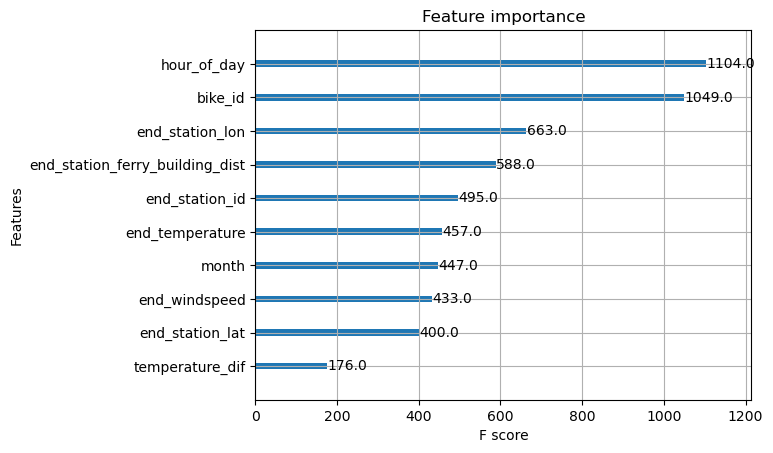

In [104]:
xgb.plot_importance(gradientboostingml_12hours, ax=plt.gca())
plt.show()

In [105]:
y_predicted = gradientboostingml_12hours.predict(X_valid)

Mean Absolute Error: 103.50344721471315 minutes
Root Mean Squared Error: 146.07430755558195 minutes
Coefficient of determination: 0.37798976774051574
Mean of idle time: 145.94012618333332


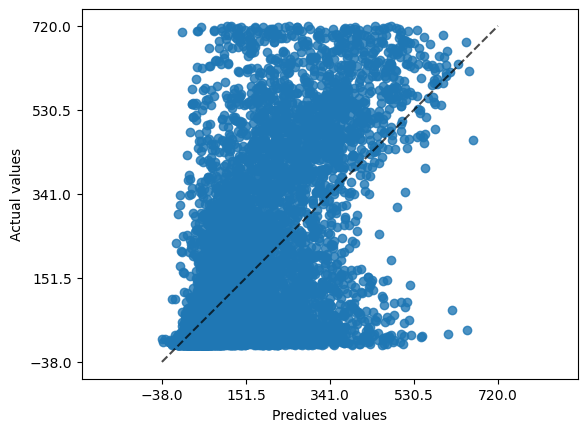

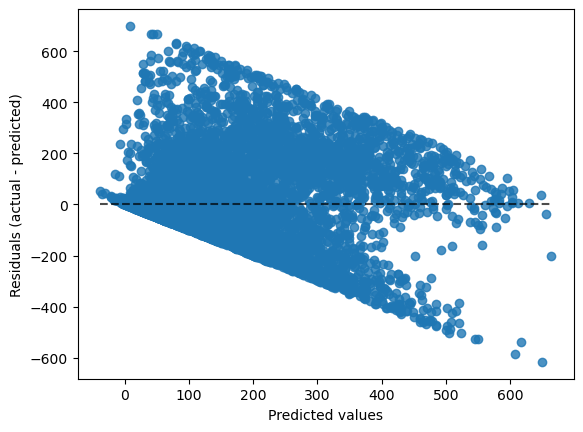

In [106]:
# present test_metrics for validation set
print("Mean Absolute Error:",mean_absolute_error(y_valid,y_predicted ), "minutes")
print("Root Mean Squared Error:",mean_squared_error(y_valid, y_predicted)**0.5,"minutes")
print("Coefficient of determination:",r2_score(y_valid, y_predicted)) 
print("Mean of idle time:", mean_12hours)
display = PredictionErrorDisplay.from_predictions(y_true=y_valid, y_pred=y_predicted, kind='actual_vs_predicted', subsample=10000)
display.plot()
plt.show()

The model has performed significantly better than linear regression with the coefficient of determination reaching 37.8%

### 3.2.2.1. - Resampling
We will resample the data to include less very short idle times.

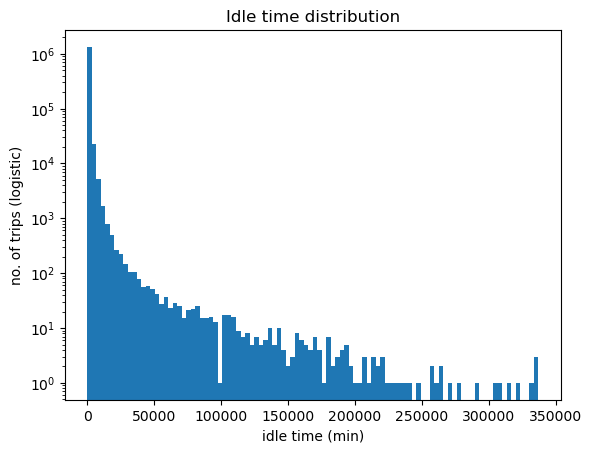

In [107]:
plt.hist(san_fran_df['idle_time'].dt.total_seconds()/60.0, bins=100, log=True)
plt.xlabel('idle time (min)')
plt.ylabel('no. of trips (logistic)')
plt.title('Idle time distribution')
plt.savefig('ilde_time_histogram.png', dpi=300)
plt.show()

In [108]:
reduced_san_fran_df_12hours.describe()

start_time      end_time  start_station_id  start_station_lat  start_station_lon  end_station_id  end_station_lat  end_station_lon       bike_id  trip_duration                  idle_time  end_temperature  end_cloud_cover  end_pressure  end_windspeed  end_precipitation  end_felt_temperature       Weekday    Is_Weekend  temperature_dif  temperature_dif_category    rain_start  station_distance   hour_of_day         month           day  end_station_central_station_dist  end_station_twitter_HQ_dist  end_station_ferry_building_dist          hour  distance_025  distance_central_station_025  distance_ferry_building_025  distance_twitter_025
count  1.068057e+06  1.068057e+06      1.068057e+06       1.068057e+06       1.068057e+06    1.068057e+06     1.068057e+06     1.068057e+06  1.068057e+06   1.068057e+06                    1068057     1.068057e+06     1.068057e+06  1.068057e+06   1.068057e+06       1.068057e+06          1.068057e+06  1.068057e+06  1.068057e+06     1.068057e+06              1.068057e+06  1.068057e+06      1.068057e+06  1.068057e+06  1.068057e+06  1.068057e+06                      1.068057e+06                 1.068057e+06                     1.068057e+06  1.068057e+06  1.068057e+06                  1.068057e+06                 1.068057e+06          1.068057e+06
mean   1.531997e+09  1.531998e+09      8.210779e+01       3.777806e+01      -1.224069e+02    7.774448e+01     3.777917e+01    -1.224053e+02  2.463843e+03   8.422491e+02  0 days 02:25:56.407571880     1.441966e+01     2.977608e+01  1.016165e+03   1.417604e+01       2.014939e-02          1.435000e+01  2.485334e+00  1.447207e-01    -6.380839e-02              2.961205e+00  1.392248e-03      1.660241e+00  1.295331e+01  7.083404e+00  1.572539e+01                      1.703601e+00                 1.865488e+00                     2.180292e+00  1.278067e+01  1.660301e+00                  1.700754e+00                 2.188193e+00          1.844265e+00
std    7.989102e+06  7.989080e+06      8.441997e+01       1.276771e-02       1.355084e-02    8.301211e+01     1.248000e-02     1.231283e-02  1.312986e+03   2.180435e+03  0 days 03:05:38.205627257     3.525595e+00     4.036394e+00  4.372923e+00   9.673859e+00       2.599982e-01          3.656625e+00  1.782188e+00  3.518192e-01     5.932869e-01              3.426939e-01  3.728687e-02      9.969261e-01  4.660114e+00  3.042039e+00  8.781514e+00                      9.464133e-01                 8.143264e-01                     1.422423e+00  4.645002e+00  9.975848e-01                  9.466136e-01                 1.414833e+00          8.151024e-01
min    1.514765e+09  1.514767e+09      3.000000e+00       3.772925e+01      -1.224737e+02    3.000000e+00     3.772925e+01    -1.224737e+02  1.700000e+01   6.100000e+01            0 days 00:00:03     2.000000e+00     9.000000e+00  9.969400e+02   0.000000e+00       0.000000e+00          1.000000e+00  0.000000e+00  0.000000e+00    -1.600000e+01              0.000000e+00  0.000000e+00      0.000000e+00  0.000000e+00  1.000000e+00  1.000000e+00                      2.261399e-02                 7.477126e-02                     0.000000e+00  0.000000e+00  0.000000e+00                  0.000000e+00                 0.000000e+00          0.000000e+00
25%    1.526229e+09  1.526230e+09      2.300000e+01       3.777041e+01      -1.224174e+02    2.100000e+01     3.777106e+01    -1.224130e+02  1.431000e+03   3.710000e+02            0 days 00:15:50     1.200000e+01     2.700000e+01  1.013190e+03   7.000000e+00       0.000000e+00          1.200000e+01  1.000000e+00  0.000000e+00     0.000000e+00              3.000000e+00  0.000000e+00      9.416109e-01  9.000000e+00  5.000000e+00  8.000000e+00                      1.000461e+00                 1.372319e+00                     9.792153e-01  9.000000e+00  1.000000e+00                  1.000000e+00                 1.000000e+00          1.250000e+00
50%    1.532417e+09  1.532418e+09      6.200000e+01       3.777664e+01      -1.224032e+02    5.800000e+01    

In [109]:
import pandas as pd
from sklearn.utils import resample

# Separate the majority and minority classes based on 'idletime'
majority_class = reduced_san_fran_df_12hours[reduced_san_fran_df_12hours['idle_time'].dt.total_seconds()/60.0 < 300.0]
minority_class = reduced_san_fran_df_12hours[reduced_san_fran_df_12hours['idle_time'].dt.total_seconds()/60.0 >= 300.0]

# Undersample the majority class to reduce the number of samples
undersampled_majority = resample(majority_class,
                                 replace=False,  # Set to False for undersampling
                                 n_samples=250000,  # Match the number of minority samples
                                 random_state=42)  # Set a random state for reproducibility

# Concatenate the undersampled majority class with the minority class
undersampled_data = pd.concat([undersampled_majority, minority_class])

# Shuffle the undersampled data
undersampled_data = undersampled_data.sample(frac=1, random_state=42)

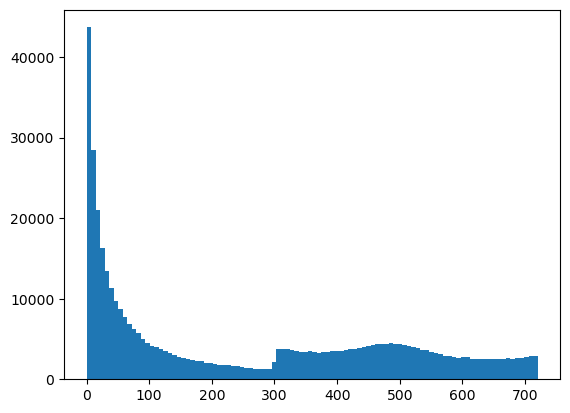

In [110]:
plt.hist(undersampled_data['idle_time'].dt.total_seconds()/60.0, bins=100)
plt.show()

In [111]:
undersampled_data

start_time      end_time  start_station_id  start_station_lat  start_station_lon  end_station_id  end_station_lat  end_station_lon  bike_id  trip_duration       idle_time  end_temperature  end_cloud_cover  end_pressure  end_windspeed  end_precipitation  end_felt_temperature  Weekday  Is_Weekend  temperature_dif  temperature_dif_category  rain_start  station_distance  hour_of_day  month  day  end_station_central_station_dist  end_station_twitter_HQ_dist  end_station_ferry_building_dist  hour  distance_025  distance_central_station_025  distance_ferry_building_025  distance_twitter_025
1101103  1.542542e+09  1.542542e+09               122          37.760299        -122.418892             123        37.760594      -122.414817     2729            183 0 days 09:57:14              7.0             20.0       1017.92            0.0                0.0                   7.0        6           1              0.0                         3           0          0.360555           11     11   18                          2.260933                     1.798773                         4.132937    11          0.25                          2.25                         4.25                  1.75
1314243  1.519036e+09  1.519036e+09                19          37.788975        -122.403452              13        37.794231      -122.402923     3154            217 0 days 05:07:02              7.0             33.0       1014.88           28.0                0.0                   2.0        0           0              0.0                         3           0          0.585235           10      2   19                          2.156667                     2.282385                         0.748125    10          0.50                          2.25                         0.75                  2.25
548439   1.539635e+09  1.539641e+09                78          37.773717        -122.411647              41        37.781270      -122.418740     1442           5278 0 days 10:24:08             26.0             34.0       1018.60            0.0                0.0                  25.0        0           0             -2.0                         2           0          1.045586           21     10   15                          2.013890                     0.538382                         2.573468    20          1.00                          2.00                         2.50                  0.50
1202784  1.531900e+09  1.531901e+09                10          37.795393        -122.404770              81        37.775880      -122.393170     2929           1050 0 days 00:39:16             13.0             33.0       1014.88           17.0                0.0                  13.0        2           0              0.0                         3           0          2.394742            8      7   18                          0.353762                     2.061998                         2.028650     7          2.50                          0.25                         2.00                  2.00
14392    1.543321e+09  1.543321e+09                26          37.787290        -122.394380              37        37.785000      -122.395936       50            104 0 days 05:06:18             11.0             29.0       1018.60            0.0                0.0                  11.0        1           0              0.0                         3           0          0.288784           12     11   27                          1.075981                     2.034235                         1.022033    12          0.25                          1.00                         1.00                  2.00
...               ...           ...               ...                ...                ...             ...              ...              ...      ...            ...             ...              ...              ...           ...            ...                ...                   ...      ...         ...              ...                       ...         ...               ...          ...    ...

In [112]:
X = undersampled_data.drop(columns=['idle_time'])

In [113]:
X.columns

Index(['start_time', 'end_time', 'start_station_id', 'start_station_lat', 'start_station_lon', 'end_station_id', 'end_station_lat', 'end_station_lon', 'bike_id', 'trip_duration', 'end_temperature', 'end_cloud_cover', 'end_pressure', 'end_windspeed', 'end_precipitation', 'end_felt_temperature', 'Weekday', 'Is_Weekend', 'temperature_dif', 'temperature_dif_category', 'rain_start', 'station_distance', 'hour_of_day', 'month', 'day', 'end_station_central_station_dist', 'end_station_twitter_HQ_dist', 'end_station_ferry_building_dist', 'hour', 'distance_025', 'distance_central_station_025', 'distance_ferry_building_025', 'distance_twitter_025'], dtype='object')

In [114]:
y = undersampled_data['idle_time'].dt.total_seconds()/60.0

In [115]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.4, random_state=8)

In [116]:
gradientboostingml = XGBRegressor()

In [117]:
gradientboostingml.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

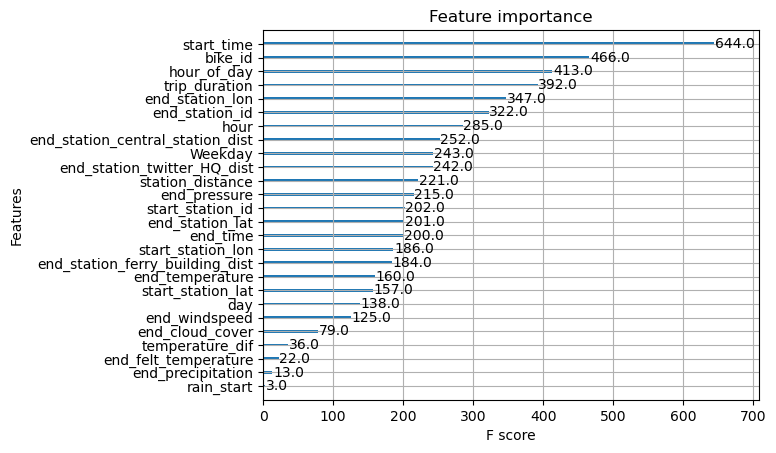

In [118]:
xgb.plot_importance(gradientboostingml, ax=plt.gca())
plt.show()

In [119]:
y_predicted = gradientboostingml.predict(X_valid)

Mean Absolute Error: 128.54808892717747 minutes
Root Mean Squared Error: 169.5082596905978 minutes
Coefficient of determination: 0.4698752899253439
Mean of idle time: 145.94012618333332


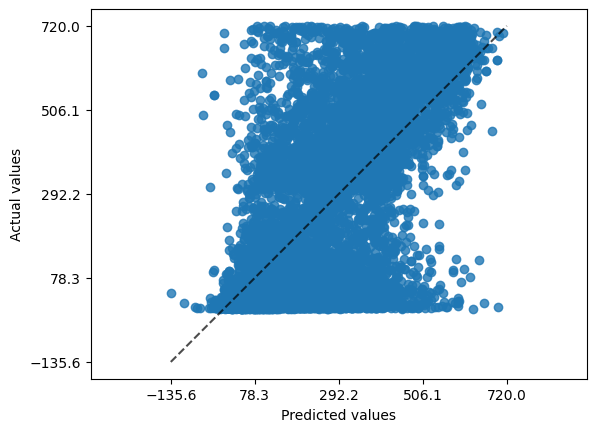

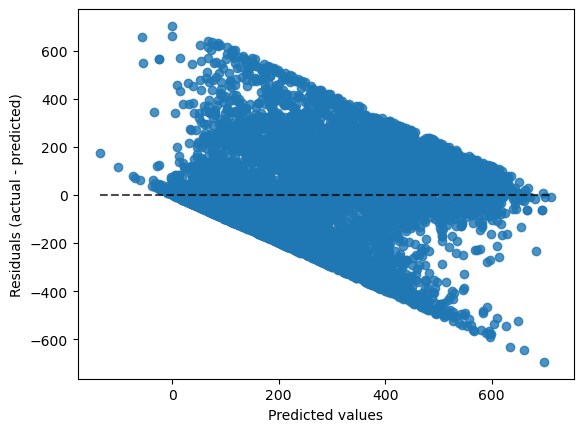

In [120]:
# present test_metrics for validation set
print("Mean Absolute Error:",mean_absolute_error(y_valid,y_predicted ), "minutes")
print("Root Mean Squared Error:",mean_squared_error(y_valid, y_predicted)**0.5,"minutes")
print("Coefficient of determination:",r2_score(y_valid, y_predicted)) 
print("Mean of idle time:", mean_12hours)
display = PredictionErrorDisplay.from_predictions(y_true=y_valid, y_pred=y_predicted, kind='actual_vs_predicted', subsample=10000)
display.plot()
plt.show()

The model has performed with an R^2 score of 47%, making it the best model yet. It can predict the whole spectrum of idle times which makes it a good model for our use case as it is not closely biased to short values of idle time.

### 3.2.2.2 - Performing cross validation using Recursive feature elimination with cross-validation
We want to try to eliminate the features that are of small significance for our XGBoost model using the RFECV feature selection class.

In [121]:
from sklearn.feature_selection import RFECV
X = undersampled_data.drop(columns=['idle_time'])
y = undersampled_data['idle_time'].dt.total_seconds()/60.0
model = XGBRegressor()
"""
The following cross validation takes very long time to run

selector= RFECV( model, step=1, min_features_to_select=3, cv=4 ,  verbose=0) 
"""
#selector.fit(X,y)
print(X.columns)

Index(['start_time', 'end_time', 'start_station_id', 'start_station_lat', 'start_station_lon', 'end_station_id', 'end_station_lat', 'end_station_lon', 'bike_id', 'trip_duration', 'end_temperature', 'end_cloud_cover', 'end_pressure', 'end_windspeed', 'end_precipitation', 'end_felt_temperature', 'Weekday', 'Is_Weekend', 'temperature_dif', 'temperature_dif_category', 'rain_start', 'station_distance', 'hour_of_day', 'month', 'day', 'end_station_central_station_dist', 'end_station_twitter_HQ_dist', 'end_station_ferry_building_dist', 'hour', 'distance_025', 'distance_central_station_025', 'distance_ferry_building_025', 'distance_twitter_025'], dtype='object')


print( selector.ranking_)

[14 12  9  1  1  1  1  2  3  4  6  7 11  8  1 15 13 16 10  5  1  1  1  1
  1  1]
  
Lower ranks indicate higher importance.

ranking_scores = dict(zip(X.columns, selector.ranking_))
print(ranking_scores)

print( selector.cv_results_['mean_test_score'].mean())
print(selector.cv)

The output of cross validation:

{'start_station_id': 14, 'start_station_lat': 12, 'start_station_lon': 9, 'end_station_id': 1, 'end_station_lat': 1, 'end_station_lon': 1, 'bike_id': 1, 'trip_duration': 2, 'end_temperature': 3, 'end_cloud_cover': 4, 'end_pressure': 6, 'end_windspeed': 7, 'end_precipitation': 11, 'end_felt_temperature': 8, 'Weekday': 1, 'Is_Weekend': 15, 'temperature_dif': 13, 'temperature_dif_category': 16, 'rain_start': 10, 'station_distance': 5, 'end_station_central_station_dist': 1, 'end_station_twitter_HQ_dist': 1, 'end_station_ferry_building_dist': 1, 'hour_of_day': 1, 'month': 1, 'day': 1}


We now drop those features that have low scores.

In [122]:
X = X.drop(['start_station_id','start_station_lat','start_station_lon','trip_duration', 'end_temperature',
                'end_cloud_cover', 'end_pressure', 'end_windspeed', 'end_precipitation', 'end_felt_temperature',
                'Is_Weekend','temperature_dif', 'temperature_dif_category', 'rain_start', 'station_distance'], axis=1)

In [123]:
y = y

In [124]:
X_train,X_test, y_train, y_test = train_test_split(X,y,random_state =8)

In [125]:
from xgboost import XGBRegressor

model = XGBRegressor() 

model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [126]:
pred_test = model.predict(X_test)

Mean Absolute Error: 127.62676952015426 minutes
Root Mean Squared Error: 168.42089826207877 minutes
Coefficient of determination: 0.47683764043963006
Mean of idle time: 145.94012618333332


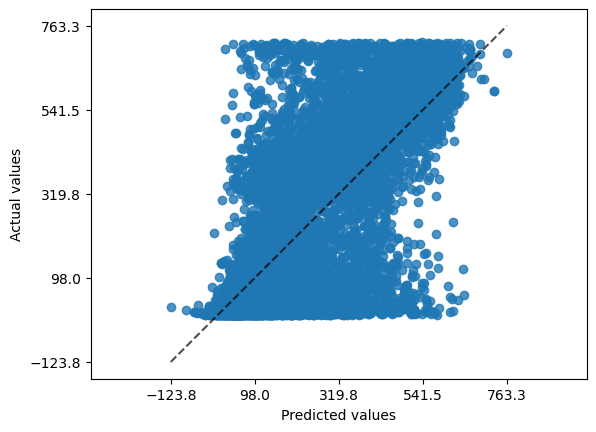

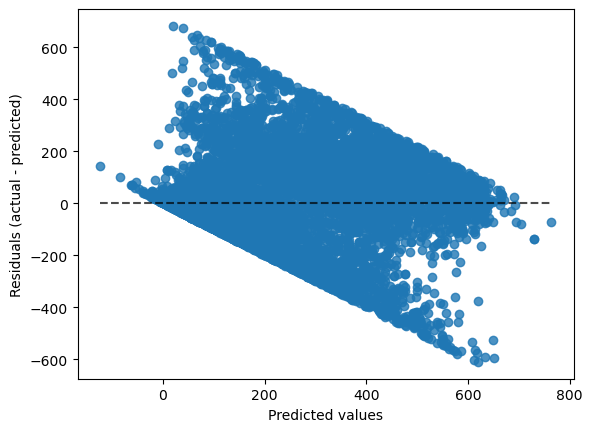

In [127]:
# present test_metrics for validation set
print("Mean Absolute Error:",mean_absolute_error(y_test,pred_test ), "minutes")
print("Root Mean Squared Error:",mean_squared_error(y_test, pred_test)**0.5,"minutes")
print("Coefficient of determination:",r2_score(y_test, pred_test)) 
print("Mean of idle time:", mean_12hours)

display = PredictionErrorDisplay.from_predictions(y_true=y_test, y_pred=pred_test, kind='actual_vs_predicted', subsample=10000)
display.plot()

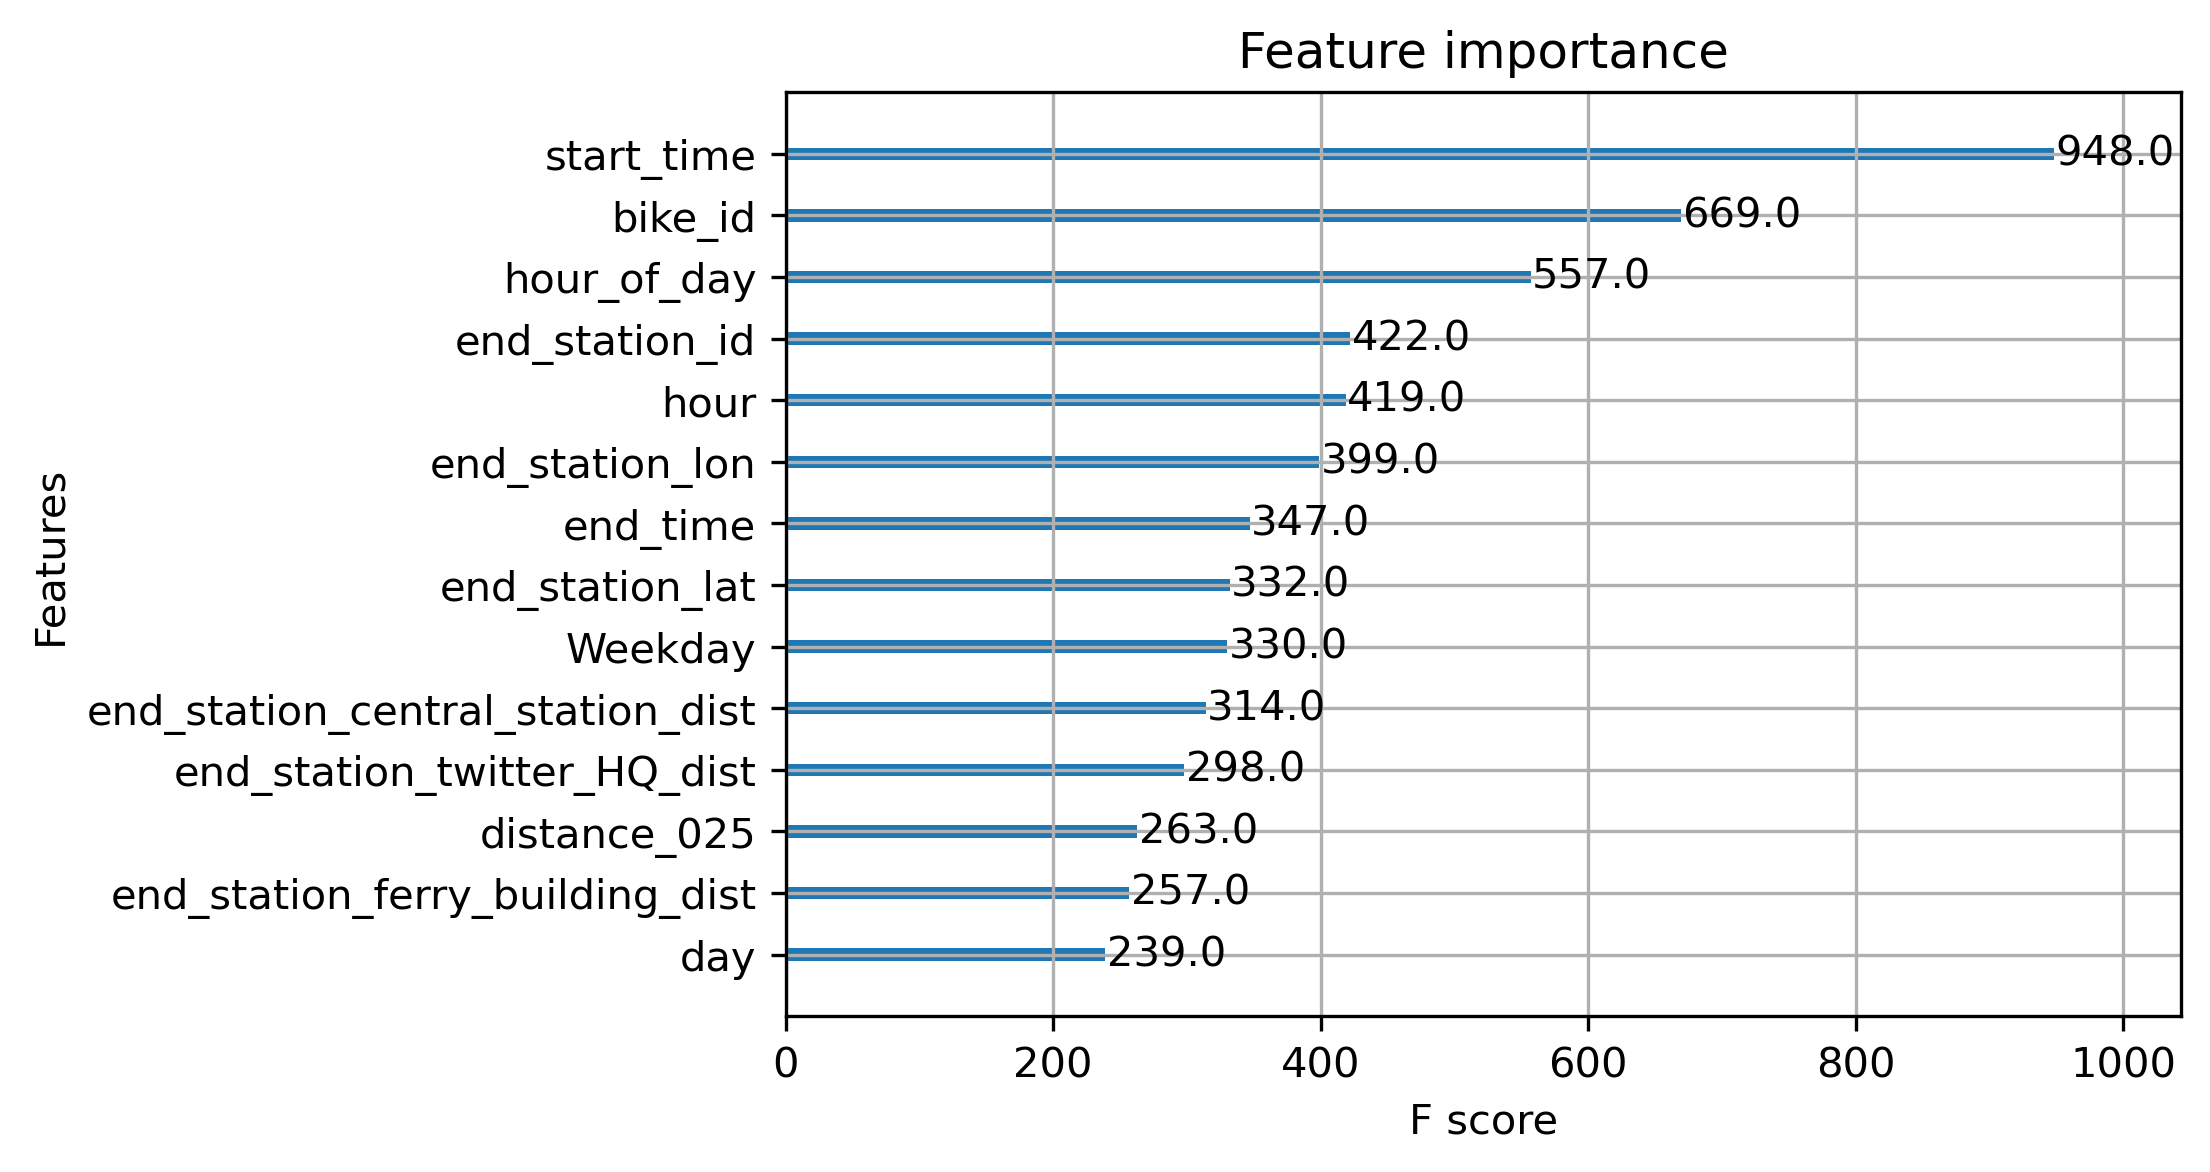

In [128]:
plt.figure(figsize=(6,4), dpi=300)
xgb.plot_importance(model, ax=plt.gca())
plt.savefig('Feature importance XGBoost RFECV', dpi=300)
plt.show()

We have reached a slightly better R^2 score with RFECV of 47.7%

### 3.2.2.3. -  Hyperparameter tuning
XGBoost regressor prediction model uses a large number of hyperparameters, these can be fine tuned to achieve better predictive power of the model.

Downside of this approach are the computational power requirements by using brute force to find the best combination of hyperparameters. 

In [129]:
model = XGBRegressor()
model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [130]:
"""
from sklearn.model_selection import GridSearchCV
xgbr = XGBRegressor(learning_rate=0.3, max_depth=6, n_estimators=100,subsample=0.8)
tuned_parameters = {
   'max_depth':[3,4,5,6],
   'min_child_weight':[1,2,3,4,5,6],
   'gamma':[i/10.0 for i in range(0,5)], 
   'learning_rate':[0.01,0.05,0.1,0.2]  #, 'n_estimators':[100, 500,1000]
}

clf = GridSearchCV(xgbr, param_grid = tuned_parameters,cv=5)
clf.fit(X_train, y_train)

print("Best parameters set found on development set:")
print( clf.best_params_)
print("Best score found on development set:")
print( clf.best_score_)
"""
print()

Output of Hyperparameter search: 

Best parameters set found on development set:
{'gamma': 0.0, 'learning_rate': 0.2, 'max_depth': 6, 'min_child_weight': 6}

Best score found on development set:
0.46265812828157565

xgbr.objective

'reg:squarederror'

In [131]:
#X_train,X_test, y_train, y_test = train_test_split(X,y,random_state =8)
model_hyper = XGBRegressor(gamma=0.0, learning_rate=0.2, max_depth=6, min_child_weight=6)


In [132]:
model_hyper.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.0, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=6, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [133]:
y_predicted = model_hyper.predict(X_test)

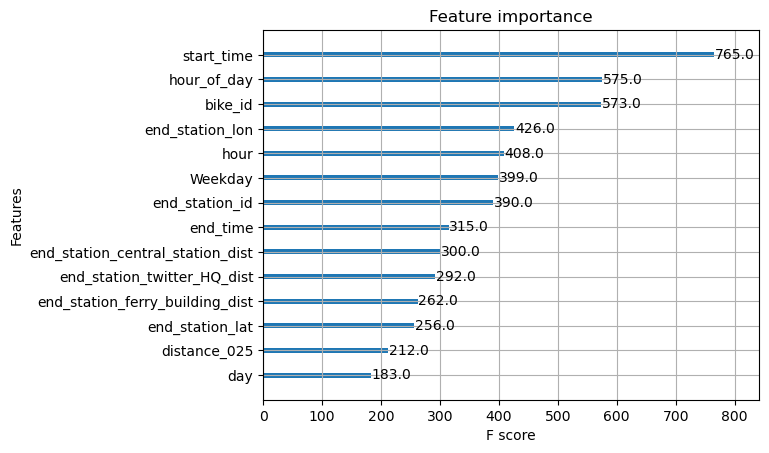

In [134]:
xgb.plot_importance(model_hyper, ax=plt.gca())
plt.show()

Mean Absolute Error: 128.4710670321603 minutes
Root Mean Squared Error: 168.9378444377254 minutes
Coefficient of determination: 0.4736211532396565
Mean of idle time: 145.94012618333332


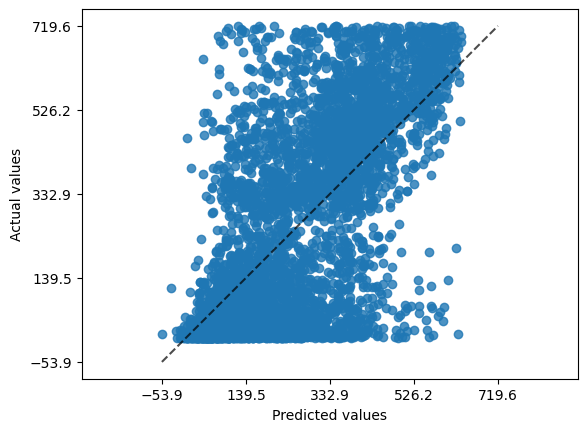

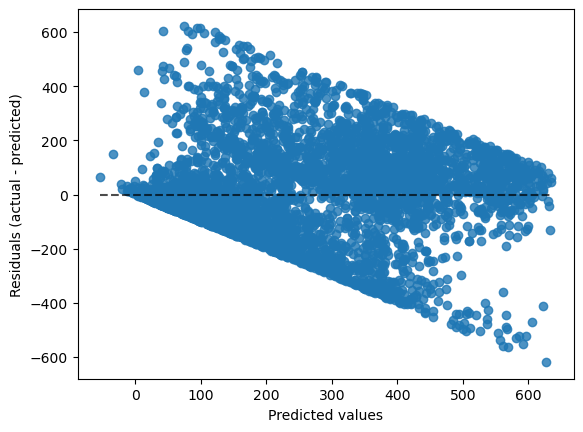

In [135]:
# present test_metrics for validation set
print("Mean Absolute Error:",mean_absolute_error(y_test,y_predicted ), "minutes")
print("Root Mean Squared Error:",mean_squared_error(y_test, y_predicted)**0.5,"minutes")
print("Coefficient of determination:",r2_score(y_test, y_predicted)) 
print("Mean of idle time:", mean_12hours)

display = PredictionErrorDisplay.from_predictions(y_true=y_test, y_pred=y_predicted, kind='actual_vs_predicted', subsample=5000)
display.plot()

Hyperparameter tuning proved to be of unsignificant importance for us, we have reached a lower R^2 score than the Recursive feature elimination with cross-validation with 47.36%.  

### 3.2.3. - KNN regressor

**KNN regressor** predicts the numeric value of a new data point by averaging the target values of its "K" closest neighbors in the training set

In [136]:
undersampled_data.head()

start_time      end_time  start_station_id  start_station_lat  start_station_lon  end_station_id  end_station_lat  end_station_lon  bike_id  trip_duration       idle_time  end_temperature  end_cloud_cover  end_pressure  end_windspeed  end_precipitation  end_felt_temperature  Weekday  Is_Weekend  temperature_dif  temperature_dif_category  rain_start  station_distance  hour_of_day  month  day  end_station_central_station_dist  end_station_twitter_HQ_dist  end_station_ferry_building_dist  hour  distance_025  distance_central_station_025  distance_ferry_building_025  distance_twitter_025
1101103  1.542542e+09  1.542542e+09               122          37.760299        -122.418892             123        37.760594      -122.414817     2729            183 0 days 09:57:14              7.0             20.0       1017.92            0.0                0.0                   7.0        6           1              0.0                         3           0          0.360555           11     11   18                          2.260933                     1.798773                         4.132937    11          0.25                          2.25                         4.25                  1.75
1314243  1.519036e+09  1.519036e+09                19          37.788975        -122.403452              13        37.794231      -122.402923     3154            217 0 days 05:07:02              7.0             33.0       1014.88           28.0                0.0                   2.0        0           0              0.0                         3           0          0.585235           10      2   19                          2.156667                     2.282385                         0.748125    10          0.50                          2.25                         0.75                  2.25
548439   1.539635e+09  1.539641e+09                78          37.773717        -122.411647              41        37.781270      -122.418740     1442           5278 0 days 10:24:08             26.0             34.0       1018.60            0.0                0.0                  25.0        0           0             -2.0                         2           0          1.045586           21     10   15                          2.013890                     0.538382                         2.573468    20          1.00                          2.00                         2.50                  0.50
1202784  1.531900e+09  1.531901e+09                10          37.795393        -122.404770              81        37.775880      -122.393170     2929           1050 0 days 00:39:16             13.0             33.0       1014.88           17.0                0.0                  13.0        2           0              0.0                         3           0          2.394742            8      7   18                          0.353762                     2.061998                         2.028650     7          2.50                          0.25                         2.00                  2.00
14392    1.543321e+09  1.543321e+09                26          37.787290        -122.394380              37        37.785000      -122.395936       50            104 0 days 05:06:18             11.0             29.0       1018.60            0.0                0.0                  11.0        1           0              0.0                         3           0          0.288784           12     11   27                          1.075981                     2.034235                         1.022033    12          0.25                          1.00                         1.00                  2.00

In [137]:
undersampled_data.columns

Index(['start_time', 'end_time', 'start_station_id', 'start_station_lat', 'start_station_lon', 'end_station_id', 'end_station_lat', 'end_station_lon', 'bike_id', 'trip_duration', 'idle_time', 'end_temperature', 'end_cloud_cover', 'end_pressure', 'end_windspeed', 'end_precipitation', 'end_felt_temperature', 'Weekday', 'Is_Weekend', 'temperature_dif', 'temperature_dif_category', 'rain_start', 'station_distance', 'hour_of_day', 'month', 'day', 'end_station_central_station_dist', 'end_station_twitter_HQ_dist', 'end_station_ferry_building_dist', 'hour', 'distance_025', 'distance_central_station_025', 'distance_ferry_building_025', 'distance_twitter_025'], dtype='object')

**Rescaling our data**

The algorithm requires scaling of features since it relies on distance calculations, and features with larger scales can dominate the distance metric otherwise.

In [138]:
undersampled_dataKNN = undersampled_data.copy()
scaler = StandardScaler()
features = [['start_time','end_time', 'start_station_id','start_station_lat', 'start_station_lon',
             'end_station_id', 'end_station_lat', 'end_station_lon', 'bike_id', 'trip_duration', 
             'end_temperature', 'end_cloud_cover', 'end_pressure', 'end_windspeed', 
             'end_precipitation', 'end_felt_temperature', 'station_distance', 'end_station_central_station_dist',
             'end_station_twitter_HQ_dist', 'end_station_ferry_building_dist']]
for feature in features:
    undersampled_dataKNN[feature] = scaler.fit_transform(undersampled_dataKNN[feature])

In [139]:
undersampled_dataKNN.head()

start_time  end_time  start_station_id  start_station_lat  start_station_lon  end_station_id  end_station_lat  end_station_lon   bike_id  trip_duration       idle_time  end_temperature  end_cloud_cover  end_pressure  end_windspeed  end_precipitation  end_felt_temperature  Weekday  Is_Weekend  temperature_dif  temperature_dif_category  rain_start  station_distance  hour_of_day  month  day  end_station_central_station_dist  end_station_twitter_HQ_dist  end_station_ferry_building_dist  hour  distance_025  distance_central_station_025  distance_ferry_building_025  distance_twitter_025
1101103    1.331346  1.331266          0.474816          -1.367717          -0.863668        0.508920        -1.461552        -0.774077  0.268456      -0.298167 0 days 09:57:14        -2.047603        -2.416030      0.408181      -1.459002          -0.079674             -1.954155        6           1              0.0                         3           0         -1.307200           11     11   18                          0.592965                    -0.089832                         1.355141    11          0.25                          2.25                         4.25                  1.75
1314243   -1.563007 -1.563087         -0.758003           0.880983           0.268374       -0.791196         1.219634         0.195800  0.598724      -0.282870 0 days 05:07:02        -2.047603         0.794820     -0.284727       1.312643          -0.079674             -3.282815        0           0              0.0                         3           0         -1.084453           10      2   19                          0.482406                     0.513147                        -1.017258    10          0.50                          2.25                         0.75                  2.25
548439     0.973445  0.973992         -0.051825          -0.315495          -0.332452       -0.460258         0.186532        -1.093961 -0.731673       1.994123 0 days 10:24:08         3.189456         1.041808      0.563173      -1.459002          -0.079674              2.829024        0           0             -2.0                         2           0         -0.628060           21     10   15                          0.331012                    -1.661314                         0.262116    20          1.00                          2.00                         2.50                  0.50
1202784    0.020961  0.020986         -0.865725           1.384262           0.171721        0.012512        -0.243096         0.991085  0.423876       0.091905 0 days 00:39:16        -0.393795         0.794820     -0.284727       0.223782          -0.079674             -0.359762        2           0              0.0                         3           0          0.709494            8      7   18                         -1.429308                     0.238363                        -0.119744     7          2.50                          0.25                         2.00                  2.00
14392      1.427290  1.427201         -0.674219           0.748850           0.933522       -0.507534         0.483823         0.765569 -1.813398      -0.333710 0 days 05:06:18        -0.945064        -0.193134      0.563173      -1.459002          -0.079674             -0.891226        1           0              0.0                         3           0         -1.378354           12     11   27                         -0.663502                     0.203747                        -0.825278    12          0.25                          1.00                         1.00                  2.00

In [140]:
X_KNN = undersampled_dataKNN.drop(columns=['idle_time'])
y_KNN = undersampled_dataKNN['idle_time'].dt.total_seconds()/60.0

In [141]:
X_train,X_test, y_train, y_test = train_test_split(X_KNN,y_KNN,random_state =8)
# initialize
KNN_reg = KNeighborsRegressor(n_neighbors=40) 

# train
KNN_model = KNN_reg.fit(X_train, y_train) 

# predict
y_predicted = KNN_model.predict(X_test)

Mean Absolute Error: 154.81612450630323 minutes
Root Mean Squared Error: 190.7444486779278 minutes
Coefficient of determination: 0.3289600971186569
Mean of idle time: 145.94012618333332


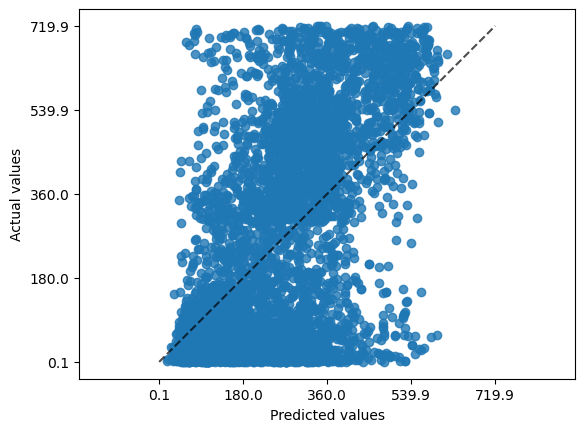

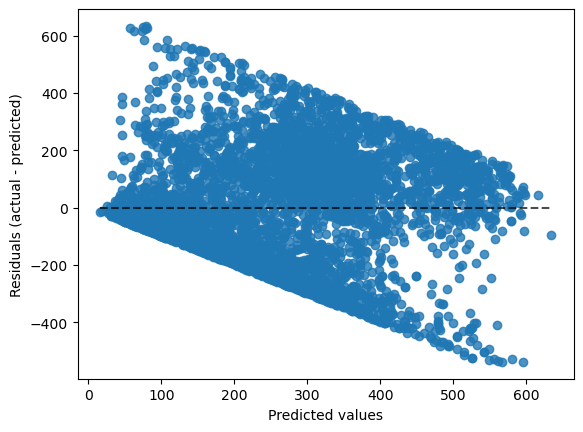

In [142]:
# present test_metrics for validation set
print("Mean Absolute Error:",mean_absolute_error(y_test,y_predicted ), "minutes")
print("Root Mean Squared Error:",mean_squared_error(y_test, y_predicted)**0.5,"minutes")
print("Coefficient of determination:",r2_score(y_test, y_predicted)) 
print("Mean of idle time:", mean_12hours)

display = PredictionErrorDisplay.from_predictions(y_true=y_test, y_pred=y_predicted, kind='actual_vs_predicted', subsample=5000)
display.plot()

The **KNN regressor** has performed significantly better than linear regression with 32.9% R^2 score.

### 3.2.4. - Random forest regressor

**Random forest regressor** builds an ensemble of decision trees by creating random subsets of the data and then aggregates their predictions to make the final prediction, resulting in a robust and accurate regression model. This algorithm is particularly effective in handling complex datasets and is less prone to overfitting compared to individual decision trees, which is exactly our case.

In [143]:
x=reduced_san_fran_df_12hours.drop(columns=['idle_time'])
y=reduced_san_fran_df_12hours['idle_time'].dt.total_seconds()/60.0

In [144]:
X_train,X_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=8)
ml_forest = RandomForestRegressor(n_estimators=120, random_state=1)


In [145]:
ml_forest.fit(X_train, y_train)

RandomForestRegressor(n_estimators=120, random_state=1)

In [146]:
y_predicted_forest = ml_forest.predict(X_test)

Mean Absolute Error: 100.28699875457822 minutes
Root Mean Squared Error: 144.45980827020065 minutes
Coefficient of determination: 0.39419673747447626
Mean of idle time: 145.94012618333332


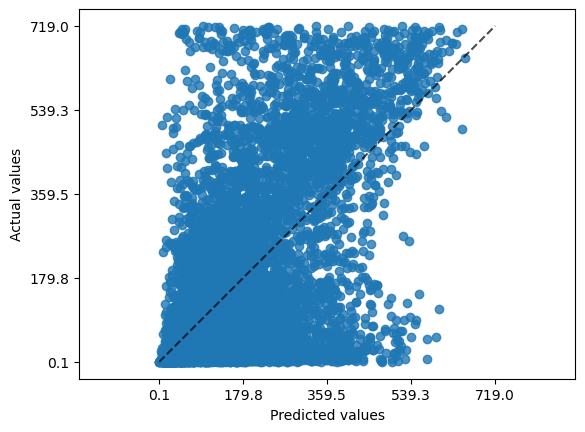

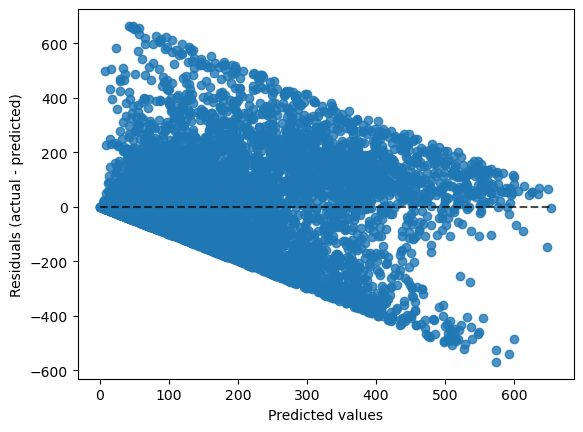

In [147]:
display = PredictionErrorDisplay.from_predictions(y_true=y_test, y_pred=y_predicted_forest,kind='actual_vs_predicted', subsample=10000)
display.plot()
# present test_metrics
print("Mean Absolute Error:",mean_absolute_error(y_test,y_predicted_forest ), "minutes")
print("Root Mean Squared Error:",mean_squared_error(y_test, y_predicted_forest)**0.5,"minutes")
print("Coefficient of determination:",r2_score(y_test, y_predicted_forest)) 
print("Mean of idle time:", mean_12hours)

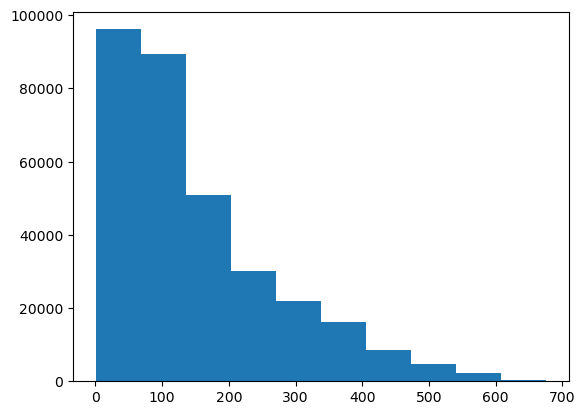

In [148]:
plt.hist(y_predicted_forest)
plt.show()

With the usage of a data set with values of idle time less than 12 hours the model has achieved significantly better values of the error performance metrics than the XGBoost model meaning it provides better accuracy, but as we can also see the coefficient of determination R^2 is lower with 39.4%.

Also important to note is that the predicted values closely follow the overall trend of the idle time distributions, with large short values and steadily declining for longer. What can also be observed is that the model ignores the actual long idle_times and predicts them as significantly shorter, in some case by more than 50% or in extreme even by predicting the values as 1/10 of the actual value. 

### 3.2.4.1. Resampled data set

In [149]:
undersampled_dataForest = undersampled_data.copy()

In [150]:
X_Forest = undersampled_dataForest.drop(columns=['idle_time'])
y_Forest = undersampled_dataForest['idle_time'].dt.total_seconds()/60.0

In [151]:
X_train,X_test, y_train, y_test = train_test_split(X_Forest, y_Forest, test_size=0.3, random_state=8)
ml_forest = RandomForestRegressor(n_estimators=120, random_state=1)


In [152]:
ml_forest.fit(X_train, y_train)

RandomForestRegressor(n_estimators=120, random_state=1)

In [153]:
y_predicted_forest = ml_forest.predict(X_test)

Mean Absolute Error: 126.05193174567664 minutes
Root Mean Squared Error: 169.02254089434172 minutes
Coefficient of determination: 0.47305254982101763
Mean of idle time: 145.94012618333332


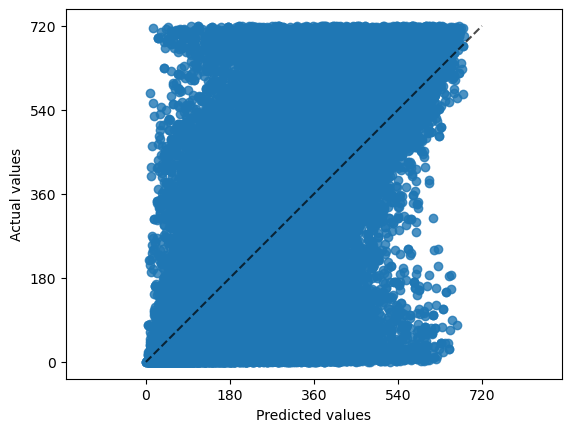

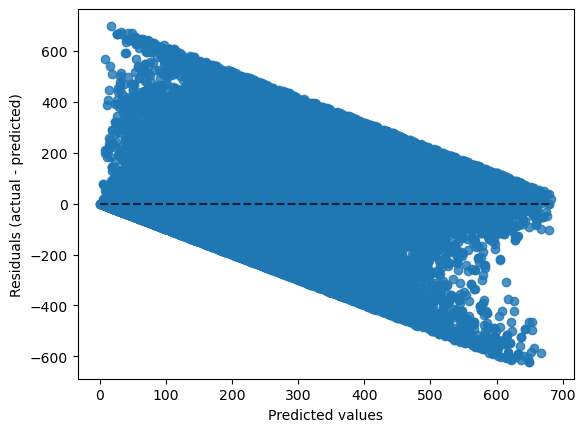

In [154]:
display = PredictionErrorDisplay.from_predictions(y_true=y_test, y_pred=y_predicted_forest,kind='actual_vs_predicted', subsample=50000)
display.plot()
# present test_metrics
print("Mean Absolute Error:",mean_absolute_error(y_test,y_predicted_forest ), "minutes")
print("Root Mean Squared Error:",mean_squared_error(y_test, y_predicted_forest)**0.5,"minutes")
print("Coefficient of determination:",r2_score(y_test, y_predicted_forest)) 
print("Mean of idle time:", mean_12hours)

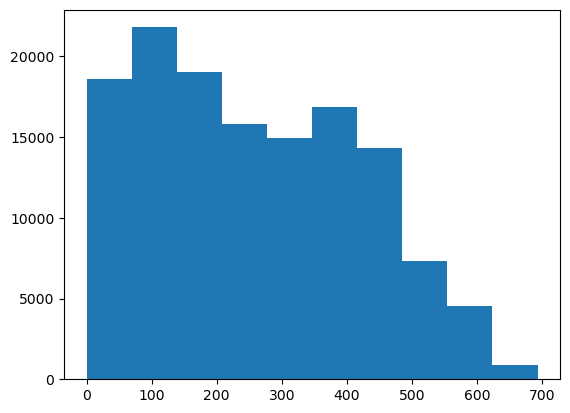

In [155]:
plt.hist(y_predicted_forest)
plt.show()

The Random forest regressor has proven effective and reached an R^2 score of 47%. 

The drawback of this model is the very long training time due to a large number of trees, making this model not suitable for real time predictions.

Benefits of this model is its ease of use, with only two hyperparameters: the number of features to be selected at each node and the number of trees. It has also been very effective right at first try with default hyperparameters.


### 3.2.5. - Gradient Boosting
Gradient Boosting regressor is also one of the suitable regression predicition algorithms for large datasets with many input features. It belongs together with XGBoost and Random forest to the ensemble learning algorithms, which combines the predictions of multiple weak learners (in this case, decision trees) to create a stronger and more accurate model.  

In [156]:
X_GBR = undersampled_data.drop(columns=['idle_time'])
y_GBR = undersampled_data['idle_time'].dt.total_seconds()/60.0

In [157]:
GBR = GradientBoostingRegressor()

In [158]:
# train test split
X_train,X_test, y_train, y_test = train_test_split(X_GBR,y_GBR,test_size=0.3, random_state=8)

In [159]:
# train
GBR.fit(X_train, y_train) 
# predict
y_predicted = GBR.predict(X_test)

Mean Absolute Error: 144.36169441682307 minutes
Root Mean Squared Error: 180.03777123912457 minutes
Coefficient of determination: 0.40213199717540193
Mean of idle time: 145.94012618333332


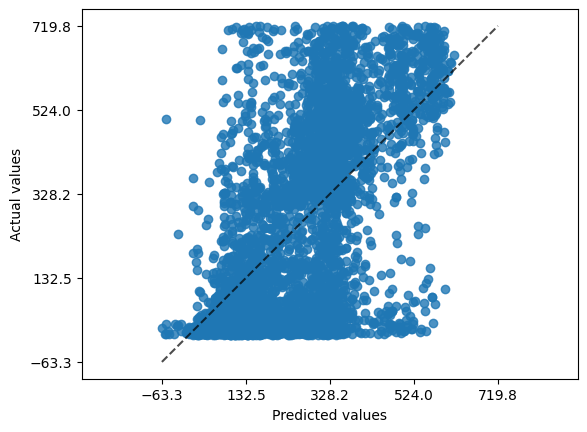

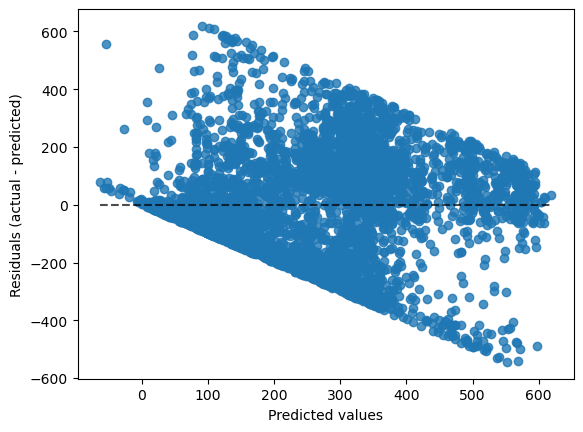

In [160]:
# present test_metrics for validation set
print("Mean Absolute Error:",mean_absolute_error(y_test,y_predicted ), "minutes")
print("Root Mean Squared Error:",mean_squared_error(y_test, y_predicted)**0.5,"minutes")
print("Coefficient of determination:",r2_score(y_test, y_predicted)) 
print("Mean of idle time:", mean_12hours)

display = PredictionErrorDisplay.from_predictions(y_true=y_test, y_pred=y_predicted, kind='actual_vs_predicted', subsample=5000)
display.plot()

With Gradient boosting regressor we have achieved an R^2 score of 40%, performing the poorest from the ensemle learning algorithms.

### 3.3. - Evaluation of the models

We want to compare all the models that we have created and choose the best ones.

For the performance evaluation of the models we have chosen the following performance metrics:
- **Mean Absolute Error**:\
MAE is a common metric used to measure the average magnitude of errors between predicted and actual values. It gives us a straightforward insight into how big the average absolute error is in the same units (minutes) as the target variable.
- **Root Mean Squared Error**:\
Also another common metric for evaluating regression models. RMSE penalizes large errors more than small errors due to the squaring operation. We have taken the square roots of the RMSE to also show the error in the same units (minutes).

There is no general rule for evaluating the two above perfromance metrics, as the error values are highly dependent on the values in the dataset. The lower the errors are the better.
- **Coefficient of Determination**:\
The R^2 measures the goodness of fit of the model, showing how well the model explains the variance in the target variable. It can take on values from 0 to 1 and is usually interpreted in percentage.

For the Coefficient of Determination the goal of a data scientist is to reach the highest score possible, with 1 being a perfect fit and 0 indicating that the model's predictions are no better than the mean of the target variable.



In [162]:
# we create a table with all created models for easy comparison
model_names = ['Linear regression', 'XGBoost', 'KNN', 'Random Forest', 'Gradient Boosting']
mean_absolute_errors = [141.8, 127.1, 156.5, 126.4, 144.9]
root_mean_squared_errors = [182.5, 168.0, 191.0, 169.6, 180.1]
coeff_of_determination = [0.036, 0.477, 0.329, 0.473, 0.400]
# create a dataframe to hold the data
data = {
    'Model': model_names,
    'Mean Absolute Error (min)': mean_absolute_errors,
    'Root Mean Squared Error (min)': root_mean_squared_errors,
    'Coefficient of Determination': coeff_of_determination}
df = pd.DataFrame(data)
# display the table using tabulate
table = tabulate(df, headers='keys', tablefmt='github', showindex=False)

print(table)

| Model             |   Mean Absolute Error (min) |   Root Mean Squared Error (min) |   Coefficient of Determination |
|-------------------|-----------------------------|---------------------------------|--------------------------------|
| Linear regression |                       141.8 |                           182.5 |                          0.036 |
| XGBoost           |                       127.1 |                           168   |                          0.477 |
| KNN               |                       156.5 |                           191   |                          0.329 |
| Random Forest     |                       126.4 |                           169.6 |                          0.473 |
| Gradient Boosting |                       144.9 |                           180.1 |                          0.4   |


**Selection of two best models**

We have decided to select the **Random Forest** model and the **XGBoost** model as they have the highest Coefficient of Determination and also achieve the lowest errors in MAE and RMSE. 